## PURPOSE
This notebook is used for preliminary/exploratory analysis of the data obtained from Unity - that being the "Hand data" that we have obtained for a few different experiments.

In [3]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import plotly.graph_objects as go

## Creating The Spectral Arc-Length Fourier Transform Smoothness (SALFTS) Measurement
Defining some terms:
- Fourier Transform, in this case is the fourier transform of the velocity. With us however, we will be doing the angular velocity, not the raw velocity
- Spectral Arc-Length, is just the length of the line itself.

If a movement is more bumpy - the velocity curve will have more deviations, and it will need to be expressed through a fourier transform with a broader range of frequencies. When plotted out, over a set distance, this line will be longer. This combination of the two ideas gets us the Spectral Arc-Length.

The analysis should be done as follows:
1. I'll need to have code that converts angles to angular velocities. This will be easy considering I already have the angles, and their corresponding time steps.
2. Perform a Fourier Transform on my data (they say the fourier magnitude spectrum, which means the actual magnitude of it rather than just the complex number we get)
3. Apply the equations to get the spectral arc length (they provide an algorithm in their Appendix B)

In [4]:
# Convert angles to angular velocities
def calculate_angular_velocities(angles: np.ndarray, timestamps: np.ndarray) -> np.ndarray:
    """
    Calculates the angular velocities based on the given angles and timestamps.

    Args:
    angles (np.ndarray): An array of angles in radians.
    timestamps (np.ndarray): An array of timestamps in seconds.

    Returns:
    np.ndarray: An array of angular velocities in radians per second.
    """
    time_diff = np.diff(timestamps)
    angle_diff = np.diff(angles)
    angular_velocities = angle_diff / time_diff
    return angular_velocities

In [5]:
def moving_average_angles(angles: np.ndarray, moving_average_window: int) -> np.ndarray:
    """
    Calculates the moving average of the given array of angles.

    Args:
    angles (np.ndarray): An array of angles in radians.
    moving_average_window (int): The size of the moving average window.

    Returns:
    np.ndarray: An array of the moving average of the input angles.
    """
    return np.convolve(angles, np.ones(moving_average_window) / moving_average_window, mode='valid')

In [6]:
# Load in my angles
test1Angles = np.array([1.079378, 1.078108, 0.7845948, 0.7543329, 0.7396637, 0.7255072, 0.7184606, 0.7113441, 0.7074825, 0.7074825, 0.6996954, 0.675796, 0.6258884, 0.5740312, 0.5489398, 0.5109072, 0.4849715, 0.456712, 0.429328, 0.4256662, 0.3876539, 0.3631561, 0.3566318, 0.343781, 0.364769, 0.3679734, 0.3695653, 0.3631561, 0.3743001, 0.3830841, 0.3876539, 0.3995845, 0.3995845, 0.3981127, 0.3981127, 0.3901695, 0.3841043, 0.364769, 0.3477423, 0.3368816, 0.3127867, 0.3071049, 0.2853053, 0.2690692, 0.2586879, 0.25101, 0.25101, 0.249446, 0.2462884, 0.2422834, 0.2454926, 0.25101, 0.2533378, 0.2564087, 0.2571706, 0.2564087, 0.2571706, 0.249446, 0.2571706, 0.2398483, 0.1988102, 0.14537, 0.09065409, 0.05934703, 0.03426402, -0.03426402, -0.06255726, -0.1046783, -0.1356209, -0.165511, -0.1988102, -0.2185032, -0.2349025, -0.2462884, -0.2478722, -0.2478722, -0.2264194, -0.23239, -0.2281412, -0.2220564, -0.2158, -0.2093567, -0.2055842, -0.2055842, -0.2036718, -0.2036718, -0.2007689, -0.2074791, -0.2121421, 0.2139789, 0.2158, 0.2167048, 0.2167048, 0.2158, 0.1968319, 0.1866263, 0.1690205, 0.1545051, 0.1426525, -0.1136409, -0.1083524, -0.09691329, -0.09691329, -0.1008706, -0.1136409, -0.1170339, -0.1251145, -0.1170339, -0.1136409, -0.1008706, -0.09691329, -0.09691329, -0.08622923, -0.08156469, -0.08156469, -0.08156469, -0.08622923, -0.08622923, -0.08156469, -0.09065409, -0.09691329, -0.1046783, -0.1083524, -0.1101434, -0.1136409, -0.1136409, -0.1203313, -0.1170339, -0.1083524, -0.1008706, -0.1170339, -0.1251145, -0.1570175, -0.165511, -0.1887116, -0.1988102, -0.2036718, -0.2074791, -0.2220564, -0.2246844, -0.2332305, -0.2478722, -0.2571706, -0.2676108, -0.272681, -0.2846186, -0.2934199, -0.3102743, -0.3363003, -0.3494264, -0.354982, -0.373777, -0.3971285, -0.416371, -0.4370072, -0.4545648, -0.4731261, -0.4961402, -0.5078341, -0.5124369, -0.5263757, -0.5363187, -0.5630175, -0.575053, -0.5944612, -0.6058724, -0.6145305, -0.6218109, -0.6311808, -0.6486109, -0.6673463, -0.7060983, -0.7260464, -0.7409853, -0.7380747, -0.7535542, -0.758472, -0.7566639, -0.7669383, -0.770502, -0.7697397, -0.7666831, -0.7682129, -0.7758168, -0.7805943, -0.7853427, -0.7845948, -0.7748073, -0.7646385, -0.7470343, -0.7338206, -0.7276617, -0.7327532, -0.7470343, -0.7576976, -0.7679582, -0.7748073, -0.7770769, -0.7818466, -0.7843454, -0.7818466, -0.7853427, -0.7788376, -0.7755645, -0.776825, -0.7808449, -0.7950006, -0.7878303, -0.7932757, -0.7915472, -0.7908052, -0.814213, -0.8322775, -0.8717791, -0.8980926, -0.9119305, -0.9198356, -0.9153573, -0.9571576, -0.9922896, -1.001124, -1.009688, -1.004247, -1.000929, -0.98238, -0.9853634, -0.9839723, -0.9956363, -1.004636, -1.018948, -1.013943, -0.9899204, -0.9591998, -0.922597, -0.8838168, -0.8397673, -0.8249568, -0.8182884, -0.8303944, -0.8353283, -0.8225815, -0.8146936, -0.7878303, -0.7579558, -0.7488656, -0.7370135, -0.729005, -0.7200928, -0.7157319, -0.7066523, -0.7066523, -0.6932335, -0.6812752, -0.6664661, -0.6495153, -0.6388841, -0.6425489, -0.6419396, -0.6474031, -0.6495153, -0.6731851, -0.6926687, -0.721179, -0.7409853, -0.7512136, -0.760533, -0.7773286, -0.804056, -0.8091505, -0.81781, -0.8289794, -0.8329825, -0.8343908, -0.8346253, -0.8444148, -0.8492672, -0.857978, -0.8591176, -0.8506485, -0.8287433, -0.8268523, -0.8173313, -0.8003972, -0.7950006, -0.7810954, -0.7758168, -0.7780834, -0.7825971, -0.7942618, -0.8076981, -0.8166127, -0.8313365, -0.8423266, -0.8654715, -0.8930672, -0.917919, -0.9505931, -0.9875455, -0.9954398, -0.9972074, -0.9813836, -0.9735762, -0.9655032, -0.9419076, -0.9306217, -0.9200482, -0.9104272, -0.9089215, -0.9059024, -0.9059024, -0.9074132, -0.9189842, -0.9299906, -0.9373261, -0.9466738, -0.9470872, -0.9433607, -0.949151, -0.9489449, -0.96773, -0.9831765, -0.9952432, -1.011817, -1.0201, -1.024884, -1.029456, -1.032682, -1.035143, -1.028505, -1.022207, -1.020483, -1.019332, -1.037032, -1.03722, -1.040611, -1.04324, -1.03722, -1.045863, -1.057769, -1.070823, -1.073379, -1.088225, -1.09593, -1.100029, -1.091636, -1.090739, -1.087865, -1.08372, -1.080827, -1.03854, -0.9859589, -0.949151, -0.9394114, -0.9000514, -0.8693066, -0.8462666, -0.8369665, -0.8329825, -0.8197219, -0.8030819, -0.7793398, -0.7407211, -0.6763749, -0.6661724, -0.6449805, -0.635814, -0.6376578, -0.6364292, -0.6348901, -0.628073, -0.6318005, -0.6361217, -0.6394964, -0.6416347, -0.6889865, -0.8690815, -1.006582, -1.09289, -1.130212, -1.136428, -1.111708, -1.037598, -0.9974037, -0.9717657, -0.7765731, -0.6829963, -0.6552143, -0.501241, -0.3916712, -0.2993615, 0.2211734, 0.2121421, 0.2406627, 0.2517883, 0.2907402, 0.3615361, 0.4817329, 0.6638185, 0.8397673, 0.8481144, 0.7378095, 0.7069291, 0.6923862, 0.6838553, 0.6763749, 0.7024865, 0.719005, 0.7273927, 0.7843454, 0.8303944, 0.8506485, 0.8851442, 0.913217, 0.9356545, 0.9729732, 1.020291, 1.064041, 1.061463, 1.024884, 0.9974037, 1.006971, 1.05053, 1.10553, 1.150971, 1.176363, 1.329574, 1.456428, 1.587453, 1.744506, 1.731897, 1.752677, 1.841644, 1.950537, 2.044209, 2.086754, 2.101893, 2.149676, 2.216378, 2.259754, 2.288671, 2.294393, 2.28696, 2.109885, 2.090127, 2.103289, 2.140003, 2.191335, 2.176098, 2.197043, 2.344517, 2.613143, 2.688754, 2.779815, 2.863753, 2.938249, 3.081531, 3.159449, 3.211259, 3.244436, 3.278412, 3.309378, 3.567163, 3.585012, 3.464754, 3.392922, 3.346031, 3.29984, 3.082229, 2.837729, 2.650036, 2.365792, 2.265981, 2.20007, 2.20256, 2.257501, 2.251858, 2.487977, 2.735307, 2.847232, 2.91168, 2.789094, 2.735092, 2.616287, 2.614566, 2.59201, 2.643454, 2.74488, 2.914636, 2.97973, 3.020187, 3.034027, 3.044654, 3.027244, 3.013894, 2.977232, 2.967749, 3.042467, 3.173175, 3.274109, 3.258105, 3.685305, 3.992725, 4.175326, 4.256758, 4.308617, 4.354467, 4.375198, 4.410777, 4.352982, 4.303796, 4.105941, 3.908158, 3.839818, 3.743713, 3.622717, 3.525812, 3.380203, 3.308313, 3.291107, 3.197819, 3.084452, 3.060239, 3.182785, 3.310679, 3.301857, 3.256061, 3.223065, 3.223186, 3.100972, 3.02103, 2.991401, 3.09497, 3.162236, 3.343105, 4.003746, 4.280067, 4.492483, 4.734663, 4.89725, 5.05997, 5.119024, 5.131028, 5.127055, 5.142166, 5.176043, 5.196407, 5.279045, 5.264624, 5.20206, 4.902328, 4.597894, 4.158782, 3.708715, 3.487116, 3.166628, 2.803096, 2.57785, 2.375699, 2.204691, 2.267277, 2.37784, 2.307069, 2.188475, 2.096392, 1.926814, 1.692348, 1.454008, 1.345376, 1.229874, 1.150971, 1.15809, 1.130212, 1.107475, 1.225731, 1.372448, 1.508309, 1.643301, 1.853402, 2.073488, 2.181309, 2.317142, 2.436144, 2.519094, 2.51684, 2.538599, 2.584069, 2.654685, 2.700449, 2.74488, 2.790427, 2.94889, 3.011034, 3.114956, 3.188561, 3.196839, 3.20308, 3.166876, 3.133878, 3.036349, 2.890831, 2.751219, 2.587777, 2.345268, 2.218673, 2.143841, 2.125044, 2.116924, 2.025647, 1.940376, 1.827456, 1.716346, 1.638411, 1.567729, 1.516461, 1.500765, 1.499852, 1.485431, 1.493183, 1.4642, 1.435451, 1.385928, 1.347701, 1.339691, 1.344939, 1.348572, 1.351036, 1.334862, 1.329427, 1.331633, 1.338229, 1.349297, 1.363866, 1.379985, 1.390861, 1.409449, 1.427659, 1.442929, 1.458576, 1.456831, 1.437358, 1.398578, 1.373019, 1.334569, 1.308208, 1.273185, 1.242696, 1.229715, 1.240962, 1.259432, 1.282679, 1.303112, 1.317895, 1.330015, 1.345085, 1.350602, 1.362718, 1.389876, 1.429303, 1.415822, 1.408338, 1.407087, 1.397738, 1.40249, 1.391001, 1.324265, 1.344357, 1.367019, 1.305363, 1.288312, 1.277328, 1.321898, -1.373304, -1.418445, -1.490822, -1.605838, -1.680745, -1.759141, -1.740126, -1.713608, -1.818869, -1.942594, -2.099377, -2.374051, -2.589214, -3.081023, -3.090602, -3.179154, -3.337478, -3.628927, -3.887007, -3.913115, -3.945261, -4.03619, -4.302567, -4.502239, -4.763577, -4.882226, -4.901129, -4.912389, -4.917929, -4.954166, -4.991868, -5.025781, -5.101156, -5.226148, -5.30016, -5.404357, -5.530205, -5.624133, -5.719848, -5.760753, -5.759187, -5.769966, -5.841102, -6.005344, -6.243406, -6.368428, -6.469206, -6.42898, -6.383528, -6.374952, -6.356811, -6.255892, -6.2194, -6.162875, -6.089336, -5.918908, -5.762794, -5.53573, -5.404901, -5.375964, -5.352622, -5.32399, -5.286501, -5.211017, -5.111094, -4.971733, -4.881624, -4.766332, -4.590603, -4.50637, -4.446953, -4.333411, -4.214031, -4.123978, -4.067701, -4.015809, -3.964868, -3.992922, -4.022971, -4.088303, -4.114803, -4.131569, -4.221553, -4.203188, -4.230775, -4.255469, -4.371122, -4.457203, -4.551221, -4.670345, -4.739501, -4.9149, -5.0516, -5.080335, -5.071186, -5.063105, -5.11144, -5.300752, -5.531658, -5.756328, -5.862072, -6.114781, -6.549757, -7.031627, -7.426555, -7.605659, -7.743545, -7.738626, -7.7714, -7.789084, -7.892896, -7.982, -8.073945, -8.145242, -8.195872, -8.256616, -8.291169, -8.341296, -8.389394, -8.418159, -8.430561, -8.428115, -8.421145, -8.425084, -8.432656, -8.549343, -8.71936, -8.914249, -9.044266, -9.047546, -9.066919, -9.083158, -9.078592, -9.001956, -8.93259, -8.895299, -8.875333, -8.847599, -8.900068, -8.998354, -9.048849, -9.076276, -9.111216, -9.097964, -9.094831, -9.082855, -9.061673, -8.947402, -8.88259, -8.870772, -8.766273, -8.707751, -8.697052, -8.665874, -8.67206, -8.653717, -8.605351, -8.567656, -8.464478, -8.285957, -8.274693, -8.24293, -8.231298, -8.229485, -8.228841, -8.248693, -8.279201, -8.29214, -8.3074, -8.334725, -8.359709, -8.437639, -8.526317, -8.676453, -8.782079, -8.848953, -8.979403, -9.069086, -9.117964, -9.185407, -9.225157, -9.263678, -9.290391, -9.366785, -9.433236, -9.518286, -9.590709, -9.699149, -9.826232, -9.918733, -9.989737, -10.03397, -10.09721, -10.12885, -10.15476, -10.17284, -10.21756, -10.24538, -10.28434, -10.34745, -10.38794, -10.41456, -10.43762, -10.48303, -10.48177, -10.50738, -10.53577, -10.56431, -10.57758, -10.58264, -10.57695, -10.56893, -10.55943, -10.52878, -10.51683, -10.50671, -10.51943, -10.49961, -10.49713, -10.46161, -10.45634, -10.43579, -10.4362, -10.4445, -10.42623, -10.40819, -10.2966, -10.21562, -10.16361, -10.05684, -9.96717, -9.878962, -9.787837, -9.7368, -9.70456, -9.712802, -9.773785, -9.938183, -10.09993, -10.13789, -10.11157, -10.1436, -10.09693, -10.08699, -10.07372, -10.068, -10.09818, -10.1409, -10.15511, -10.21644, -10.21454, -10.19939, -10.18874, -10.19098, -10.22799, -10.27089, -10.3004, -10.30326, -10.27852, -10.25198, -10.25342, -10.23729, -10.17243, -10.09596, -10.08863, -10.06876, -10.06538, -10.048, -9.993595, -9.891812, -9.798478, -9.777305, -9.674632, -9.56758, -9.481019, -9.398208, -9.388561, -9.483216, -9.565073, -9.71594, -9.818285, -9.935571, -9.980283, -9.984104, -10.07363, -10.08003, -10.07341, -10.02021, -9.978765, -10.04894, -10.08894, -10.35978, -10.69737, -11.24537, -11.66327, -12.01116, -12.20641, -12.37379, -12.50222, -12.58924, -12.76161, -12.88607, -12.98074, -13.02907, -13.00809, -13.03093, -13.0216, -13.02825, -13.06769, -13.2225, -13.75547, -14.11599, -14.4253, -14.63969, -14.55601, -14.36146, -14.00824, -13.74903, -13.49077, -13.2236, -12.92514, -12.74314, -12.78495, -12.74798, -12.78836, -13.09946, -13.34846, -13.7982, -14.22587, -14.4611, -14.50764, -14.56666, -14.72077, -15.04637, -15.47373, -15.79786, -15.88197, -15.88853, -15.9414, -15.62504, -15.45106, -15.24781, -15.0033, -14.92409, -14.5824, -14.0404, -13.49763, -12.97982, -12.77785, -13.01141, -12.88868, -12.92478, -12.98026, -12.97926, -13.37571, -13.80407, -14.16076, -14.85026, -15.27503, -15.406, -15.44198, -16.41134, -16.95494, -17.33297, -17.18251, -17.67102, -19.66924, -20.50824, -21.1662, -21.44084, -21.47225, -21.33814, -21.29882, -21.36039, -21.80726, -22.67143, -23.41029, -23.70125, -24.07232, -24.27746, -24.22523, -24.55292, -24.87648, -25.13123, -25.21739, -25.08765, -24.9093, -24.83479, -25.05033, -25.41088, -26.10193, -26.59274, -27.06457, -1.47419, -2.818417, -4.575816, -7.715079, -9.801328, -11.50696, -11.82232, -12.25959, -13.32035, -13.64011, -14.02919, -14.257, -14.80268, -14.90482, -14.43044, -14.38812, -14.29368, -14.10072, -13.92525, -12.45953, -10.8172, -9.696756, -8.835579, -8.30494, -7.645061, -7.055078, -6.756273, -6.479503, -6.346315, -6.272824, -6.270698, -6.22567, -6.541789, -6.762859, -7.229983, -7.795558, -8.635836, -9.349479, -9.999163, -10.26242, -10.69796, -11.01943, -11.41361, -11.73259, -11.75371, -11.84869, -12.00525, -12.11924, -12.26739, -12.41238, -12.49223, -12.5392, -12.57728, -12.62089, -12.71391, -12.87762, -12.94032, -12.97438, -12.77373, -12.63083, -12.31848, -12.19024, -12.13315, -11.94428, -11.84488, -11.72415, -11.42937, -11.26776, -11.14838, -11.07131, -11.01503, -10.99594, -10.9853, -10.87455, -10.81449, -10.72543, -10.65152, -10.64461, -10.69746, -10.89757, -10.98354, -11.09445, -11.22865, -11.44493, -11.5528, -11.66797, -11.70668, -11.76759, -11.80475, -11.90049, -11.73181, -11.62198, -11.50944, -11.40374, -11.35938, -11.34446, -11.34923, -11.56741, -11.73714, -11.89829, -12.07865, -12.4656, -12.71309, -12.9334, -13.17102, -13.35792, -13.43547, -13.53482, -13.6264, -13.58151, -13.49393, -13.47275, -13.4648, -13.44625, -13.43398, -13.43666, -13.44619, -13.47334, -13.50267, -13.55289, -13.62527, -13.59196, -13.65532, -13.71159, -13.76516, -13.89684, -13.95539, -14.00708, -14.06187, -14.1004, -14.08132, -14.10997, -14.12933, -14.13758, -14.14078, -14.12625, -14.11801, -14.08512, -14.07159, -14.10059, -14.13835, -14.37322, -14.41859, -14.42374, -14.52058, -14.68162, -14.81623, -14.88759, -14.998, -15.0603, -15.04688, -15.08362, -15.05945, -15.03194, -14.95931, -14.79687, -14.63659, -14.56668, -14.4619, -14.43488, -14.42879, -14.51404, -14.50357, -14.44734, -14.34512, -14.24148, -14.15189, -14.12226, -14.0515, -13.87963, -13.69425, -13.62402, -13.57256, -13.49007, -13.42896, -13.36153, -13.32511, -13.21646, -13.21101, -13.18451, -13.12663, -13.07811, -12.99295, -12.78224, -12.55866, -12.36942, -12.00201, -11.71948, -11.49156, -11.24083, -11.16865, -11.21566, -11.23407, -11.33823, -11.26895, -11.2415, -11.21659, -11.1772, -11.12601, -11.18196, -11.02589, -11.18203, -11.35928, -11.51281, -11.3946, -11.52277, -11.56138, -11.5693, -11.67433, -12.16342, -12.27957, -12.51988, -12.75128, -12.93219, -13.13428, -13.20753, -13.21442, -13.19503, -13.17887, -13.11794, -13.06242, -13.02466, -12.98458, -12.94219, -12.8639, -12.76135, -12.62748, -12.50845, -12.14389, -11.85468, -11.81051, -11.67778, -11.43632, -11.02027, -10.57823, -10.28648, -9.910858, -9.540029, -9.240184, -8.968369, -8.803169, -8.640338, -8.435591, -8.253524, -8.134338, -8.064676, -8.029497, -7.939884, -7.820595, -7.724206, -7.577818, -7.402527, -7.276804, -7.072019, -6.877488, -6.709785, -6.592671, -6.474629, -6.447163, -6.449261, -6.506954, -6.524019, -6.509816, -6.536511, -6.53837, -6.53276, -6.574023, -6.651956, -6.84702, -7.046398, -7.21893, -7.053215, -7.014646, -6.947237, -6.888516, -6.56459, -6.421075, -6.380486, -6.417349, -6.471963, -6.587582, -6.656612, -6.639119, -6.577393, -6.553379, -6.602746, -6.770396, -6.957422, -7.179307, -7.308121, -7.378074, -7.484169, -7.544624, -7.56613, -7.561071, -7.586799, -7.643316, -7.746762, -7.79664, -7.896974, -8.073873, -8.181054, -8.199512, -8.158752, -8.040174, -7.86926, -7.770163, -7.314964, -6.888317, -6.360233, -5.822011, -5.420289, -4.989238, -4.575859, -4.286925, -3.959234, -3.702057, -3.410821, -3.166443, -2.981043, -2.816819, -2.588534, -2.434778, -2.401837, -2.53049, -2.619802, -2.797993, -2.889273, -2.937316, -2.898878, -2.792671, -2.615464, -2.294393, -2.170244, -2.116369, -2.18373, -2.313592, -2.515673, -2.634331, -2.72728, -2.798693, -2.929909, -2.95466, -2.94271, -2.79197, -2.671005, -2.895499, -3.448838, -3.733395, -3.865891, -4.306707, -4.622495, -5.25117, -8.928036, -9.644387, -8.981133, -9.064209, -9.213646, -9.214436, -8.808233, -7.920825, -7.872876, -8.076984, -8.213747, -8.369076, -8.399126, -8.514631, -8.637769, -8.669659, -8.93006, -9.556314, -10.53997, -12.81787, -13.79309, -14.21653, -16.13301, -17.20539, -17.62067, -18.66396, -19.50138, -19.91675, -20.41569, -21.42019, -21.774, -22.01781, -22.08042, -22.19956, -22.22859, -22.20268, -22.1654, -21.50574, -20.62361, -20.51473, -20.51132, -20.65264, -20.86653, -21.05556, -21.14113, -21.10868, -21.12503, -21.22505, -21.35291, -21.50951, -21.84833, -22.18321, -22.19895, -22.04484, -22.14089, -22.00542, -21.91871, -22.22582, -22.27166, -22.56695, -22.70126, -22.7687, -22.83726, -22.92142, -23.01383, -22.99052, -23.02592, -23.0938, -23.17048, -23.37722, -23.51687, -23.60655, -23.68396, -23.75451, -23.82848, -23.90171, -24.01673, -24.1084, -24.16938, -24.28097, -24.28005, -24.25782, -24.20403, -24.14452, -24.07529, -24.00835, -23.83305, -23.45664, -23.09997, -22.91488, -22.56877, -22.56713, -22.48702, -22.42654, -22.39111, -22.1493, -21.9901, -21.88408, -21.81574, -21.67979, -21.47683, -21.12001, -20.82578, -20.62832, -20.46698, -20.11346, -19.96169, -19.68538, -19.29695, -18.70667, -17.97394, -17.49215, -16.92937, -16.53718, -16.38763, -16.30738, -16.14551, -16.26406, -16.51912, -16.84213, -16.93054, -16.97731, -16.95937, -16.95546, -16.96561, -16.96025, -16.92685, -16.83161, -16.78766, -16.71285, -16.62655, -16.57175, -16.52126, -16.42283, -16.28199, -16.15035, -15.94019, -15.86888, -15.77697, -15.64464, -15.52797, -15.45211, -15.36863, -15.28506, -15.27209, -15.38276, -15.45753, -15.52896, -15.58326, -15.63516, -15.69046, -15.71605, -15.72804, -15.72693, -15.71174, -15.69441, -15.67966, -15.7058, -15.71948, -15.72761, -17.15089, -16.68943, -16.55045, -16.37931, -16.32242, -15.94216, -15.73864, -15.41365, -14.99264, -15.09628, -15.03044, -14.24003, -14.03122, -13.93263, -13.78927, -13.61776, -13.4052, -13.49135, -13.33866, -13.19473, -13.20564, -13.24908, -13.21507, -13.2987, -13.68593, -13.98356, -14.16411, -14.31304, -14.57548, -14.86261, -15.19312, -15.38783, -15.66364, -16.18981, -16.37341, -16.87727, -17.33236, -17.5064, -18.46083, -19.29197, -19.61544, -20.15966, -20.32324, -20.40325, -20.47011, -20.4731, -20.4348, -20.39331, -20.26645, -20.09437, -19.89465, -19.69433, -19.56251, -19.49769, -19.30179, -19.18674, -19.06263, -18.77255, -18.3351, -18.1111, -17.8117, -17.60735, -17.51143, -17.47561, -17.15104, -17.07006, -16.90943, -16.69525, -16.56421, -16.43376, -16.33492, -16.27279, -16.02712, -15.95336, -15.96743, -16.02961, -16.5179, -16.92093, -17.68928, -18.64541, -19.3509, -20.06209, -20.6738, -21.42605, -22.03742, -22.46022, -22.83946, -23.12983, -23.50123, -23.95785, -24.23028, -24.49276, -24.76916, -24.91843, -25.23045, -25.73306, -25.86011, -25.9847, -26.3665, -26.81849, -27.16172, -27.35611, -27.4712, -27.6934, -27.95351, -28.28667, -28.45452, -28.62669, -28.75401, -28.83145, -28.97878, -29.13361, -29.2924, -29.4733, -29.66698, -29.8265, -29.93456, -30.0077, -30.05259, -29.98782, -29.7681, -29.74228, -29.7736, -29.81255, -29.99773, -30.16443, -30.49961, -30.80695, -31.07083, -31.39488, -31.40449, -31.28437, -31.19722, -31.11547, -30.91794, -30.90379, -30.77007, -30.63829, -30.4584, -30.17817, -29.93977, -29.57295, -29.28358, -29.02856, -29.00235, -28.94635, -28.89984, -28.87782, -28.85642, -28.82822, -28.80843, -28.53117, -28.28003, -28.20585, -28.27576, -28.42796, -28.63448, -29.64025, -29.64118, -29.87771, -30.07655, -30.20407, -30.1869, -30.09878, -30.0532, -29.91149, -29.7563, -29.58453, -29.41246, -29.23387, -29.16603, -29.11865, -28.94637, -28.56618, -27.57168, -27.50979, -27.3815, -26.85845, -26.24357, -25.66722, -25.01154, -24.2794, -23.41616, -22.23271, -21.50726, -21.05209, -20.37012, -19.90066, -19.38646, -18.6702, -18.13795, -18.10971, -17.75407, -17.51054, -17.42273, -17.37856, -17.11327, -17.22244, -17.26055, -17.23406, -17.18986, -16.88423, -16.52297, -16.14215, -15.94085, -15.78016, -15.63289, -15.53631, -15.41974, -15.39766, -15.32902, -15.28577, -15.12932, -15.08258, -15.12398, -15.16684, -15.27287, -15.47754, -15.60382, -15.48334, -15.50621, -15.52238, -15.48528, -15.43899, -15.36814, -15.33371, -15.27168, -15.23817, -15.32349, -15.26275, -15.09214, -14.76934, -14.61577, -14.54388, -14.21912, -13.98067, -13.82874, -13.61602, -13.4838, -13.62961, -13.71602, -14.28596, -14.42136, -14.42906, -14.27827, -14.39455, -14.32552, -14.61806, -14.78797, -14.9485, -15.16499, -15.21591, -14.94791, -14.75111, -14.73801, -14.59477, -14.19935, -13.90543, -13.75145, -13.754, -13.57514, -13.3688, -13.18046, -12.93737, -12.76957, -12.73451, -12.63891, -12.75414, -13.20077, -14.16789, -14.83504, -16.06704, -16.45112, -16.61307, -16.67965, -16.33999, -15.5025, -15.45329, -15.40054, -15.26336, -15.2436, -15.36569, -15.20582, -14.92907, -14.93778, -15.02839, -15.11543, -15.19272, -15.32968, -15.38184, -15.40806, -15.41107, -15.38339, -15.32241, -15.23601, -15.04437, -14.84865, -14.60658, -14.33177, -14.22116, -14.08407, -13.99516, -13.94251, -13.91065, -13.9335, -13.92567, -13.90746, -13.81964, -13.67138, -13.55042, -13.61017, -13.75409, -14.18526, -14.38554, -14.56157, -14.67807, -14.8193, -15.008, -15.1685, -15.2473, -15.28629, -15.345, -15.52615, -15.78852, -15.99299, -16.14453, -16.29924, -16.33816, -16.41018, -16.54348, -16.63901, -16.68648, -16.71962, -16.78731, -16.79001, -16.78461, -16.7856, -16.75611, -16.72696, -16.62568, -16.59568, -16.49812, -16.40902, -16.36627, -16.32413, -16.20859, -16.03817, -15.99687, -15.93831, -15.77315, -15.70886, -15.62557, -15.56474, -15.46436, -15.41912, -15.37933, -15.37021, -15.36132, -15.35029, -15.3484, -15.35142, -15.35417, -15.37624, -15.38942, -15.51999, -15.60472, -15.67228, -15.71358, -15.69821, -15.72615, -15.79822, -15.85071, -15.91169, -15.92435, -15.94868, -15.96381, -15.96668, -15.96031, -15.97685, -15.97453, -15.97348, -15.95062, -15.92474, -15.89482, -15.8527, -15.81621, -15.78398, -15.72295, -15.67404, -15.63048, -15.57212, -15.56498, -15.55593, -15.55174, -15.54193, -15.55241, -15.5475, -15.54023, -15.53627, -15.53573, -15.51303, -15.4638, -15.37826, -15.32733, -15.22833, -15.06875, -14.98404, -14.91393, -14.87731, -14.86045, -14.84339, -14.83306, -14.82761, -14.82609, -14.87457, -14.90376, -14.922, -15.00426, -15.0538, -15.12825, -15.29613, -15.3971, -15.44782, -15.56554, -15.61952, -15.60539, -15.57633, -15.51531, -15.41254, -15.46898, -15.48064, -15.30269, -15.31712, -15.29, -15.25881, -15.24225, -15.21058, -15.18492, -15.1929, -15.26537, -15.30986, -15.32973, -15.33788, -15.35436, -15.36687, -15.39681, -15.53144, -15.55469, -15.73751, -15.80883, -15.83392, -15.81724, -15.79364, -15.77363, -15.77241, -15.79112, -15.76262, -15.732, -15.7203, -15.66449, -15.29361, -15.09584, -14.96366, -14.88346, -14.81273, -14.66586, -14.64224, -14.75709, -14.84392, -14.83924, -14.8041, -14.47982, -14.01407, -13.37423, -12.34478, -11.38654, -10.65447, -9.78217, -9.088823, -8.042981, -7.468132, -6.129415, -5.206803, -4.5532, -3.987228, 3.723837, 3.894757, 4.514491, 5.272546, 6.16933, 6.977944, 7.939241, 9.250027, 10.21658, 11.39572, 12.80079, 13.36078, 14.21953, 14.90512, 15.73256, 16.93331, 17.65803, 18.33069, 19.24586, 19.81639, 20.15676, 20.53971, 20.94051, 21.31239, 21.55094, 22.18825, 22.71132, 23.10078, 23.59041, 24.51128, 24.93839, 25.64399, 26.47217, 27.56902, 29.26966, 30.5186, 31.59132, 32.29877, 33.57599, 34.41741, 35.48225, 36.05196, 36.75196, 37.64981, 38.31314, 39.23244, 39.84225, 40.01194, 40.13773, 40.11331, 40.07536, 40.0308, 40.06274, 40.08907, 40.15931, 40.17623, 40.18758, 40.18459, 40.16548, 40.13895, 40.06695, 39.9608, 39.8568, 39.77334, 39.77698, 39.77264, 39.57523, 39.33188, 39.17461, 38.88029, 38.38498, 37.84786, 37.24871, 36.71792, 36.11015, 35.50058, 34.77788, 33.48044, 32.75852, 32.03007, 31.31379, 30.85978, 29.71623, 28.51146, 27.53835, 26.81532, 25.6673, 23.7534, 21.32611, 19.42921, 17.69805, 14.7428, 13.02589, 12.17456, 10.94136, 9.163153, 7.764225, 6.613786, 5.659081, 5.364835, 4.873149, -5.044419, -5.721116, -6.557178, -7.592514, -8.559307, -9.870199, -10.73887, -11.58813, -12.2246, -12.63237, -13.01989, -13.51536, -14.46039, -15.09262, -15.51975, -16.11291, -16.81839, -17.27743, -17.72249, -18.36834, -18.9994, -19.59187, -20.08982, -20.37831, -21.06342, -21.44677, -21.59048, -21.67727, -21.71966, -22.0189, -22.38308, -22.98423, -23.701, -24.85316, -25.32883, -26.44061, -27.83477, -28.79169, -29.47941, -29.89914, -30.34124, -30.70363, -31.06117, -31.39734, -31.84898, -32.05728, -32.25396, -32.38862, -32.631, -32.83376, -32.95592, -33.12867, -33.28154, -33.50132, -33.84132, -34.11926, -34.60191, -34.79374, -34.98809, -35.13493, -35.25712, -35.29153, -35.34594, -35.34708, -35.3311, -35.32101, -35.35545, -35.40979, -35.5102, -35.53144, -35.59672, -35.67543, -35.72888, -35.75929, -35.75331, -35.63333, -35.5602, -35.51794, -35.45838, -35.45367, -35.48915, -35.49134, -35.51304, -35.52436, -35.53284, -35.53651, -35.54587, -35.54865, -35.5606, -35.55914, -35.56084, -35.55435, -35.5468, -35.54715, -35.55766, -35.56709, -35.55881, -35.60233, -35.64503, -35.65578, -35.64981, -35.64021, -35.6166, -35.59365, -35.5663, -35.53427, -35.50474, -35.47457, -35.51498, -35.50343, -35.50934, -35.49255, -35.47416, -35.48106, -35.48284, -35.45757, -35.48931, -35.48991, -35.47227, -35.45585, -35.2204, -35.04912, -34.95844, -34.87564, -34.81135, -34.78358, -34.27552, -33.88722, -33.42545, -32.6635, -32.10627, -31.20928, -30.69858, -29.60127, -28.7226, -27.46144, -26.70987, -25.95753, -25.29582, -24.45864, -23.75673, -23.06628, -22.63801, -22.15729, -21.35348, -20.67396, -19.66995, -18.93182, -18.10693, -17.67566, -16.30022, -15.45544, -15.08572, -14.56916, -13.99716, -13.19476, -12.41214, -11.52878, -10.77824, -10.22543, -9.379952, -8.795334, -8.163852, -7.48021, -6.9661, -6.379318, -5.988805, -5.627756, -5.269237, -4.978821, -4.665476, -3.894355, -3.694062, -3.215707, -2.980321, -2.786988, 2.724192, 2.808329, 3.409673, 3.994589, 4.802568, 5.59447, 6.496459, 7.07421, 7.518308, 8.134073, 8.797857, 9.615725, 10.34328, 11.11076, 11.83366, 13.12615, 14.2607, 15.48435, 16.0145, 16.34977, 17.18413, 18.5861, 20.0553, 21.30385, 22.27155, 22.97878, 24.71721, 26.32328, 27.26898, 28.41406, 29.81682, 31.00031, 31.79032, 32.43818, 33.76153, 34.74109, 35.55465, 35.9011, 36.32088, 36.90078, 37.3788, 38.28445, 38.86262, 39.13835, 39.29072, 39.48408, 39.61913, 39.72408, 39.78739, 39.76316, 39.75901, 39.6621, 39.54836, 39.47639, 39.38563, 39.28038, 39.25299, 39.22916, 39.21512, 39.19593, 39.18264, 39.17591, 39.16648, 39.12396, 39.04395, 38.91567, 38.81348, 38.74487, 38.5948, 38.50288, 38.46588, 38.37201, 38.26528, 38.07395, 37.90493, 37.54513, 37.16891, 36.69496, 36.04456, 35.42681, 34.87097, 34.01735, 33.53866, 32.97742, 32.41497, 31.76976, 30.99644, 30.16093, 29.56179, 28.63334, 27.16817, 26.30947, 25.7486, 24.74372, 24.05897, 23.40534, 22.58043, 21.80807, 21.2551, 20.07812, 18.90732, 18.39937, 17.92521, 17.47949, 16.19336, 15.40861, 14.15406, 12.70936, 11.82435, 10.86613, 10.29704, 9.955897, 9.234227, 8.959295, 8.321216, 7.641698, 7.068051, 6.549488, 5.26064, 4.780081, 4.153835, 3.846696, -3.691463, -3.796998, -4.18596, -4.758146, -5.277152, -5.832405, -6.679053, -7.346573, -8.202577, -8.870772, -9.276398, -9.637045, -10.10717, -10.65071, -11.03669, -11.36931, -11.64655, -11.80078, -12.07726, -12.42405, -12.67921, -12.8536, -13.24832, -13.41677, -13.84663, -14.15066, -14.34765, -14.55054, -14.61898, -14.8404, -15.22569, -15.67569, -16.13581, -16.40453, -16.6328, -16.75227, -16.92492, -17.10416, -17.18867, -17.33799, -17.414, -17.67024, -18.4504, -19.30688, -20.2229, -20.69283, -21.16541, -21.44119, -22.19554, -22.6662, -23.27498, -23.70165, -23.93076, -24.31374, -25.02084, -25.27018, -25.1326, -25.73313, -26.15088, -26.31094, -26.31404, -26.30148, -25.81778, -25.42672, -25.06838, -24.87592, -25.01182, -25.52244, -25.88955, -26.25712, -26.49723, -26.77612, -27.02242, -27.12494, -27.66861, -28.20646, -28.61016, -28.83436, -29.28671, -29.68986, -30.15536, -30.42562, -30.73455, -30.64775, -30.53936, -30.44856, -30.49447, -30.46951, -30.54195, -30.57417, -30.5222, -30.36364, -30.2497, -29.93253, -29.42254, -28.83909, -28.38911, -28.07841, -27.85909, -27.64418, -27.37845, -27.13355, -26.76993, -26.40555, -26.18041, -26.05818, -25.87594, -25.76385, -25.6019, -25.04708, -25.00681, -23.96422, -22.81095, -22.31922, -21.14025, -20.2285, -19.45877, -18.25142, -16.41249, -15.11978, -14.47691, -14.0728, -13.78411, -13.94509, -13.32049, -12.99695, -12.77679, -12.71324, -12.53718, -12.42823, -12.44966, -12.36887, -12.22003, -12.22923, -12.17157, -12.12107, -11.97016, -11.89817, -12.0674, -12.08708, -12.11743, -11.93233, -11.77895, -11.80033, -11.96405, -12.08335, -12.15213, -12.49899, -12.70511, -12.91197, -13.11357, 13.27909, 13.60705, 13.94974, 14.42072, 14.6005, 14.93703, 15.19361, 15.42495, 15.63442, 15.88376, 16.45833, 17.15114, 17.45799, 17.80203, 18.17251, 18.69822, 19.00245, 19.31504, 19.76161, 20.12507, 20.42508, 20.79387, 21.13436, 21.5295, 22.2693, 22.90341, 23.27959, 23.91131, 24.64959, 25.29809, 26.09519, 26.64553, 27.85976, 28.15705, 28.54851, 28.85974, 29.1162, 29.49318, 30.14744, 30.47006, 30.66994, 30.72644, 30.81274, 30.85005, 30.87923, 30.87767, 30.8156, 30.69803, 30.56789, 30.47927, 30.40234, 30.36591, 30.28507, 30.22476, 30.15238, 30.05182, 29.94284, 29.8671, 29.81286, 29.76861, 29.70978, 29.63194, 29.59605, 29.54924, 29.47026, 29.41985, 29.35167, 29.30216, 29.24016, 29.14113, 29.04762, 28.67462, 28.18531, 27.8078, 27.12834, 26.14271, 25.29406, 24.58286, 23.47404, 22.58489, 21.72972, 20.73085, 19.89803, 18.79855, 17.80817, 16.5525, 15.45778, 14.81426, 14.56302, 13.53227, 12.72858, 11.92339, 11.35647, -11.23586, -11.16276, -11.12084, -11.08949, -11.16463, -11.19774, -11.12075, -11.18894, -11.23424, -11.39204, -11.55785, -11.78397, -11.94786, -12.02318, -12.09018, -12.14924, -12.35472, -12.45622, -12.59329, -12.75741, -12.86331, -12.78967, -12.87884, -12.94121, -12.95381, -13.14471, -13.42812, -13.91533, -14.32553, -14.53708, -14.68946, -14.90235, -15.24902, -15.4331, -15.49704, -15.65408, -16.14322, -18.23336, -19.04342, -19.40907, -19.7637, -19.95471, -20.27837, -20.3984, -20.55698, -20.80929, -21.21641, -21.34718, -21.36338, -21.41031, -21.54853, -21.70945, -22.11529, -22.61982, -24.37276, -24.56487, -25.67114, -27.32476, -28.69104, -29.67969, -30.67603, -31.41598, -31.91123, -32.11251, -32.27854, -32.4669, -33.21886, -33.54509, -33.68873, -33.69238, -33.67597, -33.67317, -33.68401, -33.72985, -33.76348, -33.79235, -33.81268, -33.82383, -33.82845, -33.83728, -33.85015, -33.84802, -33.83739, -33.81344, -33.761, -33.71053, -33.64223, -33.57976, -33.52138, -33.46049, -33.42628, -33.41391, -33.39659, -33.3501, -33.31799, -33.27228, -33.23574, -33.15184, -33.07594, -33.00548, -32.92945, -32.83217, -32.73783, -32.66138, -32.61203, -32.58976, -32.58307, -32.57809, -32.56949, -32.53079, -32.46091, -32.39417, -32.28909, -32.1563, -32.04771, -31.90475, -31.7059, -31.5099, -31.21003, -30.93964, -30.87314, -30.67562, -30.50852, -30.30857, -30.18631, -30.06403, -29.97788, -29.82803, -29.60819, -29.39432, -28.9044, -28.38256, -27.89977, -27.29858, -26.82258, -26.35379, -25.69543, -25.04186, -24.38598, -22.67955, -21.94539, -20.75011, -19.62415, -17.85694, -16.95471, -16.35471, -15.74012, -15.16038, -15.0051, -14.28951, -14.07386, -14.25927, -14.62546, -14.79942, -14.75398, -14.6591, -14.51994, -14.42131, -14.37576, -14.43162, -14.38553, -14.32502, -14.16165, -14.03385, -13.82172, -13.74788, -13.58589, -13.61191, -13.5131, -13.49734, -13.42665, -13.38756, -13.11321, -12.93968, -12.83267, -12.89445, -12.88153, -12.90473, -13.04013, -13.15062, -13.3119, -13.39971, -13.44215, 13.56493, 13.68411, 13.77767, 14.09752, 14.46663, 14.66548, 14.9052, 15.24184, 15.60526, 16.08698, 16.39061, 16.76256, 17.40431, 17.94806, 18.5694, 18.90212, 19.8638, 20.70389, 21.64087, 22.28565, 22.6602, 23.19031, 23.6166, 24.30655, 25.64554, 26.29251, 26.44808, 27.17158, 27.56905, 27.58226, 27.71133, 27.66175, 27.61844, 27.2444, 27.1127, 27.01518, 26.96303, 26.93862, 26.93722, 26.9493, 26.9732, 26.99286, 27.00125, 27.00201, 27.00232, 27.01107, 27.00495, 26.99192, 26.98134, 26.96296, 26.9357, 26.91836, 26.9069, 26.86584, 26.7941, 26.70958, 26.55835, 26.32305, 26.17243, 26.09661, 25.85849, 25.50268, 25.06643, 24.56328, 24.10367, 23.71467, 23.29618, 22.86654, 22.48187, 21.16345, 20.19266, 18.99951, 18.20747, 17.55923, 16.90969, 16.54426, 16.36725, 16.18309, 15.92959, 15.8341, 15.73739, 15.69007, 15.6679, 15.50276, 15.30344, 15.07082, 14.92523, 14.72631, -14.52077, -14.38648, -14.05786, -13.76064, -13.48412, -13.01751, -12.69835, -12.49902, -12.47199, -12.536, -12.55363, -12.7773, -12.82092, -12.96531, -13.02588, -13.31472, -13.51869, -13.78353, -14.18446, -14.62518, -15.05461, -15.34494, -15.79507, -16.32468, -16.73878, -17.26529, -17.68773, -18.32355, -18.99809, -19.37658, -19.83998, -20.52286, -21.0113, -21.48678, -21.65923, -22.44172, -22.83434, -22.99135, -23.40346, -23.6114, -24.71572, -26.57655, -28.52962, -30.57864, -31.89388, -32.87551, -33.80083, -34.8972, -35.54226, -36.10472, -36.44118, -36.66908, -36.79148, -36.98655, -37.23486, -37.39173, -37.49142, -37.54145, -37.46037, -37.42729, -37.40705, -37.39054, -37.39761, -37.36644, -37.32508, -37.30672, -37.29744, -37.237, -37.19735, -37.17788, -37.18693, -37.20666, -37.24549, -37.2838, -37.34446, -37.31345, -37.35743, -37.38544, -37.45766, -37.48247, -37.52003, -37.56656, -37.60888, -37.64953, -37.69962, -37.74085, -37.80191, -37.8418, -37.8673, -37.86276, -37.85533, -37.69678, -37.52925, -37.47063, -37.4466, -37.43767, -37.43566, -37.41213, -37.35073, -37.26292, -37.20433, -37.13884, -37.08031, -37.04577, -37.02278, -36.99987, -36.94319, -36.83078, -36.73151, -36.58127, -36.43158, -36.24615, -35.98742, -35.82272, -35.49783, -35.05018, -34.77873, -34.52109, -34.13021, -33.81406, -33.37172, -32.9537, -32.49176, -32.21791, -31.90803, -31.54728, -31.2348, -30.8356, -30.28489, -29.83146, -29.38231, -28.84713, -28.3389, -27.6404, -27.04868, -26.07315, -24.88645, -23.56755, -22.90746, -21.15314, -19.72298, -18.54735, -16.67677, -14.98579, -13.79501, -11.77985, -11.00031, -10.35195, -10.68463, -10.47369, -10.4398, -10.26115, -10.15646, -9.743765, -9.458539, -9.100576, -8.764772, -8.538723, -8.345297, -8.779686, -8.820514, 8.936174, 9.023931, 8.999031, 9.035681, 9.061846, 9.155278, 9.354691, 9.554462, 9.741302, 10.02525, 10.50742, 10.8034, 11.09235, 11.34264, 11.55224, 12.01572, 12.31031, 12.63943, 12.90694, 13.31755, 13.76228, 14.14327, 14.79381, 15.22262, 15.72848, 16.34649, 16.93051, 17.34037, 17.97429, 18.64496, 19.46673, 20.17484, 21.0476, 21.87558, 22.98555, 24.73481, 26.28588, 27.82812, 29.153, 29.98633, 31.08307, 32.31054, 33.22198, 34.44463, 35.90929, 36.70245, 37.24186, 37.78175, 38.2312, 38.63845, 38.87535, 39.05552, 39.24423, 39.38504, 39.48739, 39.58889, 39.68614, 39.73574, 39.77386, 39.80369, 39.78833, 39.78479, 39.78994, 39.79615, 39.81145, 39.80342, 39.79643, 39.76397, 39.68277, 39.58759, 39.51046, 38.99894, 38.65792, 38.44819, 38.32645, 38.09909, 37.76722, 37.46347, 37.07964, 36.91182, 36.35278, 35.43948, 34.50182, 33.74508, 32.78905, 31.45885, 29.69358, 28.06618, 26.87129, 26.16619, 25.59156, 25.22638, 23.90619, 22.96625, 20.92383, 20.72158, 20.07002, 19.67506, 19.30881, 19.03506, 18.45294, 17.98245, 16.37678, 15.8099, 15.2448, 14.68391, 14.21656, 13.78624, 12.90438, 12.44889, 11.55217, 10.73858, 10.20432, 9.82295, 9.437694, 9.225157, 9.140391, 9.101376, 9.093081, -9.153347, -9.248837, -9.466226, -9.805901, -10.10766, -10.40465, -10.77486, -11.02798, -11.11822, -11.21744, -11.3598, -11.59549, -11.90306, -12.33772, -12.89482, -13.2514, -13.61991, -13.84499, -13.95072, -14.12699, -14.60634, -15.11151, -15.57677, -16.03603, -16.55552, -16.96087, -17.31607, -17.71246, -18.14132, -18.83827, -19.61347, -19.86075, -20.06125, -20.63211, -21.17024, -23.65828, -25.99342, -28.05635, -29.62001, -30.88499, -31.37737, -32.20471, -32.94358, -33.72974, -34.36745, -35.35336, -35.94986, -36.15461, -36.41018, -36.59985, -36.70259, -36.87906, -37.02006, -37.15229, -37.2586, -37.42719, -37.59637, -37.66189, -37.69828, -37.7878, -37.70231, -37.69266, -37.69699, -37.70169, -37.69173, -37.67886, -37.68686, -37.6893, -37.67506, -37.65382, -37.6388, -37.54726, -37.50955, -37.50042, -37.51014, -37.51409, -37.51409, -37.47219, -37.44035, -37.40952, -37.37379, -37.33839, -37.29551, -37.24237, -37.25157, -37.25903, -37.26411, -37.25119, -37.23843, -37.21075, -37.19253, -37.17381, -37.1326, -37.10919, -37.02859, -36.98014, -36.77548, -36.51143, -36.20482, -36.00989, -35.76789, -35.32545, -34.60294, -34.06765, -33.59885, -32.94709, -32.52055, -32.21067, -31.87277, -31.75855, -31.42264, -31.36952, -31.11619, -30.74333, -30.47348, -30.19162, -29.78451, -29.48666, -29.11554, -28.72089, -28.13702, -27.37971, -26.7653, -26.06047, -25.329, -24.84694, -24.1161, -23.68004, -20.26872, -18.39231, -16.44306, -14.56485, -12.40245, -10.58868, -9.424063, -8.272367, -7.224635, -6.841202, -6.796504, -6.880397, -6.881423, -6.876319, -6.790181, -6.704843, -6.551733, -6.402697, -6.246012, -6.055341, -5.947189, -5.912479, -5.878133, -5.850155, -5.84174, -5.820967, -5.888328, 5.862339, 5.864244, 5.893951, 5.927644, 5.961871, 6.013695, 6.095386, 6.192611, 6.296004, 6.380394, 6.438976, 6.416218, 6.591986, 6.926142, 7.265606, 7.460588, 7.785909, 8.216448, 8.46761, 8.704773, 9.001695, 9.613352, 10.25603, 10.69498, 11.06324, 11.64476, 12.12003, 12.66007, 13.06139, 13.45351, 13.86596, 14.26049, 14.97114, 15.4158, 15.87096, 17.0589, 17.70855, 18.48388, 19.79708, 20.82435, 21.80409, 22.77497, 23.79784, 25.16402, 27.6725, 29.35351, 30.94746, 33.48982, 34.87029, 36.47176, 37.79313, 38.89393, 39.9271, 40.6634, 41.28017, 42.41835, 43.14015, 43.36575, 43.36766, 44.11328, 44.48919, 44.62983, 44.86391, 45.00079, 45.07242, 45.12782, 45.14969, 45.08323, 45.07763, 45.05045, 45.01003, 44.82645, 44.76315, 44.7439, 44.62152, 44.55477, 44.49791, 44.15722, 43.76494, 43.46515, 43.28167, 42.91355, 42.55195, 42.26352, 42.11757, 41.92862, 41.71576, 41.01361, 40.13064, 39.23344, 38.44871, 37.72406, 36.69823, 35.79619, 34.45939, 33.24495, 32.49139, 31.94707, 31.23911, 30.709, 30.19293, 29.66953, 29.10277, 28.37114, 27.82323, 26.84032, 25.89103, 25.40866, 24.9502, 24.08389, 23.31467, 22.69281, 21.48824, 19.90924, 18.66596, 18.48418, 17.84268, 17.05999, 16.45568, 16.05104, 15.17071, 13.82184, 13.09036, 12.28832, 11.48659, 10.97, 10.62036, 10.09017, 9.480376, 9.13536, 7.775037, 7.602278, 7.190638, 6.660795, 6.287808, 6.073702, 5.587073, 5.248707, 4.6664, 4.139241, 4.044236, -4.266913, -4.428857, -5.089313, -6.190078, -7.176054, -7.85373, -8.292377, -8.625664, -8.959909, -9.701521, -10.12465, -10.43775, -11.33381, -11.96377, -12.4595, -12.87564, -13.52221, -13.8346, -15.20862, -16.08507, -16.93757, -17.85424, -18.46786, -19.78759, -21.803, -23.70749, -25.4404, -26.41594, -27.1946, -27.86191, -29.34335, -30.6137, -32.10355, -33.43216, -34.01656, -34.50382, -35.04084, -35.34429, -35.32648, -35.26434, -35.31799, -35.35662, -35.37222, -35.25402, -35.04959, -34.82118, -34.57768, -34.34603, -34.20406, -34.19162, -34.18645, -34.18775, -34.18982, -34.19277, -34.15833, -34.109, -33.88419, -33.59647, -33.49677, -33.43483, -33.36847, -33.30314, -33.27295, -33.21476, -33.18053, -33.01205, -32.89444, -32.78754, -32.63599, -32.54596, -32.29562, -32.08444, -31.95274, -31.81318, -31.72547, -31.5507, -31.27272, -31.05028, -30.8152, -30.6115, -30.46509, -30.37309, -30.12554, -29.93685, -29.80534, -29.65572, -29.53727, -29.44854, -29.40198, -29.29291, -29.23583, -29.182, -29.14118, -29.22195, -29.22834, -29.2079, -29.14134, -29.06129, -29.05105, -28.91446, -28.80708, -28.70864, -28.64587, -28.63532, -28.61958, -28.57226, -28.5439, -28.49433, -28.45365, -28.448, -28.30817, -28.1571, -27.96772, -27.85386, -27.7911, -27.70642, -27.63789, -27.59915, -27.57314, -27.81318, -27.88221, -27.96941, -28.03335, -28.1092, -28.18773, -28.63609, -28.81875, -29.00182, -29.16386, -29.23961, -29.44295, -29.79286, -29.73948, -29.82718, -29.68391, -29.33424, -29.0379, -28.84723, -28.7696, -28.64166, -28.45346, -28.02938, -27.76375, -27.38134, -27.1465, -26.87489, -26.609, -26.41391, -26.28181, -26.1607, -26.05305, -25.83727, -25.78668, -25.82171, -25.90316, -25.97188, -25.91994, -25.90804, -25.91079, -25.95424, -26.00498, -26.00589, -14.52105, -14.77011, -14.96332, -16.42548, -19.67764, -21.53045, -23.57792, -26.51791, -28.73562, -30.10977, -31.43961, -31.91929, -32.08937, -31.95543, -31.68233, -30.50147, -29.66968, -29.21941, -28.63522, -27.62013, -26.17466, -25.25523, -24.51593, -23.61022, -22.86349, -21.89658, -20.65333, -19.63464, -18.89618, -18.36394, -18.18808, -17.8917, -17.59463, -17.54039, -17.592, -17.56361, -17.41388, -17.23755, -17.22927, -16.88537, -16.62445, -16.33857, -16.18835, -15.82586, -15.45657, -15.1923, -15.02798, -14.91717, -14.89015, -14.90014, -14.91227, -14.92389, -14.92874, -14.94381, -15.09886, -15.0564, -15.15506, -15.25892, -15.43041, -15.52812, -15.56153, -15.58393, -15.59489, -15.54366, -15.64195, -15.716, -15.78375, -15.84157, -15.8894, -15.89649, -15.84892, -15.82247, -15.74049, -15.66567, -15.65605, -15.68264, -15.6885, -15.74644, -15.83202, -15.93384, -16.07262, -16.24242, -16.48365, -16.62605, -16.98958, -17.26838, -17.59303, -17.81616, -17.98404, -18.11979, -18.28553, -18.36116, -18.40171, -18.37849, -18.32269, -18.2337, -18.17477, -18.13615, -18.03458, -17.9508, -17.86688, -17.8112, -17.77517, -17.72688, -17.7188, -17.71249, -17.71251, -17.70239, -17.69142, -17.68271, -17.47306, -17.33791, -17.24491, -17.05534, -16.832, -16.54986, -16.19335, -15.87895, -15.14138, -14.64167, -14.02567, -13.22868, -12.51025, -11.96881, -11.35395, -11.01785, -10.48939, -9.875835, -9.265651, -8.916718, -8.102223, -7.199201, -6.337596, -5.3241, -4.594995, -4.09443, -3.549279, -2.949952, -2.658738, 3.092375, 3.841552, 3.934575, 4.365966, 4.785774, 4.990455, 5.530134, 6.28107, 6.885355, 7.48236, 8.187147, 8.727827, 9.148192, 9.860572, 10.48481, 11.02573, 11.8808, 12.42862, 13.71093, 14.96512, 15.63019, 16.76099, 17.65231, 18.85699, 19.91217, 20.94402, 22.36738, 23.30292, 24.34345, 25.6393, 26.36528, 27.51596, 29.10013, 30.34835, 31.43556, 32.27305, 32.81662, 33.16079, 33.76633, 34.24805, 34.71455, 34.81254, 34.8511, 34.87959, 34.98323, 35.02013, 35.04148, 35.06355, 35.02646, 34.99937, 34.72937, 34.6786, 34.60477, 34.54176, 34.5275, 34.54489, 34.56024, 34.47765, 34.29142, 34.06791, 33.8898, 33.46813, 32.89095, 32.51599, 32.17957, 31.89903, 31.50056, 30.9914, 30.2746, 28.69321, 27.42583, 25.57293, 24.46791, 23.68083, 22.85118, 22.24499, 20.75194, 19.55916, 18.71956, 18.09292, 17.71076, 17.29505, 17.11099, 16.4397, 15.72549, 15.27557, 14.88636, 14.20682, 13.70089, 13.06299, 12.653, 12.26726, 11.52215, 10.63639, 9.977465, 9.338058, 8.469535, 7.808363, 7.130308, 6.250875, 5.596466, 5.059893, 4.734828, 4.553415, 4.456764, 4.498321, -4.688721, -4.919124, -5.093776, -5.303671, -5.532543, -5.701039, -6.085536, -6.495915, -7.036647, -7.557202, -7.844927, -8.363794, -9.038615, -9.491194, -10.0614, -10.54486, -10.89977, -11.52516, -12.18308, -12.86919, -13.56731, -14.43452, -15.07494, -15.9095, -16.95178, -17.55595, -18.24846, -18.83088, -19.59597, -20.67034, -22.06554, -23.51385, -24.57174, -26.04589, -26.69774, -27.17092, -28.08127, -28.84741, -29.80983, -30.46868, -31.09388, -31.67334, -32.7199, -33.5341, -34.30883, -34.74494, -34.96099, -35.0549, -35.14779, -35.116, -34.84998, -34.78567, -34.5145, -34.20575, -33.99702, -33.78335, -33.62151, -33.41977, -33.32286, -33.33574, -33.31956, -33.309, -33.32778, -33.37836, -33.41732, -33.52113, -33.5789, -33.73691, -33.8845, -33.98606, -34.04322, -34.09769, -34.13474, -34.17345, -34.16696, -34.11169, -33.96383, -33.80562, -33.67519, -33.59465, -33.57332, -33.57272, -33.53508, -33.48492, -33.42897, -33.33169, -33.24847, -33.11198, -32.95512, -32.79199, -32.58746, -32.35153, -32.21652, -31.95858, -31.68201, -31.35477, -31.09599, -30.84298, -30.64513, -30.46997, -30.18603, -29.91431, -29.79919, -29.59556, -29.43457, -29.38261, -29.31903, -29.20391, -29.13685, -28.92941, -28.62571, -28.41962, -28.23603, -28.00726, -27.76214, -27.56343, -27.12502, -26.47315, -26.06031, -25.60374, -24.92791, -24.38095, -23.94478, -23.47285, -23.00912, -22.34634, -21.75536, -21.16843, -20.07342, -19.06914, -17.35734, -15.92771, -13.75873, -12.35349, -11.11567, -8.999686, -7.036034, -5.142014, -1.340421, 1.587083, 2.210897, 2.8643, 3.804725, 4.442943, 5.114467, 5.762182, 6.679758, 7.012352, 7.281035, 7.433316, 7.598792, 7.850105, 8.094975, 8.350801, 8.845401, 9.170119, 9.454861, 9.801689, 10.08237, 10.44291, 10.73477, 11.24812, 11.88747, 12.35236, 12.66475, 13.03301, 13.41092, 13.77275, 14.03008, 14.81136, 15.62121, 16.6454, 17.71356, 19.03837, 20.00657, 21.08903, 22.27075, 23.67676, 25.14718, 26.04877, 27.33573, 28.48683, 29.66375, 30.59046, 31.32205, 32.16634, 32.90177, 33.50034, 33.83014, 34.10277, 34.42275, 34.89135, 35.3138, 35.66101, 35.88528, 36.10297, 36.27968, 36.39712, 36.51174, 36.60871, 36.70566, 36.75834, 36.82792, 36.90223, 36.94645, 37.00536, 37.03566, 37.06061, 37.06611, 37.08313, 37.08293, 37.07795, 37.06652, 37.04512, 36.97042, 36.83641, 36.74044, 36.68431, 36.55475, 36.52506, 36.44946, 36.34472, 36.25862, 36.13865, 35.90608, 35.49, 34.94708, 34.68554, 34.27211, 33.78855, 33.5139, 32.52253, 31.64973, 30.56109, 29.64058, 28.37108, 27.22278, 26.28212, 25.54591, 24.80639, 24.13535, 23.21168, 22.34047, 20.51476, 19.60884, 19.01001, 18.37499, 17.93043, 17.56753, 17.2428, 16.68493, 15.77568, 15.15944, 14.70258, 14.17015, 13.78821, 13.38574, 12.79132, 12.48941, 12.15189, 11.88679, 11.20908, 10.80274, 10.20926, 9.741121, 9.255973, 8.954228, 8.525764, 7.847004, 7.540514, 7.033775, 6.713437, 6.392061, 6.159598, 5.93617, 5.494904, 5.1952, 4.942764, 4.586377, 4.137443, 3.68419, 3.333428, 2.833518, 2.15186, 1.763363, 1.172197, 0.5424856, 0.2654082, -0.8360308, -1.14261, -1.786517, -2.167808, -2.964911, -3.664045, -4.13427, -4.13891, -4.764853, -5.847642, -6.453759, -6.899555, -7.888991, -8.964053, -10.59483, -11.64023, -12.18298, -13.22227, -14.00264, -14.51196, -15.08653, -16.34382, -17.22006, -19.25261, -20.43828, -21.23945, -23.46965, -24.46733, -25.06815, -26.68384, -27.69827, -28.8117, -29.89581, -30.97562, -32.58166, -33.82299, -34.51447, -34.48038, -34.24889, -33.79216, -33.07812, -32.64192, -32.17397, -31.90308, -31.5749, -31.04932, -30.69398, -30.46993, -30.15991, -29.96824, -29.78385, -29.51484, -29.31009, -29.15691, -29.04709, -29.00237, -29.00057, -29.06797, -29.03536, -29.34094, -29.43619, -29.55889, -29.70601, -29.81483, -29.88227, -29.92912, -29.97994, -30.01459, -30.05445, -30.08641, -30.12679, -30.13925, -30.14847, -30.15398, -30.15426, -30.1531, -30.15286, -30.14898, -30.15339, -30.12992, -30.11136, -30.10115, -30.10728, -30.11717, -30.11107, -30.0669, -29.97644, -29.92729, -29.93385, -29.77595, -29.64506, -29.53465, -29.38083, -29.21299, -29.06598, -29.03789, -29.06118, -29.12624, -29.10703, -28.985, -28.8954, -28.80981, -28.76148, -28.72766, -28.67655, -28.50285, -28.5047, -28.48736, -28.44793, -28.24209, -28.12043, -27.93727, -27.74317, -27.58294, -27.42785, -27.1464, -26.83052, -26.49068, -26.07081, -25.49984, -25.19033, -24.83717, -24.48995, -24.1396, -23.71874, -23.45016, -23.18052, -22.69991, -22.34432, -22.028, -21.8477, -21.65381, -21.48138, -21.22227, -21.06779, -20.8601, -20.5535, -20.01407, -19.10476, -18.41527, -17.94119, -17.4034, -16.61365, -14.61144, -10.17291, -5.80468, -1.898058, 2.364302, 3.745909, 5.10607, 6.152209, 6.975442, 8.013811, 8.545805, 9.015827, 9.535989, 10.19022, 10.80136, 11.28847, 11.57371, 12.04372, 12.4503, 12.73949, 13.13421, 13.75955, 14.12338, 14.41725, 14.68821, 14.86316, 14.92618, 15.18348, 15.31952, 15.51237, 15.74108, 15.9723, 16.44983, 16.969, 17.50954, 18.83018, 19.61502, 20.2521, 20.48924, 20.9861, 21.18024, 21.46462, 21.61451, 21.87525, 22.87701, 23.74047, 24.38425, 25.4421, 25.9534, 26.1487, 27.11096, 27.75603, 28.13058, 28.80003, 29.6091, 30.79939, 31.29467, 32.0154, 32.53072, 32.9587, 33.27181, 33.53544, 33.7185, 33.79762, 33.84682, 33.7933, 33.77922, 33.80334, 33.77241, 33.75134, 33.68531, 33.66461, 33.65504, 33.55601, 33.53028, 33.51929, 33.48625, 33.44003, 33.38208, 33.24852, 33.07938, 32.81155, 32.5797, 32.24693, 31.79257, 31.28481, 30.99725, 30.07245, 29.27332, 28.44761, 27.87294, 26.83122, 26.07818, 25.32982, 24.81978, 23.79376, 22.81339, 21.72851, 21.11438, 20.20899, 19.46386, 19.03544, 18.67642, 18.49577, 18.47166, 18.31672, 17.54461, 17.00645, 16.74816, 15.78501, 14.84512, 14.4214, 13.90522, 13.55484, 12.98834, 12.32704, 11.62288, 10.95981, 10.48685, 10.05608, 9.454486, 9.149095, 8.451384, 8.010576, 7.489098, 6.796128, 6.281881, 5.525241, 4.65379, 3.76676, 3.108098, 2.605942, 1.621965, 1.212085, -0.8550079, -1.267949, -1.703068, -2.227829, -2.670491, -2.822928, -2.996893, -3.325902, -3.720786, -4.304342, -4.583129, -5.082841, -5.539941, -6.318914, -7.123427, -7.890558, -8.372923, -8.939186, -9.813738, -10.92998, -11.59974, -12.1488, -12.78963, -13.17105, -13.92591, -15.75948, -16.4694, -16.63486, -17.23124, -17.86036, -20.32988, -21.80594, -23.14654, -24.87205, -25.48301, -26.48705, -28.07765, -28.97276, -30.26645, -31.96254, -32.8298, -33.75644, -34.50804, -34.92701, -34.9088, -34.07816, -33.05874, -31.63171, -31.0719, -31.16793, -31.09685, -31.09841, -30.4478, -29.82513, -29.80687, -29.53365, -29.16305, -28.85271, -28.52177, -28.36136, -28.31632, -28.23548, -28.33723, -28.4304, -28.42704, -28.44725, -28.42996, -28.44469, -28.47257, -28.50555, -28.54713, -28.5858, -28.65662, -28.73092, -28.74294, -28.75347, -28.76365, -28.77914, -28.80181, -28.81297, -28.80455, -28.77542, -28.76565, -28.74419, -28.64206, -28.52411, -28.46919, -28.54464, -28.64994, -28.70811, -28.72607, -28.80718, -28.83076, -28.53483, -28.44398, -28.30441, -28.26051, -28.21754, -28.0536, -27.96896, -27.90508, -27.92436, -27.90606, -27.76153, -27.60381, -27.56964, -27.40883, -27.40946, -27.37689, -27.25151, -27.09367, -27.12925, -27.27032, -27.42729, -27.46934, -27.42996, -27.17994, -26.89985, -26.54324, -26.10289, -25.75843, -25.32185, -24.89811, -24.64957, -24.40482, -24.16706, -23.90562, -23.75128, -23.60815, -23.42953, -23.30795, -23.21404, -23.11815, -22.85296, -22.73604, -22.57781, -22.35458, -22.16916, -21.9274, -21.60954, -21.4338, -21.13935, -20.83919, -20.50011, -20.29107, -20.14816, -20.04259, -19.84125, -19.66977, -19.45024, -19.15185, -18.84054, -18.67001, -18.44407, -17.9091, -17.5629, 6.151668, 7.741364, 9.529617, 9.879459, 10.4347, 10.77627, 11.07633, 11.39484, 11.98849, 13.04044, 13.50878, 14.46526, 15.59561, 17.01435, 18.03302, 18.83987, 19.86168, 21.46126, 22.33558, 23.42155, 24.6128, 25.68759, 27.61167, 28.79041, 29.41757, 29.80909, 30.28838, 30.558, 30.7289, 30.80429, 30.86303, 30.94777, 30.96417, 30.99356, 31.02798, 31.04976, 31.11352, 31.14359, 31.19056, 31.24816, 31.29704, 31.32383, 31.2387, 31.1389, 31.05664, 30.92376, 30.90492, 30.86582, 30.81571, 30.7675, 30.75477, 30.57094, 30.34797, 30.14179, 29.67762, 29.38934, 29.36488, 29.35437, 29.26612, 29.12403, 28.91297, 28.48182, 28.15517, 27.46717, 26.35314, 25.77896, 25.29358, 24.88776, 24.6109, 23.69397, 23.04824, 21.7155, 20.6882, 19.94261, 19.41335, 19.14687, 18.32632, 17.63562, 17.16582, 16.51596, 15.99828, 15.19801, 14.97267, 14.56822, 13.85606, 12.90867, 12.09768, 11.55611, 10.85525, 9.735851, 8.632037, 7.91423, 7.262122, 6.751685, 6.42718, 6.128743, 5.762045, 5.429247, 4.804363, 4.461771, 4.032015, 3.734916, 3.380377, 2.901038, 2.527472, 2.183551, 1.829276, 1.666479, -1.611434, -1.663305, -1.806128, -1.961942, -2.07528, -2.168711, -2.306475, -2.445286, -2.601959, -2.738597, -2.894959, -3.087179, -3.232406, -3.376147, -3.543979, -3.667303, -3.806732, -3.897823, -4.157511, -4.488121, -4.701822, -4.800977, -4.946449, -5.225698, -5.508653, -5.913839, -6.570413, -7.277748, -7.727179, -8.249289, -8.708812, -9.317829, -9.990012, -10.54223, -11.46047, -12.65848, -14.09974, -15.30793, -16.26136, -16.63162, -16.76083, -18.50194, -20.77707, -22.44105, -23.85316, -24.98764, -26.11979, -27.47651, -28.51361, -29.57829, -30.85545, -31.62645, -32.02654, -32.24978, -31.89379, -31.24915, -30.84647, -30.6673, -30.50025, -30.40066, -30.32514, -30.30214, -29.90621, -29.81677, -29.63235, -29.40822, -29.13267, -28.90992, -28.76862, -28.68219, -28.60084, -28.50261, -28.25582, -27.92755, -27.70143, -27.31996, -27.00397, -26.92295, -26.82516, -26.83904, -26.9426, -27.01203, -27.04401, -27.06441, -27.07677, -27.08678, -27.06927, -27.07722, -27.07275, -27.09936, -27.14425, -27.22405, -27.27641, -27.47906, -27.44345, -27.43138, -27.38676, -27.34076, -27.33381, -27.33704, -27.34924, -27.30761, -27.26562, -27.2137, -27.14958, -27.1184, -27.05777, -27.01394, -26.93972, -26.80675, -26.67923, -26.54215, -26.4627, -26.26575, -26.04795, -25.85021, -25.76362, -25.76888, -25.63667, -25.58093, -25.5349, -25.46699, -25.40193, -25.34103, -25.25261, -25.18089, -25.18139, -25.40492, -25.72098, -25.91002, -26.10695, -26.60589, -26.53368, -26.62333, -26.57761, -26.46773, -26.40918, -26.37649, -26.21924, -25.93297, -25.69661, -25.48272, -25.2332, -25.01173, -24.59813, -24.35199, -24.09944, -23.82382, -23.63816, -23.17699, -23.00778, -22.94149, -22.8957, -22.67891, -22.51673, -22.30707, -22.05817, -21.85225, -21.59916, -21.50646, -21.3511, -21.2569, -21.24433, -21.14096, -21.06432, -20.96365, -20.86559, -20.68821, -20.51753, -20.39456, -20.20393, -20.05297, -19.92098, -19.80033, -19.62071, 5.84915, 7.058414, 8.143699, 9.07974, 9.761868, 10.64072, 11.11308, 12.23093, 13.14273, 13.88898, 14.88541, 15.83535, 16.66302, 17.73242, 18.68638, 19.75428, 21.52285, 22.61903, 23.98831, 25.26267, 26.02822, 27.3826, 28.35978, 29.25851, 29.80272, 30.06668, 30.23737, 30.40475, 30.56452, 30.61551, 30.62581, 30.68194, 30.76892, 30.89516, 30.99926, 31.0619, 31.13515, 31.30855, 31.38846, 31.45053, 31.4888, 31.53321, 31.65118, 31.72851, 31.77691, 31.873, 32.02133, 32.0848, 32.13746, 32.23085, 32.26186, 32.31244, 32.30431, 32.24923, 32.20484, 32.16061, 31.95354, 31.7321, 31.28901, 30.90254, 30.34317, 29.61542, 28.82162, 27.79772, 26.81113, 25.93683, 24.43823, 23.3316, 22.67477, 21.7681, 20.43824, 19.45649, 18.89312, 18.22851, 17.3885, 16.6521, 16.28946, 15.99456, 15.75584, 15.4705, 15.24706, 14.8649, 14.30538, 14.02554, 13.60065, 13.12783, 12.84497, 12.65571, 12.42653, 12.11299, 11.77206, 11.42663, 10.92917, 10.58837, 10.24173, 9.858637, 9.640206, 9.073526, 8.652219, 8.286881, 7.945297, 7.485742, 7.265687, 6.822857, 6.565875, 6.358692, 6.246702, 6.020993, 5.688857, 5.536367, 5.414248, 5.286278, 5.194709, 5.158031, 4.941694, 4.851957, 4.680777, 4.523333, 4.319422, 4.110946, 4.0513, 4.012053, 4.025161, -4.057096, -4.093425, -4.049849, -4.090123, -4.182356, -4.363767, -4.288067, -4.317563, -4.366146, -4.478203, -4.631978, -4.824017, -5.015752, -5.37188, -5.635899, -5.927545, -6.457799, -6.950737, -7.70026, -8.251573, -9.269043, -10.51968, -11.3034, -12.961, -14.09866, -15.50677, -17.52025, -19.55858, -21.1679, -22.79986, -24.18268, -26.47568, -27.50504, -28.65121, -29.29913, -30.29036, -31.50136, -32.04876, -32.48204, -32.69126, -32.99789, -32.93561, -32.42308, -31.96724, -31.61996, -31.40242, -31.19197, -31.14658, -31.19759, -31.21851, -31.15802, -31.08625, -30.8921, -30.72145, -30.67955, -30.58083, -30.53061, -30.50769, -30.42994, -30.38116, -30.30072, -30.28095, -30.24915, -30.15738, -30.08743, -30.05303, -30.02863, -29.9758, -29.9258, -29.84324, -29.80266, -29.77393, -29.72724, -29.68457, -29.65148, -29.58354, -29.49716, -29.46091, -29.41993, -29.37632, -29.35407, -29.3101, -29.24499, -29.16732, -29.03611, -28.9686, -29.00064, -28.98025, -28.96607, -28.9538, -28.92556, -28.89807, -28.90446, -28.91552, -29.27601, -29.74925, -30.08793, -30.25253, -30.2459, -30.22363, -30.1845, -30.06514, -29.86522, -29.73807, -29.55248, -29.40164, -29.30321, -29.1083, -28.86012, -28.68424, -28.52576, -28.21609, -28.18494, -28.02908, -27.80385, -27.47314, -27.20288, -26.83859, -26.46732, -26.11996, -25.83885, -25.57968, -25.24985, -25.07511, -24.87917, -24.73308, -24.57954, -24.35676, -24.20684, -24.05668, -23.84679, -23.5588, -23.37466, -23.08897, -22.91301, -22.70528, -22.54493, -22.29313, -22.173, -21.95973, -21.65592, -21.48159, -21.3125, -21.04792, -20.81951, -20.50643, -20.29623, -19.99441, -19.82954, -19.59101, -19.1879, -18.69635, -18.23004, -17.73062, -17.07877, -16.75825, -16.41388, -16.07766, -15.54573, -14.89186, -14.28996, -13.5005, -12.46261, -11.12144, -8.984916, -7.251497, -4.624063, 5.583635, 7.176683, 8.522193, 9.844306, 11.28973, 12.22153, 12.88499, 13.53553, 14.03071, 14.63111, 15.23212, 15.69492, 16.28693, 16.91435, 17.36993, 18.50773, 19.61551, 20.33681, 20.83038, 21.95732, 23.52966, 24.70106, 25.35615, 26.3031, 26.89564, 27.69857, 29.10592, 29.99467, 30.50965, 30.99271, 31.52061, 31.74589, 32.04285, 32.21968, 32.49584, 32.83594, 33.06466, 33.21566, 33.36935, 33.48255, 33.61691, 33.7094, 33.80658, 33.86145, 33.93928, 33.97621, 34.00536, 34.06993, 34.11604, 34.18878, 34.25897, 34.30959, 34.38102, 34.43459, 34.44005, 34.4354, 34.42595, 34.40714, 34.37643, 34.35436, 34.28349, 34.10424, 33.09608, 31.67551, 30.80893, 29.77465, 29.15183, 28.46362, 28.00867, 27.19208, 26.23271, 25.67666, 25.28295, 24.75649, 24.30875, 24.02875, 23.44004, 22.9418, 21.93905, 20.62984, 19.33737, 18.5755, 17.96017, 17.13827, 16.65548, 16.20949, 15.70599, 15.03567, 14.56902, 14.01236, 13.51395, 13.11596, 12.57045, 12.16144, 11.93172, 11.63025, 11.38776, 11.0962, 10.70118, 10.4406, 10.20369, 9.91437, 9.64936, 9.477598, 8.980147, 8.545828, 8.098855, 7.683879, 7.322872, 7.049209, 6.764889, 6.136384, 5.708254, 5.355659, 4.873952, 4.549672, 4.261448, 3.893148, 3.754524, 3.478177, 3.155667, 2.879976, 2.637672, 2.466724, 2.432123, 2.422366, -2.389173, -2.437991, -2.490651, -2.521501, -2.631952, -2.725198, -3.053258, -3.415295, -3.787755, -3.977886, -4.355006, -4.91502, -6.321457, -7.54171, -9.096603, -10.62158, -11.42151, -12.32461, -13.31517, -14.46588, -16.56973, -17.9044, -20.64639, -23.50097, -25.9476, -27.07565, -28.01303, -29.46665, -30.09817, -30.96995, -31.99422, -32.74053, -32.93875, -33.00377, -33.09469, -32.66115, -32.35917, -31.89579, -31.65962, -31.65642, -31.39816, -31.32407, -31.35264, -31.35762, -31.29828, -31.16861, -31.15338, -31.1392, -31.13049, -31.09052, -30.9776, -30.89734, -30.84352, -30.80571, -30.61732, -30.45573, -30.37809, -30.35725, -30.32651, -30.29235, -30.28281, -30.26914, -30.2924, -30.33598, -30.38852, -30.42812, -30.49259, -30.5711, -30.63552, -30.62864, -30.57055, -30.55753, -30.60721, -30.59865, -30.58044, -30.56896, -30.5806, -30.57742, -30.63902, -30.72536, -30.72207, -30.6948, -30.70052, -30.71984, -30.66953, -30.62647, -30.61574, -30.62209, -30.63264, -30.63111, -30.61938, -30.65997, -30.68524, -30.81106, -30.90116, -30.80103, -30.85609, -30.65658, -30.37681, -30.14491, -29.88789, -29.58815, -29.22867, -28.98313, -28.71198, -28.38593, -27.96366, -27.54925, -27.11396, -26.64925, -26.18797, -25.59018, -24.92275, -24.42567, -23.92141, -23.51103, -23.13395, -22.78657, -22.58651, -22.32139, -22.06683, -21.88884, -21.73038, -21.61513, -21.51034, -21.40465, -21.33275, -21.12115, -20.94668, -20.76104, -20.55147, -20.41191, -20.05865, -19.84264, -19.58546, -19.32692, -19.16839, -18.92457, -18.60614, -18.27572, -17.7406, -17.1437, -16.9041, -16.48702, -16.04324, -15.8157, -15.19086, -14.64611, -14.10572, -13.71619, -12.87015, -11.48662, -9.827754, -5.328331, -4.015175, 5.581458, 6.853977, 7.898315, 8.439873, 9.053278, 9.829954, 10.51492, 11.07983, 11.72383, 12.44535, 13.09953, 13.677, 14.28804, 14.84064, 15.62172, 16.52996, 17.55295, 18.47264, 19.85585, 21.07525, 21.87606, 22.63647, 23.96406, 24.80743, 25.3897, 25.88811, 26.26129, 27.33417, 28.3224, 29.32152, 30.14108, 30.94782, 31.34927, 31.67538, 32.05968, 32.55314, 32.92728, 33.40945, 33.92437, 34.24998, 34.44192, 34.58437, 34.71183, 34.79512, 34.86407, 34.93961, 34.97478, 35.02938, 35.08138, 35.13092, 35.1844, 35.20654, 35.2158, 35.10126, 35.03643, 34.97307, 34.92685, 34.88276, 34.82219, 34.74142, 34.70824, 34.58732, 34.43857, 34.30111, 34.13581, 33.88464, 33.62629, 33.40771, 32.91283, 32.56426, 31.94706, 31.52858, 31.09721, 30.28324, 29.57032, 28.9164, 28.49108, 27.49252, 26.43257, 24.85526, 23.03673, 22.09335, 20.82991, 19.79994, 18.76253, 18.00318, 17.31117, 16.88071, 16.58997, 16.17141, 15.62197, 14.89696, 14.57711, 13.78285, 13.39169, 13.05599, 12.73902, 12.53212, 12.1539, 11.47583, 10.81996, 10.24162, 9.721786, 9.186926, 8.848354, 8.567037, 8.414636, 8.188465, 7.999835, 7.808564, 7.473333, 7.098488, 6.726658, 6.205956, 5.832438, 5.586547, 5.259522, 4.694483, 4.263332, 3.410476, 2.817445, 2.091064, 1.552426, 1.19812, 0.9396197, -0.9489449, -1.242696, -1.723969, -2.260187, -2.83835, -3.431709, -3.902492, -4.519737, -5.140871, -5.604655, -6.213218, -6.763208, -7.28311, -7.677364, -8.02605, -8.635222, -9.127462, -9.437548, -9.683487, -11.18146, -12.4709, -13.38847, -14.38846, -15.55669, -16.424, -17.57154, -18.6889, -19.55977, -20.46938, -25.8498, -26.78867, -27.93743, -28.88165, -29.38931, -29.80485, -31.39156, -31.74639, -31.87454, -32.02567, -32.3063, -32.36529, -32.3216, -32.29665, -32.16374, -31.83474, -31.48433, -31.29833, -31.17055, -30.83625, -30.47655, -30.50326, -30.42839, -30.41874, -30.37849, -30.3041, -30.31426, -30.38553, -30.37384, -30.26527, -30.21118, -30.05798, -29.92732, -29.88939, -29.85375, -29.77984, -29.733, -29.72292, -29.72349, -29.77484, -29.79774, -29.8134, -29.8605, -29.90285, -29.89821, -29.92046, -29.93802, -29.94266, -29.8938, -29.93073, -29.86114, -29.78793, -29.72641, -29.60995, -29.54446, -29.47396, -29.44074, -29.43085, -29.44591, -29.69455, -30.22239, -30.41215, -30.54503, -30.6902, -30.78878, -30.52611, -30.39482, -30.08183, -29.70258, -29.46234, -29.08607, -28.53613, -28.24753, -27.81627, -27.50485, -27.14035, -26.7712, -26.50019, -25.9359, -25.03207, -24.20989, -22.81965, -22.01206, -21.1706, -20.63413, -20.12364, -19.7775, -19.61378, -19.56707, -19.53931, -19.52801, -19.53927, -19.51672, -19.48096, -19.42732, -19.38119, -19.32697, -19.1722, -19.0388, -18.83262, -18.6172, -18.42362, -18.17976, -17.96425, -17.73022, -17.50985, -17.2465, -16.76321, -16.27307, -15.80781, -15.17945, -14.86425, -14.69871, -14.25981, -13.97076, -13.5776, -13.22362, -12.01964, -11.0366, -9.844886, -8.500203, -6.462412, -4.472032, 4.437164, 7.243457, 9.591016, 11.98943, 13.94341, 15.49034, 16.53282, 17.55171, 18.72395, 20.1193, 21.58017, 22.32199, 23.10827, 23.76249, 24.50033, 25.20577, 26.2146, 26.90311, 27.7105, 28.0435, 28.75725, 29.3605, 29.77387, 30.64701, 31.25132, 31.43845, 31.88049, 32.30763, 32.56461, 32.8253, 33.07152, 33.17129, 33.27068, 33.23542, 33.28077, 33.31858, 33.33845, 33.32837, 33.28207, 33.2577, 33.22233, 33.19002, 33.12066, 33.08495, 33.06827, 33.00126, 32.87179, 32.78067, 32.74398, 32.72067, 32.70226, 32.69674, 32.69928, 32.70489, 32.69556, 32.68988, 32.66806, 32.62821, 32.5631, 32.49038, 32.44344, 32.36043, 32.29728, 32.2398, 32.06538, 31.96019, 31.69005, 31.53702, 31.28085, 31.1584, 30.33969, 29.80037, 28.91472, 28.03574, 27.43046, 26.48103, 25.41281, 24.42309, 23.60114, 22.33619, 21.37802, 20.53217, 19.17793, 18.61649, 18.0882, 17.46531, 17.10192, 16.56982, 16.15067, 16.02555, 15.61762, 15.28621, 14.9049, 14.51568, 14.21446, 13.93367, 13.68126, 13.43181, 13.17399, 12.73269, 12.0484, 11.51832, 11.15814, 10.86847, 10.61059, 10.4091, 10.18893, 9.896363, 9.59917, 9.203595, 8.714719, 8.353882, 8.053226, 7.716657, 7.503835, 7.242997, 6.946446, 6.576141, 6.177745, 5.837645, 5.577208, 5.280307, 5.044652, 4.868081, 4.723768, 4.570719, 4.339463, 3.968324, 3.789409, 3.452413, 3.260988, 3.084388, 2.841796, 2.606468, 2.445126, 2.211959, 2.162384, -2.188564, -2.244807, -2.360574, -2.448486, -2.61127, -2.716349, -3.148959, -3.6483, -4.24201, -5.36604, -6.325023, -7.250226, -7.724029, -8.605396, -9.37725, -9.921528, -11.69814, -13.22918, -14.61949, -16.9059, -18.26597, -20.39952, -21.88223, -22.48394, -23.25915, -23.8132, -24.57619, -24.98989, -25.50082, -25.96384, -26.26102, -26.40439, -26.75839, -27.17689, -27.4264, -27.67437, -27.89071, -28.07121, -28.18897, -28.29368, -28.46995, -28.69695, -28.82601, -28.91376, -29.01777, -29.09443, -29.15946, -29.26113, -29.32645, -29.40148, -29.45506, -29.48983, -29.52955, -29.55226, -29.56913, -29.5797, -29.58203, -29.57743, -29.57422, -29.5785, -29.55588, -29.50472, -29.46086, -29.30918, -29.16169, -29.08039, -28.71473, -28.27134, -27.62109, -27.08096, -26.10224, -25.4254, -24.77107, -23.8803, -23.13587, -22.5409, -21.88905, -21.24087, -20.71007, -20.07432, -19.24079, -17.90021, -16.89903, -15.7503, -14.44169, -13.66592, -12.83066, -11.81586, -10.65706, -9.942357, -9.216846, -8.843535, -7.615844, -7.278852, -6.829638, -6.678378, -6.367998, -6.175587, -6.084022, -5.969593, -5.892288, -5.504062, -4.994928, -4.600492, -4.122268, -3.73895, -3.171694, -2.622863, -2.185969, -1.836217, -0.8627541, 0.6480073, 1.133151, 1.511549, 1.945111, 2.297036, 2.556577, 2.70436, 2.82847, 3.176135, 3.497488, 3.857676, 4.211939, 4.623427, 4.935386, 5.281828, 5.592753, 5.934915, 6.349713, 6.606013, 6.874207, 7.417778, 7.882469, 8.319658, 8.880401, 9.259412, 9.817163, 10.49606, 11.34738, 11.89423, 12.95058, 14.26189, 14.88509, 15.69249, 16.63033, 17.48597, 18.35884, 19.93171, 20.71624, 21.82424, 23.09662, 24.05088, 25.17581, 26.13164, 26.75067, 27.43656, 27.95415, 28.68828, 29.09897, 29.46704, 29.82088, 30.12219, 30.35799, 30.54991, 30.74816, 30.9364, 31.13375, 31.26449, 31.41684, 31.54035, 31.64484, 31.64084, 31.64649, 31.67114, 31.73284, 31.77569, 31.80018, 31.80883, 31.81325, 31.81892, 31.82612, 31.83274, 31.83195, 31.82329, 31.80402, 31.78979, 31.75474, 31.71613, 31.64545, 31.48119, 31.25925, 31.14296, 30.97026, 30.82689, 30.63834, 30.37273, 30.18225, 29.8178, 29.4781, 29.13882, 28.8067, 28.50535, 28.11593, 27.23406, 26.73875, 26.07876, 25.55361, 24.75273, 23.72967, 22.91494, 22.41729, 21.57921, 20.45791, 19.51525, 19.08287, 18.33239, 17.82468, 17.47592, 16.69015, 16.00811, 15.58796, 15.31616, 14.77625, 14.36294, 13.97718, 13.43316, 12.82961, 12.1477, 11.40876, 11.22046, 11.05223, 10.77274, 10.63497, 10.00901, 9.89378, 9.260388, 8.638314, 7.95542, 7.481023, 7.023672, 6.36196, 5.991063, 4.812429, 4.391997, 3.631516, 3.071349, 2.715268, 2.47994, -2.388599, -2.623012, -2.868739, -3.030347, -3.256422, -3.742248, -3.801378, -4.254457, -4.58864, -4.905165, -5.231094, -5.542275, -5.792985, -6.069828, -6.516681, -6.955617, -7.406104, -8.06616, -8.712532, -9.321879, -9.740818, -10.5173, -11.45186, -12.39222, -13.32456, -14.01937, -14.6579, -15.16767, -15.92171, -17.36017, -18.4956, -19.38634, -20.41626, -21.51247, -22.78412, -24.19449, -25.98448, -27.04328, -28.28384, -29.20911, -30.11193, -30.8357, -31.89517, -31.84716, -31.88412, -31.39057, -30.91162, -30.48781, -30.30544, -30.1758, -30.37701, -30.49526, -30.57917, -30.36494, -30.52812, -30.58698, -30.64807, -30.74212, -30.80035, -30.90832, -31.02499, -31.02468, -31.00648, -30.98949, -30.947, -30.90505, -30.88195, -33.49538, -33.49863, -33.50107, -33.48962, -33.50028, -33.48277, -33.54702, -33.63963, -33.65398, -33.69061, -33.72257, -33.7321, -33.74415, -33.752, -33.75894, -33.78854, -33.84317, -33.90636, -33.92199, -33.92096, -33.9306, -34.0315, -34.03569, -33.96885, -33.92524, -33.90133, -33.8331, -33.77261, -33.74038, -33.674, -33.59552, -33.52438, -33.51248, -33.51343, -33.57818, -33.63109, -33.54355, -33.30646, -32.97961, -32.74827, -32.54818, -31.81538, -31.40165, -31.12702, -30.67697, -30.11407, -29.70183, -29.21261, -28.67547, -28.29819, -27.77172, -27.19845, -26.68933, -26.30343, -25.8298, -25.25224, -24.58072, -24.16343, -23.67194, -23.33716, -22.8319, -22.33231, -21.87029, -21.4661, -21.18148, -21.01115, -20.75127, -20.4615, -19.9627, -19.39092, -18.77288, -18.42348, -17.48863, -16.97843, -15.88511, -14.92999, -14.08, -12.79951, -11.07996, -9.483029, -6.540949, -5.015635, 6.656347, 8.79053, 10.96178, 12.46198, 13.50101, 14.68147, 15.9509, 17.50155, 19.44015, 21.87212, 23.42788, 24.30744, 25.48589, 25.95651, 27.46893, 28.00942, 28.84596, 29.54486, 30.00268, 30.61395, 30.97777, 31.33467, 31.54635, 31.78747, 31.9884, 32.08771, 32.21518, 32.36373, 32.44996, 32.52445, 32.54905, 32.55898, 32.56985, 32.58665, 32.60966, 32.60096, 32.57065, 32.55711, 32.55103, 32.52621, 32.46712, 32.41587, 32.3879, 32.31003, 32.24726, 32.19398, 32.13568, 32.05903, 31.98234, 31.93135, 31.87579, 31.81317, 31.75806, 31.69241, 31.64285, 31.4939, 31.36215, 31.23105, 31.10637, 30.89264, 30.6342, 30.27852, 29.88717, 29.22386, 28.49474, 28.08169, 27.43151, 26.35733, 25.836, 24.75247, 23.86127, 23.43507, 22.28655, 21.66069, 20.80031, 19.86468, 19.30858, 18.63852, 17.48861, 16.87202, 16.38351, 15.05844, 14.06536, 13.55465, 13.02504, 12.72318, 12.17291, 11.56219, 11.00181, 10.68397, 10.35678, 9.932166, 9.561332, 9.225966, 8.813518, 8.540885, 7.917503, 7.379723, 7.037623, 6.835896, 6.729631, 6.442112, 6.244693, 6.050969, 5.821337, 5.65052, 5.405518, 5.157879, 4.423414, -3.729092, -3.368774, -3.049216, -2.860607, -2.721748, -2.688098, -2.668952, -2.713104, -2.787339, -2.881879, -2.89144, -2.915375, -2.958566, -2.999961, -3.273272, -3.416384, -3.912265, -4.295916, -4.829131, -5.355696, -5.794846, -6.429407, -7.212432, -7.568542, -8.440781, -9.267368, -10.09972, -10.9695, -11.51988, -11.98744, -13.05046, -13.67608, -14.21326, -14.92465, -15.2836, -16.07473, -16.96445, -17.83515, -18.56943, -20.03319, -21.54281, -22.79292, -24.08379, -25.78283, -27.60701, -29.10485, -30.96804, -32.36919, -33.71928, -35.0323, -35.5352, -36.35358, -36.51482, -36.27489, -35.97056, -35.50908, -35.1657, -34.20969, -33.76599, -32.49855, -32.31398, -32.10317, -32.01873, -31.99693, -32.01329, -32.04537, -31.98742, -31.91259, -31.79482, -31.70143, -31.62107, -31.43415, -31.31607, -31.28549, -31.18838, -31.14223, -31.10702, -31.06489, -31.03178, -31.00097, -30.95284, -30.93674, -30.89493, -30.86705, -30.85674, -30.84227, -30.82924, -30.8154, -30.80025, -30.83816, -30.94596, -31.02629, -31.09889, -31.20344, -31.34988, -31.44819, -31.69742, -31.75422, -31.8541, -31.91119, -31.95749, -32.16998, -32.35684, -32.59543, -32.60747, -32.81165, -32.72136, -32.71751, -32.64534, -32.55658, -32.47013, -32.35899, -32.15522, -32.02375, -31.80863, -31.50427, -31.26717, -30.78508, -30.5366, -30.27279, -29.74232, -29.41659, -29.00204, -28.52758, -28.00041, -27.31014, -26.69776, -25.97345, -25.17662, -24.6601, -23.78828, -22.73064, -22.11762, -21.65565, -21.36556, -21.08478, -20.74632, -20.43729, -20.19578, -20.01994, -19.77166, -19.49905, -19.23751, -18.95181, -18.69687, -18.31236, -18.06767, -17.7158, -17.45881, -17.25387, -16.81284, -16.44387, -16.07449, -15.60194, -14.91185, -14.11388, -13.62614, -13.13346, -12.48488, -11.75453, -11.02762, -9.976992, -7.459246, -4.533628, -4.106656, 5.562324, 7.373817, 8.822118, 10.02223, 10.7941, 11.36538, 11.75535, 12.27425, 12.87711, 13.62939, 14.67237, 16.01336, 17.30313, 19.43581, 20.79716, 22.09564, 23.66334, 24.78444, 25.95969, 26.64246, 27.6952, 29.26005, 30.40783, 31.15201, 31.73046, 32.33003, 33.16685, 33.52486, 33.83524, 34.11834, 34.23568, 34.30594, 34.42402, 34.51063, 34.56409, 34.57958, 34.57583, 34.5319, 34.42797, 34.34471, 34.25559, 34.14405, 34.11882, 34.09697, 34.07307, 34.0409, 34.01262, 33.97627, 33.95544, 33.93515, 33.90243, 33.87957, 33.85276, 33.81604, 33.77551, 33.72584, 33.64197, 33.55082, 33.4389, 33.34026, 33.24434, 33.08395, 32.96334, 32.87015, 32.54845, 32.29698, 32.01423, 31.64497, 31.20624, 30.6496, 30.0115, 29.4443, 28.61092, 27.70984, 27.00343, 26.5574, 25.97534, 25.18668, 23.84775, 22.91875, 22.38948, 21.76335, 21.37738, 20.95665, 20.58862, 19.89617, 19.12986, 18.70251, 18.02639, 17.64717, 17.31559, 16.89068, 16.56707, 16.18965, 15.98352, 15.38224, 14.84954, 14.39135, 13.94318, 13.64038, 13.31364, 12.92233, 12.60317, 12.10428, 11.80604, 10.26617, 8.961948, 7.963411, 6.952035, 6.227087, 5.820933, 5.303893, 4.89745, 4.659679, 4.574188, 4.421953, 4.258966, 4.138058, 3.989242, 3.949081, 3.828889, -3.794315, -3.73654, -3.589815, -3.653877, -4.021705, -4.307435, -4.409311, -4.542907, -4.881945, -5.345918, -5.625248, -5.964008, -6.266945, -6.649921, -7.209902, -8.023994, -8.700439, -9.20684, -9.983237, -10.71355, -11.87795, -12.76954, -13.26952, -14.25637, -14.79652, -15.69079, -16.49445, -17.24188, -18.18534, -18.88636, -19.49562, -20.00384, -20.51642, -21.18953, -21.72013, -22.37103, -22.99683, -23.67941, -24.47944, -25.52734, -26.3242, -27.18477, -27.58231, -28.00905, -28.73231, -29.41729, -30.02584, -30.66137, -31.10219, -31.43222, -31.81365, -32.66115, -33.5071, -34.02005, -34.70918, -35.12691, -35.95879, -36.31512, -37.09845, -37.47301, -37.57737, -37.56631, -37.49718, -37.11137, -36.67877, -36.06657, -35.51989, -34.89948, -34.18806, -33.68366, -32.61016, -32.01168, -31.49365, -31.37396, -31.2866, -31.25132, -31.27443, -31.34101, -31.43987, -31.39005, -31.4352, -31.33978, -31.20724, -31.17785, -31.20532, -31.20414, -31.08329, -30.91691, -30.89663, -30.9065, -30.92814, -30.94186, -30.89858, -30.83911, -30.78934, -30.80678, -30.82442, -30.97217, -31.01211, -31.07039, -31.11959, -31.09826, -31.13126, -31.1494, -31.1675, -31.1894, -31.38241, -31.50258, -31.71182, -31.82338, -31.7197, -31.55067, -31.31596, -31.06114, -30.75806, -30.73231, -30.58158, -30.44609, -30.21541, -30.05148, -29.92329, -29.80312, -29.45148, -29.20023, -28.96256, -28.73857, -28.3273, -27.99771, -27.77745, -27.45596, -27.00596, -26.41835, -25.73449, -25.33499, -24.9154, -24.64152, -24.35653, -24.1233, -23.8054, -23.39338, -22.97836, -22.75154, -22.60226, -22.19836, -21.98201, -21.74611, -21.49355, -21.18721, -20.89222, -20.73062, -20.47392, -20.28429, -19.97066, -19.70355, -19.54395, -19.48811, -19.24642, -18.95021, -18.73639, -18.56532, -18.31816, -17.95424, -17.66829, -17.38551, -16.95247, -16.51289, -16.19407, -15.64223, -14.97724, -14.72959, -14.33519, -14.0534, -13.67634, -13.34127, -13.03021, -12.82157, -12.27519, -11.47557, 18.50764, 19.78375, 21.44532, 23.63142, 24.78855, 25.85517, 26.63016, 27.37074, 27.99286, 28.58706, 28.80991, 29.13103, 29.43791, 29.64225, 29.79474, 29.85214, 29.9567, 30.08966, 30.19705, 30.29273, 30.33717, 30.37243, 30.42225, 30.44377, 30.4423, 30.43324, 30.37183, 30.33096, 30.28998, 30.24879, 30.20137, 30.14425, 30.10365, 30.058, 30.02231, 29.97936, 29.9315, 29.91042, 29.88554, 29.86085, 29.82633, 29.79967, 29.75945, 29.72067, 29.69344, 29.67032, 29.65282, 29.62254, 29.57962, 29.5235, 29.4696, 29.42187, 29.22489, 28.97491, 28.74707, 28.45224, 27.76425, 27.28586, 26.69386, 25.79678, 25.28079, 24.83283, 24.14607, 23.64812, 23.31293, 22.95601, 21.95413, 21.23558, 20.57169, 19.80275, 19.31227, 18.41333, 17.89188, 17.28476, 16.56855, 15.8248, 15.31712, 14.86978, 14.29684, 14.03798, 13.68937, 13.20243, 12.71596, 12.26477, 11.99309, 11.67638, 11.32312, 11.14129, 10.98292, 10.77395, 10.51395, 10.11544, 9.832794, 9.291088, 8.763045, 8.331992, 8.107408, 8.010625, 7.932117, 7.918891, 7.917231, 7.76991, 7.437987, 7.20522, 6.969732, 6.600994, 6.354219, 6.026525, 5.612517, 5.394122, 5.17521, 4.99932, -4.984091, -5.00167, -5.136867, -5.29931, -5.556543, -5.880333, -6.26225, -6.547751, -6.996978, -7.393244, -7.882469, -8.302387, -9.024257, -9.326579, -9.630372, -10.11523, -10.55922, -11.03678, -11.99365, -12.83561, -13.59391, -14.51606, -15.05163, -15.7554, -16.28259, -16.58133, -17.60201, -18.07603, -18.80605, -19.2878, -19.80384, -20.3717, -20.99143, -21.46152, -22.03034, -22.72762, -24.04742, -25.30793, -26.73196, -28.74392, -29.39853, -30.26169, -31.03712, -31.52329, -32.08053, -32.51672, -33.26456, -33.82352, -34.4271, -35.03654, -35.46113, -36.14919, -36.34107, -36.69623, -36.39161, -35.87368, -33.91133, -32.81968, -31.98887, -31.22849, -30.74784, -30.62953, -30.66565, -30.53769, -30.38964, -30.28623, -30.23139, -30.40359, -30.17386, -29.94282, -29.80581, -29.26845, -28.97093, -28.58557, -28.23671, -28.03654, -27.98118, -27.95906, -28.04046, -28.11379, -28.14199, -28.16581, -28.25982, -28.235, -28.23379, -28.23261, -28.24363, -28.25628, -28.28327, -28.31938, -28.35929, -28.38085, -28.41143, -28.42445, -28.4621, -28.52207, -28.57602, -28.60955, -28.70523, -28.8297, -28.89923, -28.90216, -28.8897, -28.86998, -28.92896, -28.95208, -28.9393, -28.95601, -29.08162, -29.2947, -29.41693, -29.61884, -29.78508, -30.09788, -30.31011, -30.40323, -30.63322, -30.71475, -31.17717, -31.30372, -31.40919, -31.74966, -31.68479, -31.5493, -31.4914, -31.45898, -31.38597, -31.24857, -31.21145, -31.10338, -30.97386, -30.8376, -30.62577, -30.50934, -30.11395, -29.59481, -29.25867, -29.08637, -28.92067, -28.5269, -28.22124, -27.97859, -27.77433, -27.38753, -26.94429, -26.67742, -26.35645, -26.0522, -25.72113, -25.52669, -24.93153, -24.30543, -23.8745, -23.18441, -22.60276, -21.84484, -21.049, -20.4607, -20.00322, -19.71742, -19.4439, -19.17524, -18.96817, -18.76022, -18.46365, -18.26919, -17.95565, -17.76801, -17.61229, -17.22643, -17.02232, -16.91222, -16.68278, -16.54899, -16.42368, -16.26064, -16.15697, -16.05144, -15.91628, -15.90968, -15.95083, -15.8735, -15.8545, -15.71159, -15.56772, -15.51829, -15.59772, -15.62549, -15.6077, -15.61911, -15.60375, -15.6116, -15.64994, -15.79742, -15.83094, -15.9517, -16.07414, -16.15118, -16.24242, -16.30669, -16.40845, -16.48785, -16.528, -16.58075, -16.57464, -16.54432, -16.50869, -16.4807, -16.43095, 16.3569, 16.2615, 16.13008, 16.13856, 16.226, 21.22713, 22.14579, 22.9276, 23.56189, 24.08146, 24.42728, 24.87358, 25.09659, 25.19349, 25.23323, 25.2003, 25.12698, 25.06397, 24.9924, 25.00763, 25.00702, 24.94815, 24.95296, 24.94447, 24.92499, 24.90693, 24.75131, 24.66028, 24.5345, 24.43386, 24.26288, 24.17263, 24.05968, 23.95586, 23.82587, 23.56359, 23.30779, 23.05128, 22.70345, 22.5005, 22.27947, 21.95897, 21.78231, 21.52979, 21.34561, 20.85389, 20.59498, 20.35247, 20.0663, 19.60493, 19.17315, 18.4188, 17.98372, 16.81806, 15.87123, 15.42517, 14.85163, 14.15657, 13.14662, 12.20109, 11.36446, 11.03824, 10.66062, 10.10174, 9.728982, 9.354334, 8.99119, 8.737859, 8.585358, 8.374799, 7.93145, 7.405945, 7.107739, 6.925916, 6.525581, 6.064173, 5.756702, 5.344158, 4.966252, 4.66073, 4.504413, 4.455313, -4.281302, -4.181747, -4.142079, -4.098971, -4.149448, -4.197033, -4.199506, -4.298195, -4.400908, -4.507195, -4.642369, -4.834362, -4.993124, -5.102808, -5.415442, -5.702689, -5.889659, -6.048474, -6.145514, -6.313357, -6.405483, -6.479624, -6.53474, -6.551135, -6.592938, -6.612007, -6.65941, -6.727678, -6.716416, -6.690583, -6.675118, -6.673707, -6.661766, -6.654019, -6.633386, -6.609693, -6.576708, -6.54077, -6.515597, -6.464536, -6.420984, -6.395802, -6.405575, -6.442081, -6.436357, -6.445976, -6.483134, -6.53906, -6.561991, -6.614349, -6.649272, -6.830959, -7.079033, -7.406263, -7.864819, -8.141866, -8.356514, -8.478318, -8.548861, -8.803973, -9.034637, -9.341845, -9.549523, -9.69919, -9.721037, -9.741605, -9.738295, -9.720389, -9.678695, -9.594459, -9.553413, -9.50117, -9.461988, -9.441878, -9.425251, -9.386593, -9.345526, -9.287746, -9.246478, -9.213923, -9.180892, -9.167762, -9.141188, -9.104873, -9.08997, -9.091721, -9.10116, -9.116174, -9.132369, -9.141358, -9.149353, -9.17329, -9.171448, -9.141337, -9.095263, -9.088586, -9.08504, -9.110568, -9.151758, -9.260155, -9.404479, -9.482926, -9.523241, -9.546208, -9.555882, -9.557384, -9.561456, -9.570724, -9.597593, -9.613598, -9.632455, -9.645936, -9.643999, -9.647689, -9.66005, -9.681538, -9.73567, -9.786994, -9.827933, -9.904229, -9.976892, -10.01534, -10.02786, -10.01198, -9.963637, -9.957754, -9.959512, -9.963538, -9.968314, -9.971392, -9.973798, -9.977543, -9.976734, -9.971727, -9.968295, -9.961387, -9.937827, -9.911493, -9.889545, -9.87723, -9.866234, -9.852891, -9.830853, -9.834893, -9.806121, -9.789384, -9.763358, -9.732983, -9.696513, -9.712296, -9.733266, -9.74324, -9.747457, -9.746307, -9.745337, -9.752337, -9.756912, -9.746771, -9.732579, -9.732478, -9.732801, -9.73468, -9.739627, -9.743684, -9.74548, -9.749434, -9.783397, -9.801708, -9.793159, -9.804356, -9.80985, -9.816082, -9.8149, -9.812736, -9.829054, -9.827693, -9.819986, -9.814038, -9.792135, -9.790067, -9.778974, -9.759511, -9.767083, -9.770606, -9.755179, -9.747396, -9.743159, -9.670098, -9.699027, -9.714664, -9.756086, -9.78846, -9.809228, -9.858658, -9.948032, -9.983198, -10.0723, -10.13302, -10.15879, -10.18858, -10.19989, -10.21623, -10.23862, -10.25655, -10.28214, -10.33453, -10.38857, -10.4402, -10.48036, -10.54699, -10.58879, -10.61947, -10.62312, -10.61962, -10.61573, -10.59342, -10.59665, -10.61235, -10.62486, -10.65772, -10.6766, -10.71305, -10.74873, -10.7924, -10.82858, -10.86129, -10.88607, -10.93097, -10.95384, -10.98949, -11.02135, -11.03489, -11.07725, -11.11374, -11.1535, -11.19396, -11.2405, -11.29683, -11.33998, -11.3578, -11.36396, -11.3548, -11.34246, -11.21658, -11.08848, -10.92321, -10.89468, -10.83494, -10.78323, -10.69255, -10.62838, -10.58495, -10.55025, -10.51247, -10.48053, -10.46375, -10.44512, -10.42902, -10.41716, -10.39956, -10.38129, -10.3742, -10.36762, -10.36464, -10.37028, -10.37743, -10.39139, -10.40532, -10.4145, -10.44922, -10.4627, -10.48494, -10.51056, -10.53977, -10.56259, -10.59795, -10.63212, -10.6412, -10.64673, -10.64, -10.6203, -10.58773, -10.56146, -10.53698, -10.52209, -10.484, -10.43701, -10.4163, -10.39658, -10.38252, -10.37597, -10.37121, -10.37039, -10.37274, -10.37686, -10.38361, -10.40184, -10.41131, -10.42315, -10.43745, -10.4402, -10.44534, -10.45278, -10.45359, -10.46313, -10.47407, -10.50626, -10.53852, -10.5803, -10.59695, -10.59673])
test1TimeStamps = np.array([0.02, 0.04, 1.04, 1.15708, 1.180421, 1.191655, 1.203234, 1.212139, 1.225325, 1.237516, 1.250294, 1.260408, 1.277129, 1.29029, 1.300549, 1.308686, 1.319797, 1.331387, 1.343936, 1.355466, 1.367014, 1.376349, 1.387579, 1.403798, 1.425598, 1.436598, 1.443137, 1.452955, 1.461318, 1.473499, 1.484398, 1.493436, 1.505017, 1.513745, 1.522612, 1.53296, 1.540219, 1.549558, 1.557315, 1.565484, 1.573522, 1.583366, 1.590728, 1.599343, 1.606573, 1.61465, 1.622672, 1.631778, 1.638635, 1.647058, 1.654887, 1.662588, 1.670348, 1.677619, 1.686278, 1.692953, 1.702427, 1.709272, 1.719446, 1.727208, 1.737509, 1.745503, 1.753546, 1.761161, 1.769159, 1.776008, 1.787539, 1.795081, 1.802827, 1.810142, 1.820624, 1.827753, 1.834994, 1.842176, 1.85126, 1.857277, 1.867049, 1.875055, 1.884469, 1.891529, 1.900452, 1.907719, 1.918235, 1.925405, 1.934696, 1.941771, 1.950921, 1.958779, 1.968464, 1.97648, 1.988007, 1.997358, 2.004699, 2.013216, 2.02213, 2.030698, 2.039613, 2.04931, 2.058182, 2.070855, 2.080794, 2.090295, 2.100421, 2.107696, 2.119325, 2.127219, 2.140503, 2.150245, 2.158298, 2.167368, 2.175266, 2.184919, 2.193528, 2.204292, 2.21275, 2.221113, 2.22962, 2.239865, 2.249109, 2.257579, 2.268987, 2.277934, 2.290519, 2.300773, 2.308213, 2.318236, 2.326396, 2.339047, 2.348908, 2.357872, 2.371508, 2.381578, 2.391306, 2.402125, 2.419945, 2.429903, 2.44505, 2.45914, 2.474111, 2.486613, 2.495865, 2.508223, 2.521743, 2.533494, 2.542589, 2.557863, 2.567058, 2.576126, 2.590399, 2.601285, 2.610683, 2.622848, 2.634037, 2.642615, 2.654212, 2.666553, 2.677349, 2.695935, 2.711073, 2.726457, 2.74017, 2.753098, 2.764889, 2.779601, 2.794182, 2.808547, 2.821512, 2.833009, 2.844136, 2.858227, 2.87043, 2.907952, 2.926821, 2.943874, 2.960119, 2.974742, 2.989828, 3.001389, 3.016236, 3.028819, 3.040722, 3.051656, 3.060485, 3.071912, 3.08177, 3.090651, 3.102803, 3.111495, 3.124075, 3.13607, 3.145951, 3.158804, 3.173491, 3.185659, 3.196128, 3.210954, 3.227209, 3.242804, 3.255765, 3.26579, 3.278652, 3.292591, 3.304563, 3.314225, 3.324927, 3.335372, 3.34691, 3.359627, 3.37331, 3.386859, 3.396613, 3.409091, 3.424591, 3.442919, 3.458896, 3.470635, 3.482278, 3.492537, 3.50821, 3.522672, 3.532943, 3.542346, 3.55362, 3.564185, 3.574136, 3.585662, 3.593864, 3.604424, 3.616134, 3.625281, 3.638524, 3.648815, 3.657338, 3.666827, 3.675017, 3.688778, 3.69825, 3.707701, 3.717981, 3.726511, 3.740508, 3.752724, 3.761544, 3.777396, 3.793208, 3.807958, 3.822627, 3.835271, 3.84468, 3.859956, 3.874206, 3.8868, 3.901752, 3.910663, 3.926098, 3.939471, 3.952515, 3.964536, 3.97637, 3.989816, 4.002574, 4.014985, 4.032591, 4.043965, 4.056422, 4.067863, 4.077879, 4.09264, 4.104611, 4.115349, 4.12634, 4.140213, 4.151186, 4.161747, 4.175983, 4.188926, 4.200634, 4.211509, 4.224745, 4.23886, 4.251941, 4.261086, 4.275331, 4.290734, 4.307267, 4.319033, 4.326883, 4.338041, 4.347566, 4.356177, 4.366571, 4.375641, 4.385298, 4.393907, 4.407063, 4.418576, 4.427662, 4.444652, 4.459173, 4.473185, 4.486691, 4.497873, 4.506566, 4.523047, 4.533611, 4.542524, 4.554045, 4.565363, 4.574914, 4.588085, 4.600718, 4.610991, 4.625912, 4.642831, 4.657128, 4.670255, 4.682695, 4.694961, 4.716695, 4.733274, 4.748252, 4.762076, 4.775774, 4.791429, 4.807435, 4.823247, 4.838853, 4.852502, 4.863117, 4.877653, 4.891661, 4.906731, 4.92199, 4.935141, 4.943698, 4.956733, 4.97033, 4.982242, 4.993407, 5.009963, 5.024618, 5.036973, 5.051176, 5.060528, 5.074369, 5.08658, 5.094658, 5.106066, 5.117204, 5.125861, 5.136661, 5.14403, 5.155508, 5.166086, 5.175961, 5.188809, 5.198869, 5.207738, 5.217535, 5.22628, 5.238144, 5.248155, 5.256578, 5.266764, 5.275171, 5.286005, 5.2956, 5.306764, 5.316278, 5.325247, 5.335269, 5.342651, 5.354792, 5.365396, 5.374004, 5.38555, 5.394805, 5.4089, 5.419883, 5.427965, 5.443597, 5.455936, 5.467319, 5.476768, 5.487904, 5.497619, 5.507072, 5.517923, 5.526138, 5.537516, 5.546647, 5.555479, 5.565883, 5.57518, 5.58526, 5.593146, 5.604554, 5.615401, 5.624544, 5.634936, 5.646003, 5.657342, 5.667399, 5.676111, 5.687249, 5.69799, 5.707096, 5.716634, 5.725786, 5.738742, 5.749175, 5.7585, 5.769384, 5.778057, 5.792049, 5.805274, 5.816473, 5.825864, 5.83805, 5.848203, 5.857337, 5.868166, 5.877101, 5.887704, 5.898071, 5.907968, 5.917481, 5.925544, 5.93871, 5.948323, 5.95828, 5.968711, 5.977809, 5.99032, 6.000929, 6.010488, 6.021554, 6.032813, 6.042553, 6.055924, 6.065317, 6.07482, 6.086206, 6.094256, 6.105238, 6.114962, 6.123533, 6.133899, 6.144971, 6.160767, 6.172154, 6.183226, 6.192807, 6.203095, 6.210605, 6.224631, 6.236634, 6.244395, 6.257577, 6.270001, 6.277781, 6.291663, 6.303018, 6.311341, 6.324181, 6.335282, 6.344202, 6.357592, 6.369322, 6.37877, 6.39294, 6.40518, 6.415513, 6.428249, 6.446564, 6.466383, 6.479297, 6.49806, 6.511124, 6.532138, 6.549526, 6.5643, 6.578772, 6.595181, 6.610321, 6.625354, 6.641404, 6.65764, 6.672719, 6.68891, 6.699452, 6.709854, 6.725429, 6.738822, 6.750971, 6.760687, 6.774724, 6.788655, 6.80196, 6.81291, 6.828275, 6.843102, 6.857486, 6.870727, 6.882411, 6.893679, 6.909433, 6.9249, 6.940046, 6.951268, 6.96108, 6.976444, 6.988064, 6.998526, 7.007807, 7.018041, 7.026969, 7.041487, 7.052894, 7.060987, 7.072956, 7.083781, 7.09317, 7.108065, 7.119161, 7.127021, 7.138773, 7.148803, 7.158179, 7.168551, 7.177742, 7.192552, 7.202159, 7.211186, 7.224119, 7.234474, 7.242165, 7.254941, 7.264751, 7.273928, 7.285083, 7.294446, 7.30564, 7.315641, 7.325087, 7.33415, 7.342894, 7.355142, 7.364228, 7.373498, 7.384086, 7.394016, 7.406184, 7.41523, 7.42446, 7.436724, 7.450125, 7.46034, 7.476728, 7.49178, 7.506049, 7.517923, 7.526851, 7.537197, 7.547163, 7.557524, 7.572914, 7.583122, 7.592609, 7.602578, 7.610278, 7.623175, 7.634408, 7.643453, 7.653155, 7.660439, 7.67354, 7.688035, 7.699604, 7.707959, 7.719007, 7.728331, 7.739353, 7.749337, 7.758336, 7.769283, 7.779367, 7.791427, 7.801626, 7.80933, 7.821117, 7.831391, 7.840347, 7.850588, 7.859505, 7.870256, 7.881176, 7.888959, 7.900147, 7.909214, 7.919727, 7.927631, 7.93996, 7.949654, 7.959413, 7.970128, 7.978878, 7.988819, 8.000023, 8.009656, 8.022886, 8.033732, 8.043359, 8.058774, 8.071519, 8.085644, 8.093768, 8.104614, 8.115052, 8.124739, 8.167808, 8.18573, 8.209776, 8.221951, 8.23241, 8.240627, 8.251595, 8.26031, 8.270938, 8.279857, 8.289216, 8.299442, 8.308043, 8.318601, 8.326728, 8.337436, 8.347724, 8.358051, 8.368781, 8.377335, 8.389614, 8.398573, 8.407314, 8.416988, 8.426298, 8.43778, 8.451706, 8.461748, 8.478999, 8.492721, 8.505514, 8.5173, 8.526804, 8.538537, 8.550221, 8.559825, 8.575687, 8.593503, 8.611017, 8.627289, 8.642214, 8.657728, 8.676265, 8.697759, 8.727929, 8.744271, 8.75865, 8.77364, 8.786171, 8.796412, 8.809042, 8.821369, 8.832334, 8.84299, 8.856429, 8.866993, 8.877373, 8.891096, 8.902647, 8.912644, 8.927296, 8.939083, 8.952373, 8.96032, 8.974983, 8.98663, 8.996426, 9.008836, 9.030253, 9.042738, 9.055593, 9.066885, 9.075966, 9.090148, 9.102091, 9.112313, 9.127171, 9.14004, 9.150424, 9.159698, 9.174016, 9.18981, 9.200518, 9.209989, 9.221794, 9.231892, 9.24081, 9.252924, 9.260696, 9.272708, 9.281281, 9.291467, 9.303037, 9.311697, 9.326184, 9.339662, 9.350201, 9.360065, 9.374522, 9.385734, 9.394703, 9.409183, 9.423416, 9.435084, 9.443489, 9.461271, 9.476748, 9.490591, 9.504627, 9.516122, 9.525319, 9.536188, 9.543975, 9.55715, 9.567442, 9.577296, 9.5918, 9.602341, 9.609737, 9.622181, 9.63336, 9.642308, 9.653672, 9.666311, 9.675472, 9.68565, 9.694126, 9.706683, 9.717631, 9.726208, 9.738311, 9.749691, 9.758036, 9.76805, 9.777039, 9.787779, 9.798041, 9.807061, 9.817459, 9.825281, 9.836674, 9.84554, 9.855143, 9.866324, 9.876057, 9.887994, 9.897801, 9.907734, 9.918475, 9.927191, 9.939548, 9.948443, 9.957299, 9.969407, 9.978207, 9.990861, 10.00108, 10.01049, 10.02436, 10.03387, 10.04195, 10.05339, 10.06407, 10.07349, 10.0841, 10.09251, 10.10552, 10.115, 10.12432, 10.13887, 10.1493, 10.15862, 10.16939, 10.17858, 10.19259, 10.20326, 10.21276, 10.22623, 10.23782, 10.25024, 10.25908, 10.26972, 10.27846, 10.29221, 10.30631, 10.31859, 10.32799, 10.34166, 10.35334, 10.36462, 10.37366, 10.38467, 10.3926, 10.40521, 10.41521, 10.42473, 10.43556, 10.44385, 10.45799, 10.47327, 10.49044, 10.50295, 10.5121, 10.52491, 10.5388, 10.54996, 10.55929, 10.57021, 10.57995, 10.58996, 10.60576, 10.6165, 10.62551, 10.63694, 10.64677, 10.65566, 10.66816, 10.67721, 10.68872, 10.69896, 10.70849, 10.71932, 10.72731, 10.73896, 10.75725, 10.76902, 10.77798, 10.79157, 10.80596, 10.81656, 10.82574, 10.83948, 10.85019, 10.85822, 10.87083, 10.88307, 10.89205, 10.90283, 10.91188, 10.92754, 10.94161, 10.95699, 10.97042, 10.98373, 10.9944, 11.00753, 11.0204, 11.03255, 11.04315, 11.059, 11.07435, 11.08716, 11.10071, 11.11264, 11.13043, 11.14439, 11.15986, 11.17511, 11.18895, 11.20437, 11.2163, 11.22673, 11.2429, 11.25783, 11.27215, 11.28472, 11.29585, 11.31428, 11.32798, 11.34479, 11.36104, 11.37611, 11.39101, 11.41121, 11.42545, 11.43886, 11.45091, 11.46275, 11.47986, 11.49661, 11.50857, 11.51886, 11.52775, 11.53948, 11.54958, 11.55729, 11.567, 11.57552, 11.5864, 11.5933, 11.60595, 11.61667, 11.6254, 11.63686, 11.64702, 11.65684, 11.6689, 11.6777, 11.68854, 11.6987, 11.70741, 11.71801, 11.72557, 11.73652, 11.74527, 11.75702, 11.76964, 11.7786, 11.79126, 11.80239, 11.81021, 11.82063, 11.83113, 11.84005, 11.85077, 11.85915, 11.87163, 11.88247, 11.89202, 11.90253, 11.91189, 11.92338, 11.93395, 11.94325, 11.95518, 11.96531, 11.97379, 11.98563, 11.9939, 12.00765, 12.01871, 12.02725, 12.0383, 12.04706, 12.05583, 12.06525, 12.07453, 12.08414, 12.09319, 12.1043, 12.11486, 12.12479, 12.13555, 12.14481, 12.16071, 12.17444, 12.18393, 12.19302, 12.20396, 12.21446, 12.22342, 12.23541, 12.24352, 12.2551, 12.2655, 12.2752, 12.28623, 12.29432, 12.3065, 12.31727, 12.32657, 12.34031, 12.35307, 12.36031, 12.37368, 12.38599, 12.39456, 12.40902, 12.42254, 12.43418, 12.4432, 12.4543, 12.46731, 12.47772, 12.49316, 12.50641, 12.51877, 12.52892, 12.54306, 12.55779, 12.57322, 12.58479, 12.5943, 12.60932, 12.62476, 12.63659, 12.64474, 12.65676, 12.66602, 12.67566, 12.68987, 12.70022, 12.70835, 12.72138, 12.73046, 12.73983, 12.75135, 12.75992, 12.77204, 12.78215, 12.79128, 12.80267, 12.81037, 12.82197, 12.8311, 12.841, 12.85482, 12.8649, 12.87395, 12.88422, 12.89271, 12.90386, 12.91495, 12.9243, 12.93611, 12.94542, 12.95942, 12.97387, 12.98473, 12.99507, 13.00709, 13.01954, 13.02859, 13.04035, 13.05062, 13.06028, 13.07296, 13.08371, 13.0926, 13.10531, 13.1146, 13.12298, 13.13341, 13.14189, 13.1541, 13.16317, 13.17206, 13.18666, 13.19701, 13.20975, 13.22634, 13.24047, 13.25008, 13.25963, 14.33624, 14.34563, 14.35891, 14.37085, 14.38124, 14.38897, 14.39889, 14.40825, 14.42305, 14.43671, 14.44762, 14.45722, 14.4758, 14.4905, 14.50236, 14.51125, 14.52476, 14.53661, 14.5446, 14.55625, 14.56795, 14.57675, 14.58813, 14.59758, 14.60664, 14.61727, 14.62572, 14.63689, 14.64751, 14.65634, 14.66624, 14.6756, 14.68661, 14.69465, 14.70588, 14.71525, 14.72576, 14.74259, 14.75321, 14.76123, 14.77377, 14.78428, 14.79292, 14.80636, 14.81931, 14.82871, 14.84268, 14.85328, 14.86371, 14.87786, 14.891, 14.90365, 14.91363, 14.92264, 14.93355, 14.9418, 14.95275, 14.96041, 14.97192, 14.98246, 14.99251, 15.00392, 15.01292, 15.02239, 15.03276, 15.04282, 15.05759, 15.06996, 15.07848, 15.09182, 15.10357, 15.115, 15.12426, 15.1356, 15.14493, 15.15966, 15.176, 15.19085, 15.20389, 15.21396, 15.22362, 15.23407, 15.24268, 15.26027, 15.27523, 15.29048, 15.30272, 15.31202, 15.32867, 15.34611, 15.3635, 15.37929, 15.39267, 15.40918, 15.4248, 15.43829, 15.45213, 15.46421, 15.48218, 15.50192, 15.51657, 15.5305, 15.54734, 15.56203, 15.57857, 15.59251, 15.60823, 15.61947, 15.62879, 15.64123, 15.65437, 15.66587, 15.67517, 15.68712, 15.6981, 15.7074, 15.71744, 15.72551, 15.73534, 15.7429, 15.75383, 15.76444, 15.77347, 15.78331, 15.79083, 15.80242, 15.81047, 15.82164, 15.8347, 15.84234, 15.85324, 15.86094, 15.87158, 15.88184, 15.89049, 15.90102, 15.91022, 15.92157, 15.93201, 15.94219, 15.95327, 15.96284, 15.97619, 15.98852, 15.9986, 16.00947, 16.02048, 16.03011, 16.03948, 16.04919, 16.05894, 16.07064, 16.08194, 16.09098, 16.10212, 16.11008, 16.12222, 16.13137, 16.1414, 16.15187, 16.16105, 16.17631, 16.18861, 16.20044, 16.20849, 16.22058, 16.23056, 16.23968, 16.25029, 16.25973, 16.27126, 16.28122, 16.28999, 16.30139, 16.31216, 16.32463, 16.33427, 16.3431, 16.35529, 16.36641, 16.37605, 16.38795, 16.39883, 16.40804, 16.41839, 16.42702, 16.43995, 16.45119, 16.46033, 16.48231, 16.49453, 16.50923, 16.52245, 16.53371, 16.54304, 16.55287, 16.56154, 16.57493, 16.58644, 16.59501, 16.60857, 16.6189, 16.62717, 16.63859, 16.64765, 16.65731, 16.66859, 16.6764, 16.68989, 16.70031, 16.70864, 16.72114, 16.73195, 16.74085, 16.75344, 16.76309, 16.77369, 16.78485, 16.79422, 16.80754, 16.81852, 16.82637, 16.83622, 16.8436, 16.85731, 16.86882, 16.87677, 16.88751, 16.8988, 16.90825, 16.91901, 16.92659, 16.93843, 16.9503, 16.95943, 16.96914, 16.9787, 16.99356, 17.00772, 17.02136, 17.03358, 17.04373, 17.05964, 17.07852, 17.09361, 17.11066, 17.12532, 17.14421, 17.15805, 17.17245, 17.18642, 17.19806, 17.21263, 17.22904, 17.24418, 17.26075, 17.2768, 17.29321, 17.30854, 17.32624, 17.34379, 17.36163, 17.37655, 17.39118, 17.40385, 17.41551, 17.42665, 17.4405, 17.456, 17.46994, 17.48162, 17.49527, 17.51318, 17.52745, 17.54214, 17.5586, 17.57016, 17.58364, 17.59226, 17.60327, 17.61158, 17.62343, 17.63315, 17.64174, 17.65261, 17.66275, 17.67671, 17.68958, 17.70578, 17.71926, 17.72775, 17.74081, 17.75211, 17.76054, 17.77299, 17.78425, 17.79339, 17.80641, 17.81747, 17.82563, 17.83764, 17.84721, 17.85592, 17.86677, 17.87604, 17.88729, 17.89533, 17.90514, 17.91606, 17.92418, 17.93575, 17.9436, 17.95529, 17.96813, 17.97722, 17.98845, 18.00053, 18.01194, 18.02972, 18.04741, 18.06556, 18.07893, 18.09528, 18.11068, 18.12778, 18.14052, 18.15794, 18.17591, 18.19382, 18.21547, 18.23353, 18.25202, 18.27224, 18.28917, 18.30246, 18.31501, 18.32979, 18.34526, 18.35939, 18.37097, 18.38435, 18.39515, 18.41009, 18.42272, 18.43387, 18.44436, 18.46051, 18.47627, 18.49006, 18.50372, 18.51761, 18.52778, 18.54235, 22.92402, 22.94221, 22.95426, 22.96526, 22.97452, 22.98573, 22.99791, 23.01307, 23.02598, 23.03968, 23.05154, 23.05983, 23.0717, 23.08274, 23.09164, 23.10367, 23.11498, 23.12399, 23.13504, 23.1445, 23.15628, 23.16749, 23.17593, 23.18982, 23.20104, 23.20952, 23.22142, 23.23097, 23.24014, 23.25237, 23.26097, 23.2757, 23.28599, 23.29483, 23.30758, 23.31807, 23.32817, 23.34007, 23.34881, 23.35842, 23.37245, 23.38283, 23.39206, 23.40403, 23.41271, 23.42288, 23.43353, 23.44102, 23.45238, 23.46138, 23.47674, 23.49137, 23.50569, 23.52346, 23.54356, 23.55469, 23.56429, 23.57406, 23.58475, 23.59431, 23.60736, 23.6192, 23.62727, 23.63924, 23.65219, 23.65972, 23.67121, 23.68289, 23.69175, 23.70208, 23.71154, 23.7246, 23.73591, 23.7432, 23.75496, 23.76546, 23.77454, 23.78646, 23.79449, 23.80903, 23.82327, 23.83458, 23.84351, 23.85753, 23.87184, 23.88505, 23.89532, 23.90963, 23.92427, 23.93909, 23.95195, 23.96182, 23.97795, 23.99564, 24.01275, 24.02869, 24.04416, 24.05946, 24.07644, 24.09328, 24.11663, 24.12969, 24.14412, 24.15892, 24.17463, 24.18983, 24.20416, 24.21643, 24.22879, 24.24319, 24.25679, 24.26797, 24.27993, 24.29383, 24.30489, 24.31438, 24.32491, 24.33965, 24.35086, 24.35999, 24.37081, 24.38029, 24.38947, 24.39979, 24.40919, 24.41963, 24.42797, 24.44137, 24.45096, 24.46023, 24.4745, 24.48475, 24.49308, 24.50785, 24.52304, 24.5361, 24.54853, 24.55976, 24.57189, 24.58113, 24.58969, 24.59896, 24.60817, 24.61835, 24.6265, 24.63687, 24.64574, 24.65526, 24.66591, 24.67439, 24.68795, 24.69797, 24.70658, 24.71673, 24.72504, 24.73491, 24.74282, 24.75549, 24.76481, 24.77362, 25.59925, 25.60914, 25.62635, 25.64009, 25.64938, 25.65841, 25.67035, 25.68106, 25.68995, 25.70239, 25.71027, 25.72219, 25.73164, 25.74102, 25.75164, 25.75997, 25.77346, 25.78823, 25.79838, 25.80741, 25.81734, 25.8251, 25.83884, 25.84991, 25.85961, 25.87075, 25.88087, 25.88991, 25.90088, 25.90961, 25.9214, 25.93211, 25.94202, 25.95648, 25.96885, 25.97786, 26.00307, 26.01905, 26.05964, 26.09385, 26.11039, 26.15024, 26.16825, 26.17878, 26.19439, 26.20724, 26.21945, 26.22841, 26.24138, 26.25841, 26.27082, 26.28236, 26.29319, 26.30894, 26.32079, 26.33235, 26.3418, 26.35204, 26.36162, 26.37313, 26.38433, 26.39371, 26.40455, 26.4131, 26.42294, 26.43348, 26.44244, 26.45366, 26.46373, 26.47493, 26.4876, 26.49921, 26.50891, 26.52242, 26.5328, 26.54301, 26.56039, 26.5815, 26.59311, 26.60456, 26.61404, 26.62474, 26.636, 26.64486, 26.65613, 26.66636, 26.67451, 26.68498, 26.69383, 26.70749, 26.71891, 26.7272, 26.73902, 26.75008, 26.75965, 26.77179, 26.7806, 26.78991, 26.80092, 26.80942, 26.82005, 26.82881, 26.84012, 26.8509, 26.86127, 26.87498, 26.88751, 26.8985, 26.90769, 26.91805, 26.92658, 26.93758, 26.94692, 26.95571, 26.96556, 26.97503, 26.98583, 26.99384, 27.00537, 27.01574, 27.02642, 27.04075, 27.05039, 27.05885, 27.06916, 27.07777, 27.09096, 27.10197, 27.11054, 27.12344, 27.13438, 27.14195, 27.15245, 27.16168, 27.17418, 27.18544, 27.19485, 27.20745, 27.21892, 27.22837, 27.24149, 27.25462, 27.26433, 27.27453, 27.28742, 27.29964, 27.30855, 27.32092, 27.33178, 27.34063, 27.3502, 27.35875, 27.36967, 27.37872, 27.39118, 27.40097, 27.40874, 27.42279, 27.43292, 27.44303, 27.45625, 27.46743, 27.47717, 27.49039, 27.5005, 27.50944, 27.51999, 27.5287, 27.5402, 27.55338, 27.57137, 27.58249, 27.59185, 27.60279, 27.61576, 27.62614, 27.63555, 27.64387, 27.65692, 27.66774, 27.67658, 27.6881, 27.69711, 27.70712, 27.71815, 27.7265, 27.73706, 27.74701, 27.75661, 27.76712, 27.77789, 27.79012, 27.80054, 27.80851, 27.82007, 27.83148, 27.84093, 27.85167, 27.86021, 27.87143, 27.88049, 27.89071, 27.9011, 27.91112, 27.92219, 27.93429, 27.94234, 27.95647, 27.96708, 27.97581, 27.98697, 27.99634, 28.00563, 28.01808, 28.02567, 28.03602, 28.04416, 28.05432, 28.06457, 28.07405, 28.08476, 28.09295, 28.1057, 28.11623, 28.12622, 28.13625, 28.14545, 28.15919, 28.17415, 28.18954, 28.20242, 28.21544, 28.23056, 28.24499, 28.26256, 28.27987, 28.29576, 28.31183, 28.33033, 28.34682, 28.36347, 28.38277, 28.39757, 28.41245, 28.42805, 28.44607, 28.46112, 28.4776, 28.49353, 28.51069, 28.52699, 28.54062, 28.55932, 28.57889, 28.59145, 28.60548, 28.61723, 28.62644, 28.63894, 28.6502, 28.65972, 28.67049, 28.68052, 28.69077, 28.70165, 28.71012, 28.72326, 28.73292, 28.74261, 28.75471, 28.76485, 28.77369, 28.78378, 28.79221, 28.80305, 28.81244, 28.82666, 28.83808, 28.84969, 28.85926, 28.87069, 28.88157, 28.89096, 28.90171, 28.90993, 28.92067, 28.93139, 28.93991, 28.95114, 28.95931, 28.97036, 28.98057, 28.99065, 29.00152, 29.0106, 29.02188, 29.03239, 29.04148, 29.0515, 29.06035, 29.07111, 29.08158, 29.09043, 29.10185, 29.10952, 29.12036, 29.12929, 29.13848, 29.14801, 29.15846, 29.16909, 29.17783, 29.19314, 29.20383, 29.2145, 29.22433, 29.23459, 29.24395, 29.25612, 29.26531, 29.2745, 29.28514, 29.29408, 29.30644, 29.31801, 29.32664, 29.34031, 29.35191, 29.36037, 29.37431, 29.39168, 29.40469, 29.41564, 29.42461, 29.43832, 29.44884, 29.45749, 29.47166, 29.48137, 29.49209, 29.50328, 29.51393, 29.52506, 29.53728, 29.54882, 29.56133, 29.57868, 29.59156, 29.60519, 29.61785, 29.6273, 29.63828, 29.64791, 29.65625, 29.66579, 29.67618, 29.69098, 29.70102, 29.7092, 29.72013, 29.7306, 29.74265, 29.754, 29.7633, 29.77198, 29.78158, 29.79097, 29.8006, 29.81015, 29.82096, 29.83177, 29.83984, 29.85081, 29.85956, 29.87074, 29.88158, 29.89015, 29.90162, 29.91019, 29.9204, 29.93047, 29.93959, 29.95079, 29.95948, 29.97017, 29.98314, 29.99222, 30.00418, 30.01443, 30.02325, 30.03365, 30.04259, 30.0538, 30.06264, 30.07319, 30.0847, 30.09406, 30.10431, 30.11532, 30.12378, 30.13453, 30.1432, 30.15471, 30.16383, 30.17365, 30.18537, 30.19352, 30.20656, 30.21806, 30.22691, 30.23911, 30.2493, 30.25839, 30.26877, 30.27759, 30.28821, 30.29774, 30.30735, 30.3195, 30.32819, 30.34251, 30.35629, 30.36735, 30.37773, 30.39302, 30.40673, 30.41906, 30.42824, 30.44375, 30.4582, 30.47142, 30.48729, 30.50229, 30.51455, 30.52942, 30.54496, 30.56214, 30.58514, 30.60023, 30.61502, 30.63335, 30.65166, 30.66767, 30.68415, 30.6994, 30.71277, 30.72895, 30.74536, 30.76582, 30.78051, 30.7972, 30.81072, 30.82453, 30.83973, 30.85167, 30.86066, 30.87337, 30.88384, 30.89291, 30.90683, 30.91858, 30.9284, 30.9409, 30.95239, 30.96226, 30.97556, 30.98796, 30.99936, 31.00846, 31.02026, 31.0322, 31.04099, 31.05365, 31.06397, 31.07385, 31.086, 31.09442, 31.10736, 31.11984, 31.13123, 31.14384, 31.15537, 31.16588, 31.17438, 31.18604, 31.19563, 31.20824, 31.21977, 31.22888, 31.24074, 31.25215, 31.26107, 31.27362, 31.284, 31.29305, 31.30612, 31.31553, 31.32442, 31.33501, 31.34482, 31.35797, 31.36915, 31.37791, 31.39064, 31.4016, 31.4103, 31.42321, 31.43386, 31.44243, 31.45447, 31.46902, 31.47966, 31.49369, 31.5093, 31.52302, 31.53297, 31.54244, 31.55713, 31.57517, 31.59393, 31.60866, 31.62019, 31.63313, 31.64399, 31.65952, 31.67375, 31.69264, 31.70794, 31.727, 31.74284, 31.76128, 31.77933, 31.79938, 31.81649, 31.8317, 31.84723, 31.86382, 31.87793, 31.89203, 31.90505, 31.91762, 31.9267, 31.94028, 31.95146, 31.96073, 31.97286, 31.98412, 31.99418, 32.00534, 32.01608, 32.02654, 32.0443, 32.05806, 32.06887, 32.07795, 32.09357, 32.10556, 32.11683, 32.12722, 32.14002, 32.15061, 32.15955, 32.17128, 32.18246, 32.19302, 32.20446, 32.21521, 32.22552, 32.23762, 32.24946, 32.2584, 32.26949, 32.27939, 32.29247, 32.30419, 32.31524, 32.3279, 32.34126, 32.35328, 32.36279, 32.37848, 32.3932, 32.40471, 32.41543, 32.42588, 32.43797, 32.45028, 32.45977, 32.47415, 32.48999, 32.50598, 32.5196, 32.53083, 32.54592, 32.56263, 32.57943, 32.60077, 32.61439, 32.63007, 32.64542, 32.65898, 32.67464, 32.68882, 32.70117, 32.71205, 32.72792, 32.74507, 32.75867, 32.77394, 32.78709, 32.79992, 32.81059, 32.82315, 32.83355, 32.84408, 32.85556, 32.86721, 32.87774, 32.8902, 32.90158, 32.9113, 32.92558, 32.93843, 32.95161, 32.96199, 32.97512, 32.98845, 33.00148, 33.01141, 33.02655, 33.04326, 33.05983, 33.07354, 33.08368, 33.09319, 33.10497, 33.11565, 33.12606, 33.14013, 33.15167, 33.16302, 33.17743, 33.19518, 33.20786, 33.22206, 33.23475, 33.24548, 33.25921, 33.27382, 33.28739, 33.29895, 33.30935, 33.32254, 33.33336, 33.34365, 33.35556, 33.36736, 33.37747, 33.39086, 33.40288, 33.41314, 33.42564, 33.43692, 33.44768, 33.45826, 33.47225, 33.48426, 33.49622, 33.50992, 33.52324, 33.53725, 33.5493, 33.56047, 33.57478, 33.59019, 33.60833, 33.62457, 33.63738, 33.65053, 33.66119, 33.67256, 33.68403, 33.69458, 33.70985, 33.72598, 33.73943, 33.74995, 33.7594, 33.77034, 33.7815, 33.79323, 33.80612, 33.81768, 33.8276, 33.8396, 33.85167, 33.86052, 33.87321, 33.88438, 33.89512, 33.90935, 33.92196, 33.93303, 33.94293, 33.95492, 33.96568, 33.97634, 33.98964, 33.99993, 34.00885, 34.02004, 34.02949, 34.04068, 34.05198, 34.06013, 34.07318, 34.08468, 34.09449, 34.10892, 34.12525, 34.13963, 34.15453, 34.16682, 34.17723, 34.18949, 34.20103, 34.20955, 34.22205, 34.23323, 34.24335, 34.25766, 34.26879, 34.28069, 34.2934, 34.3071, 34.31901, 34.32846, 34.34169, 34.35561, 34.36758, 34.37725, 34.39111, 34.4024, 34.41199, 34.42466, 34.43794, 34.44864, 34.46009, 34.47615, 34.4896, 34.50235, 34.51306, 34.52676, 34.54041, 34.55312, 34.56277, 34.57891, 34.60228, 34.61454, 34.62713, 34.63938, 34.65372, 34.66756, 34.67756, 34.6953, 34.71135, 34.72638, 34.74213, 34.75558, 34.76695, 34.77821, 34.79469, 34.81089, 34.82837, 34.8446, 34.8581, 34.87076, 34.88243, 34.89384, 34.90733, 34.91917, 34.92882, 34.94258, 34.95345, 34.96698, 34.97826, 34.99099, 35.00323, 35.01359, 35.02719, 35.03968, 35.05065, 35.0613, 35.07391, 35.08662, 35.09731, 35.10949, 35.12234, 35.13453, 35.14503, 35.15865, 35.17025, 35.18181, 35.19292, 35.20516, 35.21853, 35.2281, 35.24108, 35.25306, 35.2636, 35.27958, 35.29448, 35.30826, 35.32287, 35.33525, 35.34537, 35.36016, 35.37397, 35.38586, 35.39507, 35.41043, 35.42213, 35.43238, 35.44183, 35.4529, 35.46356, 35.47714, 35.49126, 35.50423, 35.51758, 35.52822, 35.5424, 35.55421, 35.56474, 35.57491, 35.58768, 35.60176, 35.61247, 35.62765, 35.63943, 35.6513, 35.66092, 35.67446, 35.68668, 35.69711, 35.70705, 35.71786, 35.72768, 35.74337, 35.75649, 35.76796, 35.77769, 35.79166, 35.80284, 35.81172, 35.82637, 35.83905, 35.85202, 35.8614, 35.87378, 35.88578, 35.89468, 35.90897, 35.92083, 35.93308, 35.94204, 35.95396, 35.96528, 35.97565, 35.98754, 35.99788, 36.00719, 36.01935, 36.02855, 36.04062, 36.05069, 36.05997, 36.07175, 36.08274, 36.09225, 36.104, 36.11587, 36.12568, 36.13817, 36.15426, 36.16655, 36.17575, 36.18911, 36.20067, 36.20962, 36.22149, 36.23324, 36.24405, 36.25662, 36.26689, 36.27579, 36.28886, 36.30027, 36.31054, 36.32485, 36.33767, 36.34939, 36.35902, 36.37411, 36.38881, 36.40203, 36.41522, 36.42761, 36.44193, 36.4534, 36.46484, 36.47579, 36.48756, 36.50096, 36.51155, 36.52596, 36.53965, 36.551, 36.56001, 36.57218, 36.58313, 36.59248, 36.60918, 36.62293, 36.63289, 36.64333, 36.6556, 36.66863, 36.67955, 36.6952, 36.70854, 36.72155, 36.73254, 36.74185, 36.75468, 36.76607, 36.77613, 36.79119, 36.80419, 36.81574, 36.82842, 36.84435, 36.86035, 36.87534, 36.888, 36.90009, 36.91118, 36.92751, 36.94346, 36.96057, 36.97617, 36.99469, 37.01053, 37.02458, 37.03652, 37.04756, 37.0606, 37.07526, 37.09465, 37.10806, 37.11876, 37.12775, 37.14177, 37.15499, 37.16604, 37.17641, 37.1899, 37.20088, 37.20938, 37.22028, 37.23165, 37.24234, 37.25485, 37.26646, 37.27577, 37.28869, 37.29758, 37.30769, 37.31863, 37.32939, 37.34288, 37.3554, 37.36631, 37.37577, 37.3892, 37.39967, 37.40867, 37.42019, 37.43399, 37.44416, 37.45853, 37.48338, 37.49664, 37.51139, 37.52594, 37.54103, 37.55447, 37.56648, 37.57622, 37.58823, 37.60162, 37.61249, 37.62828, 37.64344, 37.65525, 37.66561, 37.67648, 37.68896, 37.70037, 37.71048, 37.72249, 37.73403, 37.74492, 37.75817, 37.77037, 37.78158, 37.79184, 37.80386, 37.81548, 37.82409, 37.83547, 37.84546, 37.85881, 37.8703, 37.88179, 37.89212, 37.90329, 37.91265, 37.92587, 37.93774, 37.94718, 37.95647, 37.96756, 37.97648, 37.98894, 38.00268, 38.01363, 38.02727, 38.03931, 38.05005, 38.06068, 38.07573, 38.08789, 38.09958, 38.11041, 38.12454, 38.14044, 38.15253, 38.16234, 38.17625, 38.1914, 38.20374, 38.21637, 38.22652, 38.23898, 38.24975, 38.25986, 38.27285, 38.28448, 38.29439, 38.30768, 38.31908, 38.32925, 38.34287, 38.35638, 38.37094, 38.3823, 38.39338, 38.40498, 38.41571, 38.4254, 38.43699, 38.44899, 38.45898, 38.47139, 38.4834, 38.4948, 38.51025, 38.52369, 38.53642, 38.54624, 38.5605, 38.57537, 38.59379, 38.61125, 38.63109, 38.64877, 38.6659, 38.68018, 38.69514, 38.71175, 38.72837, 38.74102, 38.75195, 38.76035, 38.77337, 38.78803, 38.79873, 38.80876, 38.82039, 38.83162, 38.84159, 38.85376, 38.86592, 38.87547, 38.88854, 38.90125, 38.91254, 38.92715, 38.94379, 38.95933, 38.97203, 38.98462, 38.99479, 39.00867, 39.02025, 39.03305, 39.04506, 39.05933, 39.07476, 39.09246, 39.10458, 39.11778, 39.12887, 39.14542, 39.16063, 39.17674, 39.19596, 39.21036, 39.22263, 39.23463, 39.24533, 39.25935, 39.27468, 39.28997, 39.30288, 39.31382, 39.32758, 39.34257, 39.35783, 39.37281, 39.38537, 39.39522, 39.4087, 39.42099, 39.43349, 39.44331, 39.4562, 39.47203, 39.48475, 39.49556, 39.50991, 39.52192, 39.53413, 39.54424, 39.5579, 39.57105, 39.58258, 39.59304, 39.60696, 39.6212, 39.63429, 39.64563, 39.69399, 39.71545, 39.73421, 39.74891, 39.76143, 39.77581, 39.7891, 39.80178, 39.81199, 39.82557, 39.83761, 39.85407, 39.86965, 39.87854, 39.89229, 39.90543, 39.91804, 39.92847, 39.94198, 39.95365, 39.96604, 39.97617, 39.98781, 39.99908, 40.0094, 40.0234, 40.03527, 40.04483, 40.05842, 40.07072, 40.0807, 40.09112, 40.10307, 40.11262, 40.12578, 40.13777, 40.14854, 40.15876, 40.17218, 40.18329, 40.19327, 40.20926, 40.22448, 40.23595, 40.24578, 40.25939, 40.27168, 40.28337, 40.29294, 40.3065, 40.31847, 40.32782, 40.3431, 40.35709, 40.37297, 40.38612, 40.39538, 40.40875, 40.42319, 40.43597, 40.44545, 40.46, 40.47755, 40.49006, 40.50153, 40.51138, 40.5255, 40.5388, 40.55208, 40.56101, 40.57399, 40.58654, 40.59614, 40.60936, 40.62168, 40.63557, 40.64564, 40.65863, 40.67092, 40.68283, 40.69337, 40.7079, 40.71896, 40.72762, 40.74155, 40.75322, 40.76215, 40.77371, 40.78783, 40.79892, 40.8091, 40.81987, 40.8287, 40.83999, 40.85257, 40.86153, 40.87539, 40.88953, 40.90279, 40.9138, 40.92735, 40.9393, 40.9511, 40.96183, 40.97514, 40.98776, 40.99866, 41.0084, 41.02168, 41.03316, 41.04333, 41.05707, 41.06907, 41.07879, 41.09411, 41.1077, 41.12002, 41.12902, 41.14141, 41.15266, 41.16199, 41.17534, 41.18716, 41.19954, 41.21064, 41.22473, 41.24051, 41.25424, 41.267, 41.27879, 41.29217, 41.30642, 41.32147, 41.33502, 41.34688, 41.36141, 41.37788, 41.39354, 41.40707, 41.423, 41.44277, 41.45621, 41.46891, 41.4795, 41.49471, 41.50695, 41.51988, 41.52886, 41.543, 41.55507, 41.56597, 41.5755, 41.58723, 41.60189, 41.61229, 41.62738, 41.63941, 41.65798, 41.6726, 41.68599, 41.69696, 41.71271, 41.72837, 41.74648, 41.76587, 41.78107, 41.79815, 41.81467, 41.83062, 41.84656, 41.86218, 41.87882, 41.90325, 41.92726, 41.95055, 41.96638, 41.98116, 41.9997, 42.018, 42.03327, 42.04916, 42.07575, 42.09441, 42.10873, 42.12016, 42.13255, 42.14186, 42.15416, 42.16515, 42.17499, 42.18854, 42.20063, 42.20867, 42.21922, 42.2296, 42.24084, 42.25273, 42.26229, 42.27605, 42.28748, 42.29866, 42.30888, 42.3221, 42.33303, 42.34271, 42.35448, 42.36673, 42.37664, 42.38994, 42.40034, 42.40973, 42.42117, 42.4309, 42.44089, 42.45296, 42.46228, 42.47483, 42.48854, 42.50049, 42.51039, 42.52204, 42.53313, 42.54284, 42.55446, 42.56657, 42.57536, 42.58875, 42.60048, 42.61107, 42.62403, 42.63457, 42.64643, 42.66019, 42.67384, 42.68562, 42.69597, 42.71042, 42.72388, 42.73542, 42.74542, 42.75851, 42.76968, 42.77807, 42.79063, 42.8018, 42.81109, 42.82468, 42.83649, 42.84684, 42.86176, 42.87516, 42.88726, 42.89709, 42.90647, 42.91986, 42.929, 42.94102, 42.95255, 42.96232, 42.97579, 42.98918, 43.00057, 43.01009, 43.02335, 43.03524, 43.04552, 43.05967, 43.07218, 43.08162, 43.09092, 43.10234, 43.11155, 43.12381, 43.13548, 43.14574, 43.15986, 43.17432, 43.18772, 43.20069, 43.21163, 43.22675, 43.24393, 43.25747, 43.27663, 43.29049, 43.30342, 43.31459, 43.32395, 43.33476, 43.34447, 43.35839, 43.37056, 43.38289, 43.39331, 43.40915, 43.42024, 43.43368, 43.44391, 43.45989, 43.47696, 43.49458, 43.50779, 43.51994, 43.53055, 43.54684, 43.56215, 43.57645, 43.59179, 43.60447, 43.61806, 43.62899, 43.64551, 43.66612, 43.6773, 43.69023, 43.70106, 43.71057, 43.72452, 43.73635, 43.74491, 43.7589, 43.77135, 43.78351, 43.79311, 43.80613, 43.81631, 43.82548, 43.83841, 43.85328, 43.86361, 43.8758, 43.88782, 43.89922, 43.90915, 43.92377, 43.93658, 43.94659, 43.95944, 43.97179, 43.98376, 43.99326, 44.00637, 44.01815, 44.02795, 44.04137, 44.05268, 44.06187, 44.07457, 44.08682, 44.09888, 44.11006, 44.12271, 44.1338, 44.14236, 44.15323, 44.16176, 44.17381, 44.19079, 44.20506, 44.21713, 44.22641, 44.24021, 44.25187, 44.26166, 44.27469, 44.28653, 44.29598, 44.30994, 44.32489, 44.33847, 44.35044, 44.36124, 44.37561, 44.38807, 44.39745, 44.40729, 44.42037, 44.43275, 44.44241, 44.45369, 44.46504, 44.47604, 44.49067, 44.50332, 44.51278, 44.52681, 44.54021, 44.55282, 44.56113, 44.57276, 44.584, 44.5937, 44.60463, 44.6169, 44.62645, 44.63874, 44.65386, 44.66821, 44.67839, 44.6932, 44.70486, 44.71571, 44.72709, 44.74277, 44.75428, 44.76495, 44.77509, 44.78689, 44.79773, 44.80718, 44.81832, 44.82779, 44.84188, 44.85816, 44.86998, 44.87895, 44.89251, 44.90393, 44.91633, 44.92582, 44.93721, 44.94748, 44.95949, 44.97298, 44.98471, 44.99489, 45.0086, 45.02173, 45.03419, 45.04416, 45.0563, 45.06887, 45.07845, 45.09295, 45.10477, 45.11941, 45.12977, 45.14262, 45.15569, 45.16723, 45.17822, 45.19432, 45.20627, 45.21778, 45.22852, 45.24232, 45.25553, 45.26751, 45.27903, 45.29293, 45.30501, 45.31805, 45.32897, 45.34364, 45.35602, 45.36895, 45.37847, 45.39308, 45.40767, 45.42083, 45.43322, 45.44428, 45.45689, 45.46992, 45.48118, 45.49783, 45.51183, 45.52567, 45.54353, 45.56104, 45.57463, 45.58622, 45.59612, 45.61118, 45.62732, 45.64354, 45.65909, 45.6787, 45.69645, 45.71319, 45.72728, 45.74306, 45.76204, 45.77783, 45.79247, 45.80629, 45.81915, 45.82944, 45.84436, 45.85824, 45.87159, 45.88599, 45.89618, 45.91064, 45.92415, 45.93688, 45.94842, 45.95952, 45.97261, 45.98758, 46.00051, 46.0097, 46.02171, 46.03247, 46.04205, 46.05445, 46.06629, 46.07735, 46.09224, 46.10585, 46.11829, 46.12839, 46.14281, 46.15417, 46.16496, 46.17505, 46.18849, 46.20006, 46.2098, 46.22289, 46.23407, 46.2431, 46.25806, 46.26949, 46.27956, 46.2925, 46.30868, 46.32173, 46.33289, 46.34229, 46.35641, 46.36919, 46.37974, 46.39242, 46.40311, 46.41193, 46.42469, 46.43637, 46.4468, 46.46002, 46.47663, 46.48925, 46.50121, 46.51136, 46.52606, 46.53946, 46.55083, 46.56156, 46.57784, 46.59338, 46.6101, 46.62488, 46.63897, 46.65128, 46.66249, 46.68052, 46.69418, 46.70798, 46.71908, 46.72832, 46.7424, 46.75774, 46.77017, 46.78196, 46.79345, 46.8063, 46.81885, 46.82815, 46.84124, 46.85464, 46.86581, 46.87702, 46.89235, 46.90464, 46.91605, 46.92592, 46.93762, 46.94983, 46.95972, 46.97301, 46.98419, 46.99396, 47.00685, 47.01851, 47.02761, 47.04106, 47.05283, 47.06372, 47.07894, 47.09449, 47.10876, 47.12026, 47.13195, 47.14204, 47.15672, 47.16988, 47.17879, 47.19496, 47.21075, 47.22421, 47.23617, 47.24525, 47.25598, 47.26613, 47.27621, 47.2888, 47.299, 47.30911, 47.32031, 47.33074, 47.3413, 47.35548, 47.36636, 47.37683, 47.39113, 47.40263, 47.41133, 47.4258, 47.43943, 47.45175, 47.46351, 47.48074, 47.4949, 47.508, 47.52195, 47.53468, 47.54622, 47.56058, 47.57372, 47.58829, 47.59979, 47.60992, 47.62301, 47.63472, 47.64582, 47.65977, 47.67638, 47.69326, 47.7083, 47.72579, 47.73827, 47.75003, 47.76144, 47.77636, 47.82072, 47.83986, 47.85382, 47.86531, 47.87547, 47.88953, 47.90166, 47.91042, 47.92226, 47.93351, 47.94182, 47.95292, 47.9626, 47.97565, 47.98779, 47.99692, 48.00615, 48.01715, 48.02526, 48.03682, 48.04712, 48.05553, 48.06546, 48.07439, 48.0844, 48.09371, 48.1051, 48.11481, 48.12353, 48.13345, 48.14198, 48.15131, 48.16017, 48.17034, 48.1818, 48.19057, 48.20179, 48.21114, 48.22191, 48.23365, 48.24403, 48.25955, 48.26906, 48.2771, 48.28924, 48.29855, 48.3073, 48.3187, 48.327, 48.33779, 48.34712, 48.35568, 48.36705, 48.37542, 48.38776, 48.39931, 48.40802, 48.41869, 48.42715, 48.43937, 48.45018, 48.45951, 48.47421, 48.48632, 48.49667, 48.50948, 48.52408, 48.5351, 48.54235, 48.55384, 48.56344, 48.57253, 48.58254, 48.59138, 48.60402, 48.61424, 48.62421, 48.63609, 48.64481, 48.65842, 48.6703, 48.67937, 48.6898, 48.7037, 48.72026, 48.73338, 48.74442, 48.76007, 48.77826, 48.79417, 48.8091, 48.82469, 48.83934, 48.85303, 48.86382, 48.87811, 48.89725, 48.91675, 48.93042, 48.94474, 48.96009, 48.97263, 48.98432, 48.99345, 49.00898, 49.02503, 49.03693, 49.04651, 49.05692, 49.06796, 49.07603, 49.08995, 49.10077, 49.11077, 49.12383, 49.13387, 49.14189, 49.15249, 49.1612, 49.17318, 49.18359, 49.19386, 49.20818, 49.22098, 49.23055, 49.23977, 49.24986, 49.25909, 49.26995, 49.27696, 49.28965, 49.29914, 49.30792, 49.31992, 49.32687, 49.33941, 49.35107, 49.35985, 49.37017, 49.3815, 49.39196, 49.4095, 49.42166, 49.4319, 49.44189, 49.45392, 49.46632, 49.47676, 49.49009, 49.5006, 49.51067, 49.52538, 49.53858, 49.54912, 49.55862, 49.57102, 49.58236, 49.59198, 49.60583, 49.61667, 49.62552, 49.6373, 49.64859, 49.65804, 49.66844, 49.67705, 49.69254, 49.70934, 49.72297, 49.73282, 49.74348, 49.76176, 49.7787, 49.79184, 49.80298, 49.81093, 49.82169, 49.84837, 49.86195, 49.87685, 49.89344, 49.90943, 49.92729, 49.94344, 49.95936, 49.97592, 49.99304, 50.0116, 50.02782, 50.0446, 50.06141, 50.07691, 50.09324, 50.10872, 50.12357, 50.13593, 50.14688, 50.16447, 50.18018, 50.19392, 50.20807, 50.22021, 50.23309, 50.24244, 50.25375, 50.26297, 50.27457, 50.28706, 50.29723, 50.30612, 50.31541, 50.32472, 50.33511, 50.34327, 50.35665, 50.37093, 50.38054, 50.39013, 50.40071, 50.41026, 50.42229, 50.43285, 50.44113, 50.45151, 50.46181, 50.47668, 50.48812, 50.4994, 50.50895, 50.52176, 50.53116, 50.54089, 50.55011, 50.55978, 50.57216, 50.58167, 50.59137, 50.60117, 50.60963, 50.62015, 50.63107, 50.64136, 50.65081, 50.65961, 50.67247, 50.68368, 50.69351, 50.70906, 50.72163, 50.73093, 50.73952, 50.74935, 50.75761, 50.76759, 50.77551, 50.7874, 50.7964, 50.80577, 50.81525, 50.82299, 50.83325, 50.84248, 50.85422, 50.86483, 50.87439, 50.88534, 50.89423, 50.90478, 50.91627, 50.92559, 50.93773, 50.94706, 50.95607, 50.96828, 50.97691, 50.98717, 51.00118, 51.01048, 51.0246, 51.03552, 51.04686, 51.06068, 51.07158, 51.08249, 51.09174, 51.10249, 51.11055, 51.12312, 51.13435, 51.14453, 51.15703, 51.16774, 51.17636, 51.18993, 51.20238, 51.21121, 51.22449, 51.2351, 51.24272, 51.25351, 51.26258, 51.27252, 51.28199, 51.2909, 51.3013, 51.31013, 51.32109, 51.33128, 51.33977, 51.35169, 51.36015, 51.37213, 51.38155, 51.39064, 51.40261, 51.41193, 51.42477, 51.43498, 51.44277, 51.45721, 51.47337, 51.48508, 51.49461, 51.50791, 51.51999, 51.52757, 51.53918, 51.54947, 51.55881, 51.56851, 52.5861, 52.59489, 52.60976, 52.62662, 52.64416, 52.65988, 52.67347, 52.68902, 52.70545, 52.72319, 52.73577, 52.7449, 52.75703, 52.77154, 52.78285, 52.79295, 52.80527, 52.81483, 52.82452, 52.83577, 52.84496, 52.85795, 52.86885, 52.87683, 52.88903, 52.89939, 52.90858, 52.91953, 52.92724, 52.93865, 52.94844, 52.95747, 52.96778, 52.97614, 52.98723, 52.99685, 53.00621, 53.01706, 53.02623, 53.03753, 53.04789, 53.05875, 53.06835, 53.0778, 53.09411, 53.10571, 53.11647, 53.12578, 53.13843, 53.1497, 53.15811, 53.17063, 53.18156, 53.19093, 53.20397, 53.21403, 53.22364, 53.23508, 53.2441, 53.25483, 53.26522, 53.27415, 53.28504, 53.29411, 53.30692, 53.31741, 53.32565, 53.33534, 53.34283, 53.35574, 53.36652, 53.37574, 53.38817, 53.39876, 53.4087, 53.42158, 53.43325, 53.44307, 53.45428, 53.46716, 53.4766, 53.4887, 53.50422, 53.51543, 53.52506, 53.5352, 53.54406, 53.55534, 53.56555, 53.57438, 53.58745, 53.59808, 53.60688, 53.61912, 53.62722, 53.63919, 53.65102, 53.6604, 53.67145, 53.68204, 53.69171, 53.70328, 53.71324, 53.73262, 53.74359, 53.75407, 53.76338, 53.77308, 53.78245, 53.79204, 53.80354, 53.81522, 53.82414, 53.83573, 53.84476, 53.8579, 53.86809, 53.87606, 53.89009, 53.90194, 53.91052, 53.92152, 53.93376, 53.94256, 53.95382, 53.96353, 53.97356, 53.98363, 53.99162, 54.00225, 54.01066, 54.02331, 54.03442, 54.04435, 54.05992, 54.07292, 54.08501, 54.09689, 54.10904, 54.12285, 54.13652, 54.14542, 54.15787, 54.1712, 54.18159, 54.19111, 54.20774, 54.21901, 54.22844, 54.24118, 54.25319, 54.26188, 54.27512, 54.28823, 54.29862, 54.30765, 54.31671, 54.32597, 54.33707, 54.34567, 54.35463, 54.36448, 54.3738, 54.38417, 54.39368, 54.40685, 54.41845, 54.42703, 54.44025, 54.4511, 54.46071, 54.4751, 54.49142, 54.50606, 54.5204, 54.53562, 54.54514, 54.5594, 54.57336, 54.5876, 54.60327, 54.6156, 54.62745, 54.63987, 54.65282, 54.66525, 54.67896, 54.69371, 54.70621, 54.73346, 54.74632, 54.76082, 54.77625, 54.79159, 54.80536, 54.81631, 54.82736, 54.84062, 54.8529, 54.86194, 54.87557, 54.88936, 54.9005, 54.90987, 54.92173, 54.93264, 54.94203, 54.95312, 54.96319, 54.97567, 54.98943, 55.00037, 55.00804, 55.01854, 55.02797, 55.04004, 55.05138, 55.0603, 55.07165, 55.08274, 55.09206, 55.10304, 55.11127, 55.12533, 55.14192, 55.15522, 55.16655, 55.1754, 55.18873, 55.19851, 55.20675, 55.21759, 55.22633, 55.23745, 55.24727, 55.25699, 55.26788, 55.27673, 55.28803, 55.29778, 55.3062, 55.31781, 55.32599, 55.34035, 55.35162, 55.36003, 55.37146, 55.38237, 55.39309, 55.40392, 55.41364, 55.42444, 55.43508, 55.44358, 55.4552, 55.46696, 55.47664, 55.49071, 55.50295, 55.51281, 55.52583, 55.53729, 55.54749, 55.55645, 55.56618, 55.57598, 55.59068, 55.60109, 55.60952, 55.62168, 55.63215, 55.64127, 55.65312, 55.66179, 55.67642, 55.69191, 55.70487, 55.71691, 55.72776, 55.74507, 55.75798, 55.76857, 55.77731, 55.78872, 55.7982, 55.80702, 55.81852, 55.82825, 55.8413, 55.85623, 55.86627, 55.87521, 55.88533, 55.8935, 55.90554, 55.91552, 55.92514, 55.93785, 55.94847, 55.95821, 55.97597, 55.99401, 56.00848, 56.02039, 56.02974, 56.03976, 56.05099, 56.06008, 56.07457, 56.08927, 56.11552, 56.14746, 56.18209, 56.21489, 56.23259, 56.25046, 56.26606, 56.27836, 56.29404, 56.30891, 56.32391, 56.338, 56.35111, 56.3619, 56.3754, 56.38753, 56.39676, 56.40658, 56.41739, 56.4262, 56.44006, 56.45153, 56.45989, 56.47192, 56.48343, 56.49285, 56.50586, 56.51633, 56.5259, 56.53735, 56.5518, 56.56148, 56.57421, 56.58601, 56.59532, 56.60828, 56.62166, 56.63254, 56.6428, 56.65612, 56.667, 56.67556, 56.68697, 56.69797, 56.70753, 56.7212, 56.73366, 56.74422, 56.75954, 56.77309, 56.78432, 56.79407, 56.80764, 56.81898, 56.82783, 56.8415, 56.85281, 56.86061, 56.87206, 56.88248, 56.89118, 56.901, 56.90909, 56.92254, 56.93537, 56.94663, 56.9605, 56.97306, 56.98629, 56.99651, 57.01183, 57.02744, 57.0417, 57.08432, 57.10305, 57.11737, 57.13019, 57.14615, 57.15974, 57.17232, 57.18301, 57.1937, 57.20813, 57.22176, 57.23283, 57.24224, 57.25624, 57.26838, 57.27729, 57.29103, 57.3044, 57.31393, 57.32294, 57.33325, 57.34167, 57.35229, 57.36161, 57.37313, 57.38461, 57.3927, 57.40368, 57.41388, 57.42284, 57.43344, 57.44381, 57.45424, 57.46531, 57.47471, 57.48745, 57.49762, 57.50688, 57.51733, 57.52618, 57.53682, 57.54689, 57.55527, 57.56541, 57.57355, 57.58266, 57.59113, 57.60152, 57.60924, 57.6199, 57.62815, 57.63966, 57.64882, 57.65787, 57.6684, 57.67588, 57.68635, 57.69538, 57.70879, 57.71967, 57.73016, 57.74533, 57.75748, 57.76783, 57.77724, 57.78782, 57.79684, 57.8063, 57.81577, 57.82442, 57.83605, 57.84422, 57.85506, 57.86474, 57.87445, 57.88851, 57.90097, 57.91108, 57.92169, 57.93207, 57.94163, 57.95302, 57.96098, 57.97464, 57.98514, 57.99319, 58.005, 58.01373, 58.02277, 58.03445, 58.04435, 58.05746, 58.06815, 58.07702, 58.08881, 58.09948, 58.10776, 58.12015, 58.13242, 58.143, 58.15352, 58.16457, 58.17333, 58.18422, 58.19374, 58.20887, 58.21998, 58.22832, 58.24062, 58.25109, 58.25847, 58.26868, 58.27864, 58.29325, 58.3049, 58.31466, 58.32393, 58.33429, 58.34395, 58.35563, 58.36549, 58.37466, 58.38626, 58.39488, 58.40855, 58.42227, 58.43176, 58.44173, 58.45287, 58.46208, 58.47696, 58.48943, 58.50145, 58.51067, 58.52214, 58.53382, 58.54358, 58.55582, 58.56612, 58.57438, 58.58511, 58.59373, 58.60563, 58.61624, 58.62542, 58.63768, 58.65095, 58.66093, 58.67184, 58.6815, 58.69065, 58.70398, 58.71524, 58.72551, 58.7411, 58.75423, 58.76807, 58.7783, 58.79206, 58.80611, 58.82023, 58.83199, 58.84208, 58.8602, 58.87848, 58.89557, 58.91082, 58.92449, 58.93845, 58.95068, 58.96284, 58.97682, 58.99142, 59.00727, 59.01971, 59.02932, 59.04519, 59.061, 59.07742, 59.09321, 59.10541, 59.11959, 59.12999, 59.14317, 59.15918, 59.17162, 59.18241, 59.19333, 59.20887, 59.22285, 59.23628, 59.2453, 59.25861, 59.26932, 59.2782, 59.29101, 59.30254, 59.3113, 59.32344, 59.33356, 59.34431, 59.3582, 59.36863, 59.376, 59.3868, 59.39705, 59.40688, 59.41783, 59.42794, 59.44279, 59.45404, 59.46502, 59.47467, 59.48721, 59.498, 59.50725, 59.51855, 59.52708, 59.53818, 59.54668, 59.55529, 59.56566, 59.57405, 59.58398, 59.59358, 59.60357, 59.61297, 59.62217, 59.63279, 59.64063, 59.64974, 59.65782, 59.66861, 59.67683, 59.68752, 59.6979, 59.70758, 59.71827, 59.72543, 59.73938, 59.75353, 59.76476, 59.77355, 59.7838, 59.79313, 59.80365, 59.81638, 59.826, 59.83663, 59.84517, 59.8578, 59.86872, 59.87772, 59.88998, 59.90085, 59.90958, 59.92353, 59.93485, 59.94368, 59.95512, 59.96585, 59.97458, 59.98485, 59.99343, 60.00571, 60.01665, 60.02538, 60.0359, 60.04434, 60.05629, 60.06592, 60.07479, 60.08683, 60.09702, 60.10686, 60.11848, 60.12828, 60.14259, 60.15696, 60.17284, 60.18577, 60.19526, 60.20903, 60.22145, 60.23243, 60.2416, 60.25255, 60.2624, 60.27596, 60.28698, 60.29646, 60.30679, 60.31698, 60.32669, 60.33932, 60.35141, 60.35997, 60.37275, 60.38398, 60.39286, 60.40305, 60.41043, 60.42356, 60.43401, 60.44249, 60.45316, 60.46326, 60.47667, 60.48954, 60.50146, 60.51078, 60.5243, 60.53646, 60.54576, 60.55871, 60.5704, 60.58184, 60.59164, 60.60302, 60.61082, 60.62436, 60.63515, 60.6433, 60.65333, 60.66098, 60.67412, 60.68459, 60.69383, 60.70605, 60.71567, 60.7238, 60.73442, 60.74553, 60.75942, 60.77193, 60.78159, 60.79066, 60.80304, 60.81136, 60.8249, 60.83677, 60.8458, 60.85613, 60.86614, 60.87573, 60.88647, 60.8949, 60.90736, 60.91931, 60.92831, 60.94392, 60.95865, 60.97151, 60.98277, 60.99253, 61.00615, 61.01995, 61.02898, 61.04331, 61.05552, 61.0645, 61.07371, 61.08474, 61.09472, 61.10657, 61.11702, 61.1261, 61.13781, 61.14917, 61.15791, 61.17138, 61.18154, 61.19041, 61.2014, 61.21101, 61.22715, 61.24243, 61.25555, 61.26777, 61.27654, 61.28813, 61.29937, 61.30851, 61.31799, 61.32621, 61.33755, 61.34979, 61.35731, 61.36995, 61.37764, 61.38831, 61.39792, 61.40725, 61.41939, 61.42731, 61.43773, 61.4465, 61.45569, 61.46812, 61.47784, 61.49114, 61.50245, 61.5115, 61.52434, 61.5358, 61.54469, 61.55614, 61.56944, 61.58015, 61.5934, 61.60466, 61.61541, 61.6245, 61.63747, 61.64672, 61.65582, 61.66618, 61.67532, 61.68515, 61.69341, 61.70512, 61.7152, 61.72459, 61.73621, 61.74377, 61.75977, 61.77323, 61.7892, 61.80073, 61.8103, 61.82648, 61.83951, 61.8499, 61.85923, 61.8706, 61.88, 61.89046, 61.90676, 61.91912, 61.92878, 61.94538, 61.95955, 61.97248, 61.98923, 62.00022, 62.00948, 62.0227, 62.03501, 62.04422, 62.05532, 62.06464, 62.07501, 62.08995, 62.1004, 62.10927, 62.11951, 62.12865, 62.14215, 62.15327, 62.16275, 62.17507, 62.18618, 62.19509, 62.20909, 62.21981, 62.22752, 62.23829, 62.24934, 62.25854, 62.27109, 62.28445, 62.29558, 62.31102, 62.33319, 62.35999, 62.38464, 62.40478, 62.42619, 62.44947, 62.47089, 62.49916, 62.51421, 62.52956, 62.5467, 62.56389, 62.57975, 62.59638, 62.61068, 62.6308, 62.65164, 62.66579, 62.67846, 62.6931, 62.70968, 62.7222, 62.73447, 62.7438, 62.75537, 62.76725, 62.7775, 62.79636, 62.80856, 62.81934, 62.82757, 62.8387, 62.84767, 62.85687, 62.86713, 62.87548, 62.88655, 62.89434, 62.90514, 62.91416, 62.92503, 62.94151, 62.95622, 62.96956, 62.97861, 62.99255, 63.00637, 63.01847, 63.02747, 63.03845, 63.04952, 63.05879, 63.07353, 63.08445, 63.09396, 63.11011, 63.12505, 63.13753, 63.14895, 63.16021, 63.17604, 63.18951, 63.20212, 63.21107, 63.22531, 63.23975, 63.25126, 63.25946, 63.27008, 63.28008, 63.28996, 63.30103, 63.30939, 63.32299, 63.33379, 63.34223, 63.35493, 63.36468, 63.37356, 63.38373, 63.39217, 63.40302, 63.4118, 63.42439, 63.43505, 63.44304, 63.45662, 63.47286, 63.48374, 63.49347, 63.50738, 63.51855, 63.52698, 63.53953, 63.54934, 63.55832, 63.57025, 63.58303, 63.59323, 63.60357, 63.61413, 63.62385, 63.63623, 63.6456, 63.65855, 63.67052, 63.68034, 63.6908, 63.70419, 63.71503, 63.79602, 63.80956, 63.82166, 63.83091, 63.83967, 63.84962, 63.85851, 63.86902, 63.87747, 63.89074, 63.90052, 63.91037, 63.92587, 63.94304, 63.95417, 63.96501, 63.97503, 63.9871, 64.00061, 64.01103, 64.02637, 64.04253, 64.05735, 64.07159, 64.08567, 64.09476, 64.1086, 64.12248, 64.1355, 64.14523, 64.15942, 64.17606, 64.18941, 64.20197, 64.21298, 64.22693, 64.24296, 64.25687, 64.26797, 64.27695, 64.29266, 64.31023, 64.32285, 64.33563, 64.34515, 64.35946, 64.37066, 64.38197, 64.3913, 64.40304, 64.41209, 64.42503, 64.4359, 64.44431, 64.45757, 64.47314, 64.48427, 64.49443, 64.50743, 64.51864, 64.52686, 64.53968, 64.55035, 64.55914, 64.57202, 64.58259, 64.59219, 64.60333, 64.60957, 64.62109, 64.63032, 64.63928, 64.64956, 64.65879, 64.67262, 64.68185, 64.69057, 64.70062, 64.70958, 64.72058, 64.73032, 64.73961, 64.75175, 64.76163, 64.77538, 64.79038, 64.80325, 64.81541, 64.82971, 64.84308, 64.85673, 64.86845, 64.87669, 64.88702, 64.8975, 64.90619, 64.91803, 64.92749, 64.94019, 64.95009, 64.9581, 64.96864, 64.97685, 64.98833, 64.99935, 65.00819, 65.01978, 65.02783, 65.03965, 65.05097, 65.05991, 65.07452, 65.08588, 65.0942, 65.10501, 65.11585, 65.12489, 65.13499, 65.14309, 65.15562, 65.16627, 65.17571, 65.18923, 65.19907, 65.20808, 65.21963, 65.23072, 65.2448, 65.2568, 65.27051, 65.28144, 65.29211, 65.30303, 65.31241, 65.32725, 65.34081, 65.3523, 65.36104, 65.37154, 65.38347, 65.39166, 65.40144, 65.41104, 65.42636, 65.43869, 65.45022, 65.4594, 65.47105, 65.48109, 65.49022, 65.50325, 65.51273, 65.52586, 65.53663, 65.54477, 65.55764, 65.56862, 65.57702, 65.58791, 65.59912, 65.60745, 65.61871, 65.6273, 65.64072, 65.65186, 65.66133, 65.67328, 65.68302, 65.6918, 65.70229, 65.71073, 65.72369, 65.73373, 65.74186, 65.7538, 65.76385, 65.77305, 65.78223, 65.79071, 65.8028, 65.81249, 65.82864, 65.84277, 65.85409, 65.86607, 65.87553, 65.89193, 65.90508, 65.91469, 65.92495, 65.93584, 65.9453, 65.95891, 65.97128, 65.98314, 65.99232, 66.00641, 66.01773, 66.02583, 66.03728, 66.04685, 66.05545, 66.06615, 66.07581, 66.08752, 66.09824, 66.10722, 66.1181, 66.12643, 66.13857, 66.14785, 66.15659, 66.16772, 66.17605, 66.18681, 66.19676, 66.20598, 66.21603, 66.22556, 66.23858, 66.2477, 66.2572, 66.26812, 66.27664, 66.28704, 66.29669, 66.30627, 66.31586, 66.32407, 66.33483, 66.34362, 66.35439, 66.36426, 66.37384, 66.38464, 66.39405, 66.4048, 66.41388, 66.42268, 66.4323, 66.44212, 66.4531, 66.46259, 66.47733, 66.48878, 66.49985, 66.50954, 66.52271, 66.533, 66.54147, 66.5532, 66.56097, 66.57198, 66.58248, 66.59197, 66.60349, 66.61462, 66.62424, 66.63683, 66.64741, 66.65612, 66.66705, 66.67609, 66.68645, 66.69531, 66.70883, 66.72121, 66.73082, 66.74009, 66.75062, 66.75982, 66.77086, 66.78213, 66.79145, 66.8028, 66.81709, 66.82944, 66.84235, 66.85406, 66.86451, 66.87321, 66.88311, 66.89392, 66.99275, 67.00943, 67.02222, 67.03697, 67.05171, 67.06084, 67.07259, 67.08421, 67.09335, 67.10349, 67.11278, 67.12201, 67.13229, 67.14052, 67.1515, 67.15942, 67.1717, 67.18353, 67.19176, 67.20325, 67.21194, 67.22453, 67.2344, 67.24261, 67.25393, 67.26676, 67.27541, 67.28502, 67.29376, 67.30552, 67.31454, 67.32363, 67.33498, 67.344, 67.35505, 67.3649, 67.37575, 67.39528, 67.40811, 67.42079, 67.43134, 67.44255, 67.45968, 67.48092, 67.49861, 67.51549, 67.53146, 67.54567, 67.56304, 67.57836, 67.59428, 67.60973, 67.6226, 67.636, 67.64558, 67.6609, 67.67805, 67.69542, 67.70986, 67.72263, 67.73439, 67.74472, 67.7587, 67.77084, 67.78429, 67.79333, 67.80759, 67.82401, 67.838, 67.85011, 67.86024, 67.8727, 67.88335, 67.89241, 67.90486, 67.91675, 67.92697, 67.93871, 67.94868, 67.95805, 67.96904, 67.97757, 67.991, 68.00227, 68.0117, 68.02517, 68.03833, 68.04906, 68.05679, 68.06891, 68.07816, 68.09145, 68.10347, 68.11598, 68.12566, 68.13882, 68.14903, 68.15895, 68.17037, 68.18044, 68.18929, 68.20105, 68.21033, 68.22077, 68.22997, 68.24019, 68.25221, 68.26221, 68.27445, 68.28635, 68.29533, 68.30738, 68.31786, 68.32562, 68.33774, 68.34851, 68.3582, 68.36792, 68.37723, 68.38886, 68.39885, 68.40816, 68.4195, 68.42754, 68.4389, 68.44894, 68.45863, 68.47541, 68.4894, 68.5005, 68.50828, 68.52013, 68.53285, 68.54172, 68.55206, 68.56066, 68.57279, 68.58459, 68.59373, 68.60598, 68.6152, 68.62459, 68.6345, 68.64361, 68.65475, 68.66372, 68.67336, 68.68446, 68.69384, 68.70765, 68.7186, 68.72769, 68.74072, 68.75343, 68.76523, 68.77494, 68.78879, 68.80061, 68.8111, 68.82851, 68.8423, 68.85406, 68.86463, 68.87484, 68.89079, 68.90392, 68.91338, 68.92184, 68.93227, 68.94156, 68.95233, 68.96074, 68.97189, 68.98167, 68.99101, 69.00116, 69.00942, 69.02127, 69.03288, 69.04244, 69.05512, 69.06743, 69.07761, 69.09078, 69.10194, 69.11115, 69.12523, 69.13735, 69.14649, 69.155, 69.16679, 69.17599, 69.189, 69.20074, 69.20979, 69.22401, 69.23581, 69.24494, 69.25891, 69.27213, 69.28247, 69.29301, 69.30557, 69.31599, 69.32518, 69.33627, 69.34491, 69.35761, 69.3685, 69.37689, 69.38857, 69.39772, 69.40724, 69.41834, 69.42685, 69.43742, 69.44637, 69.45611, 69.47427, 69.48854, 69.50114, 69.51069, 69.52312, 69.53387, 69.54275, 69.55465, 69.56393, 69.57461, 69.58744, 69.59974, 69.60919, 69.62126, 69.63238, 69.64172, 69.65728, 69.66943, 69.67832, 69.6905, 69.70219, 69.71056, 69.72267, 69.73306, 69.74165, 69.75175, 69.76024, 69.77106, 69.7811, 69.78958, 69.79899, 69.80901, 69.82132, 69.83875, 69.84901, 69.85928, 69.87038, 69.87943, 69.89188, 69.90357, 69.91505, 69.92478, 69.94032, 69.95096, 69.96012, 69.97269, 69.98223, 69.99133, 70.00342, 70.01318, 70.02307, 70.03436, 70.04578, 70.05683, 70.06681, 70.07543, 70.08885, 70.10039, 70.10842, 70.12186, 70.13194, 70.14104, 70.15262, 70.16047, 70.17247, 70.18388, 70.19283, 70.203, 70.21149, 70.22288, 70.23322, 70.24155, 70.25374, 70.26543, 70.27562, 70.28995, 70.30648, 70.318, 70.32737, 70.33932, 70.35057, 70.35955, 70.37151, 70.38162, 70.39098, 70.40239, 70.40982, 70.42017, 70.43114, 70.43954, 70.44939, 70.45803, 70.47365, 70.48863, 70.50047, 70.51006, 70.5237, 70.53507, 70.54443, 70.55505, 70.56426, 70.57373, 70.58442, 70.59354, 70.60701, 70.61732, 70.62602, 70.63798, 70.64853, 70.65837, 70.66891, 70.6759, 70.6879, 70.69744, 70.70694, 70.7159, 70.7251, 70.73615, 70.74424, 70.75672, 70.76685, 70.77556, 70.78712, 70.79633, 70.80678, 70.82472, 70.83999, 70.8504, 70.86058, 70.87267, 70.88491, 70.89472, 70.93983, 70.96505, 70.98721, 71.00102, 71.00945, 71.02145, 71.03025, 71.03959, 71.04984, 71.05951, 71.07104, 71.08024, 71.08849, 71.09853, 71.1073, 71.11716, 71.12578, 71.13595, 71.14604, 71.1589, 71.17339, 71.18581, 71.19571, 71.20956, 71.22248, 71.23421, 71.24381, 71.25473, 71.26433, 71.2748, 71.28572, 71.29388, 71.30632, 71.3201, 71.32987, 71.33942, 71.34985, 71.35928, 71.3754, 71.38791, 71.39965, 71.40996, 71.42141, 71.43215, 71.44154, 71.45447, 71.46632, 71.47662, 71.48969, 71.5018, 71.51057, 71.52439, 71.5353, 71.5436, 71.55592, 71.56778, 71.57546, 71.5871, 71.5981, 71.60716, 71.61787, 71.62688, 71.63866, 71.6489, 71.65755, 71.66782, 71.67854, 71.69184, 71.70398, 71.71468, 71.72482, 71.73781, 71.74969, 71.76022, 71.77376, 71.78374, 71.79315, 71.80728, 71.82503, 71.84453, 71.85786, 71.87053, 71.8792, 71.8887, 71.89989, 71.90882, 71.92141, 71.9328, 71.94379, 71.95847, 71.97198, 71.9846, 71.99442, 72.00973, 72.02387, 72.0427, 72.05901, 72.0754, 72.08842, 72.10355, 72.11578, 72.12726, 72.14081, 72.15441, 72.16601, 72.17604, 72.19028, 72.20494, 72.21716, 72.22631, 72.23772, 72.25092, 72.26042, 72.27239, 72.28198, 72.29154, 72.30317, 72.31151, 72.32384, 72.33485, 72.34325, 72.35597, 72.36648, 72.37512, 72.38766, 72.3988, 72.40849, 72.42456, 72.43691, 72.44724, 72.45568, 72.4662, 72.4763, 72.48862, 72.50079, 72.51127, 72.52834, 72.54298, 72.55706, 72.57001, 72.58401, 72.59428, 72.61257, 72.62998, 72.64639, 72.66217, 72.67767, 72.68958, 72.70111, 72.70978, 72.72279, 72.73243, 72.74106, 72.75161, 72.76036, 72.77244, 72.78291, 72.79273, 72.80779, 72.81928, 72.8288, 72.84759, 72.8677, 72.87835, 72.8924, 72.90279, 72.91203, 72.92338, 72.9344, 72.94197, 72.95275, 72.96287, 72.97424, 72.9836, 72.99239, 73.00399, 73.01428, 73.02526, 73.03677, 73.04697, 73.05611, 73.06693, 73.07586, 73.08693, 73.09933, 73.10866, 73.11981, 73.12811, 73.13991, 73.15023, 73.15834, 73.16999, 73.17777, 73.18999, 73.2005, 73.20998, 73.22136, 73.231, 73.24015, 73.25114, 73.25966, 73.27097, 73.28088, 73.29082, 73.30372, 73.31562, 73.32613, 73.34045, 73.35064, 73.35939, 73.37035, 73.38042, 73.38976, 73.40021, 73.40959, 73.41925, 73.42773, 73.44115, 73.45166, 73.46188, 73.47479, 73.4882, 73.49863, 73.50787, 73.51769, 73.52591, 73.53732, 73.54918, 73.55749, 73.56866, 73.57649, 73.58718, 73.59859, 73.60791, 73.61907, 73.62829, 73.64169, 73.65398, 73.66463, 73.67598, 73.68864, 73.69967, 73.70892, 73.72121, 73.73154, 73.74059, 73.75195, 73.75968, 73.77056, 73.78082, 73.79, 73.79985, 73.80826, 73.82037, 73.83215, 73.84286, 73.85737, 73.86813, 73.87814, 73.89188, 73.90478, 73.91689, 73.9261, 73.93749, 73.95107, 73.96115, 73.97572, 73.98897, 74.00001, 74.00908, 74.02292, 74.04117, 74.05259, 74.06149, 74.07436, 74.08604, 74.0955, 74.10783, 74.11819, 74.12712, 74.14167, 74.15231, 74.16023, 74.17191, 74.18274, 74.1921, 74.20245, 74.21066, 74.2231, 74.2339, 74.24329, 74.25439, 74.26483, 74.27372, 74.28467, 74.29408, 74.30524, 74.31551, 74.32401, 74.33454, 74.343, 74.35361, 74.36373, 74.37415, 74.38586, 74.39806, 74.409, 74.42064, 74.43108, 74.44011, 74.45034, 74.4593, 74.4732, 74.48363, 74.4922, 74.50317, 74.51138, 74.52328, 74.53519, 74.54385, 74.55686, 74.56838, 74.57679, 74.5873, 74.60145, 74.61057, 74.62344, 74.63285, 74.64223, 74.65295, 74.66174, 74.67445, 74.68533, 74.69375, 74.70583, 74.7174, 74.72704, 74.73913, 74.75127, 74.75998, 74.77216, 74.78158, 74.79196, 74.80286, 74.81056, 74.82164, 74.83272, 74.84294, 74.85729, 74.86934, 74.87865, 74.89092, 74.90121, 74.91171, 74.92661, 74.93773, 74.94744, 74.96082, 74.97377, 74.98434, 74.99307, 75.00433, 75.01543, 75.02389, 75.03452, 75.04363, 75.05695, 75.06602, 75.07453, 75.08525, 75.09432, 75.10574, 75.11694, 75.1257, 75.13696, 75.17846, 75.19309, 75.20769, 75.22181, 75.2346, 75.24654, 75.26364, 75.27876, 75.2949, 75.30911, 75.32542, 75.33849, 75.35136, 75.36201, 75.37663, 75.3931, 75.40889, 75.42154, 75.43558, 75.44644, 75.46281, 75.47942, 75.49717, 75.50977, 75.52561, 75.5388, 75.54933, 75.55995, 75.57154, 75.58385, 75.5941, 75.60807, 75.62061, 75.63499, 75.6452, 75.66042, 75.6752, 75.68693, 75.69625, 75.70685, 75.71696, 75.72581, 75.73746, 75.74704, 75.75575, 75.76501, 75.77312, 75.78451, 75.79314, 75.80585, 75.81618, 75.82435, 75.83634, 75.84568, 75.86314, 75.87724, 75.89063, 75.90294, 75.91218, 75.92643, 75.94013, 75.95149, 75.96045, 75.9723, 75.98302, 75.99187, 76.00265, 76.01202, 76.02431, 76.0347, 76.0434, 76.05476, 76.06522, 76.07533, 76.08865, 76.09882, 76.10767, 76.11929, 76.1298, 76.14481, 76.15845, 76.1701, 76.18198, 76.19163, 76.2028, 76.21297, 76.2248, 76.23637, 76.24545, 76.25586, 76.2666, 76.27546, 76.28616, 76.29384, 76.30594, 76.31725, 76.32552, 76.33683, 76.34614, 76.35601, 76.36812, 76.3761, 76.38715, 76.39855, 76.40739, 76.41869, 76.42729, 76.43992, 76.45096, 76.45906, 76.4736, 76.48512, 76.49511, 76.5092, 76.52207, 76.53263, 76.54061, 76.5521, 76.56023, 76.57191, 76.58348, 76.59314, 76.60556, 76.61579, 76.62473, 76.63519, 76.64433, 76.65561, 76.66655, 76.67555, 76.68629, 76.69527, 76.70862, 76.72254, 76.73335, 76.7421, 76.75248, 76.76059, 76.7715, 76.78236, 76.79253, 76.80553, 76.81452, 76.82253, 76.83434, 76.84252, 76.85675, 76.872, 76.88272, 76.89259, 76.90408, 76.91392, 76.92405, 76.93716, 76.94941, 76.95914, 76.97403, 76.98819, 77.00001, 77.00909, 77.02445, 77.03977, 77.05035, 77.05893, 77.06904, 77.078, 77.09048, 77.10124, 77.11009, 77.12209, 77.13441, 77.14347, 77.15546, 77.16611, 77.17481, 77.18549, 77.19423, 77.20708, 77.21809, 77.22608, 77.23619, 77.24519, 77.25713, 77.26728, 77.27602, 77.28646, 77.29539, 77.30939, 77.32267, 77.33483, 77.34361, 77.35514, 77.36488, 77.37372, 77.38567, 77.39379, 77.40561, 77.41711, 77.42623, 77.43984, 77.45022, 77.45887, 77.47179, 77.48254, 77.49171, 77.50516, 77.51675, 77.52633, 77.53768, 77.54688, 77.55775, 77.57186, 77.58045, 77.58937, 77.60111, 77.61033, 77.62231, 77.63284, 77.64127, 77.65266, 77.66122, 77.67377, 77.68468, 77.69363, 77.70454, 77.71681, 77.72513, 77.73592, 77.74598, 77.75964, 77.77292, 77.78397, 77.79272, 77.80398, 77.81445, 77.82327, 77.83424, 77.84424, 77.85558, 77.86849, 77.87929, 77.89381, 77.90347, 77.91307, 77.92282, 77.93369, 77.94298, 77.9555, 77.96503, 77.97411, 77.98549, 77.99399, 78.00695, 78.01617, 78.02437, 78.03535, 78.04449, 78.05661, 78.06903, 78.07817, 78.09324, 78.10774, 78.11877, 78.12768, 78.13966, 78.15125, 78.16228, 78.17789, 78.19303, 78.20733, 78.22422, 78.24208, 78.25741, 78.27454, 78.29009, 78.30343, 78.31868, 78.33068, 78.34544, 78.36034, 78.37427, 78.38865, 78.40363, 78.41603, 78.42617, 78.44051, 78.455, 78.46806, 78.47963, 78.49524, 78.50838, 78.51888, 78.52728, 78.53958, 78.55058, 78.55968, 78.57146, 78.58242, 78.59178, 78.6021, 78.61194, 78.62675, 78.63828, 78.64987, 78.65906, 78.66919, 78.67701, 78.69038, 78.70162, 78.71049, 78.72109, 78.73149, 78.74212, 78.75871, 78.77036, 78.78124, 78.79124, 78.80209, 78.80968, 78.82372, 78.83501, 78.8445, 78.85783, 78.87493, 78.88959, 78.89902, 78.90884, 78.92244, 78.93295, 78.94336, 78.95847, 78.9696, 78.97811, 78.99191, 79.0039, 79.01393, 79.02402, 79.03646, 79.04384, 79.05457, 79.06586, 79.07413, 79.08489, 79.09424, 79.10625, 79.11761, 79.12629, 79.13972, 79.15038, 79.15912, 79.17113, 79.1812, 79.19196, 79.2047, 79.21655, 79.22646, 79.23842, 79.24888, 79.25926, 79.27393, 79.28542, 79.2941, 79.30477, 79.31504, 79.32471, 79.33492, 79.34371, 79.35591, 79.36689, 79.37584, 79.38964, 79.40117, 79.41295, 79.42574, 79.44141, 79.45416, 79.46706, 79.47744, 79.49263, 79.50788, 79.52114, 79.53259, 79.54278, 79.55605, 79.56652, 79.57533, 79.58648, 79.59417, 79.60587, 79.61739, 79.62589, 79.63744, 79.64749, 79.65832, 79.67014, 79.68047, 79.69131, 79.70903, 79.7247, 79.73596, 79.74467, 79.75959, 79.77303, 79.78323, 79.79263, 79.80285, 79.81178, 79.82397, 79.83468, 79.84319, 79.85536, 79.86662, 79.87724, 79.89561, 79.90802, 79.91993, 79.92836, 79.94136, 79.95124, 79.96007, 79.97186, 79.98166, 79.99062, 80.00091, 80.00986, 80.02269, 80.03297, 80.04193, 80.05281, 80.06047, 80.07207, 80.08542, 80.09441, 80.10668, 80.1192, 80.12775, 80.13851, 80.15014, 80.15865, 80.1698, 80.17809, 80.19063, 80.20187, 80.21147, 80.22355, 80.2333, 80.2431, 80.25373, 80.26472, 80.27356, 80.28728, 80.29758, 80.3071, 80.31818, 80.32739, 80.34029, 80.35172, 80.36058, 80.37336, 80.38542, 80.39419, 80.40537, 80.41617, 80.42731, 80.43874, 80.45235, 80.46178, 80.47633, 80.49171, 80.50396, 80.51529, 80.5256, 80.54137, 80.55574, 80.56509, 80.57465, 80.58544, 80.59341, 80.6048, 80.61522, 80.62362, 80.63294, 80.64301, 80.6558, 80.66779, 80.67901, 80.69445, 80.71091, 80.7238, 80.73481, 80.74466, 80.75999, 80.77396, 80.78985, 80.80135, 80.81255, 80.82765, 80.84309, 80.85757, 80.872, 80.8868, 80.90421, 80.92056, 80.93505, 80.94439, 80.95857, 80.96992, 80.97909, 80.9927, 81.00606, 81.01819, 81.02623, 81.03956, 81.05437, 81.06699, 81.07666, 81.08895, 81.10078, 81.11145, 81.12383, 81.13484, 81.14297, 81.15467, 81.1651, 81.17379, 81.18492, 81.19318, 81.20388, 81.21526, 81.22445, 81.23553, 81.24417, 81.25488, 81.26535, 81.27352, 81.28228, 81.29097, 81.30172, 81.30986, 81.32162, 81.33277, 81.34234, 81.35281, 81.36082, 81.3725, 81.38175, 81.39042, 81.40088, 81.40986, 81.42467, 81.4371, 81.44853, 81.45905, 81.4709, 81.48297, 81.49306, 81.50414, 81.51501, 81.52567, 81.53819, 81.54977, 81.55981, 81.57117, 81.58353, 81.59294, 81.6069, 81.61736, 81.6265, 81.63711, 81.64756, 81.65642, 81.66668, 81.67561, 81.68956, 81.70007, 81.79651, 81.80677, 81.81889, 81.82786, 81.8397, 81.8547, 81.86647, 81.87608, 81.88855, 81.90428, 81.91905, 81.92803, 81.94059, 81.95039, 81.95872, 81.97027, 81.98014, 81.99039, 82.00191, 82.0107, 82.02251, 82.0326, 82.04227, 82.05376, 82.06265, 82.07204, 82.08199, 82.0916, 82.10313, 82.11095, 82.12183, 82.1337, 82.14225, 82.15167, 82.16016, 82.1744, 82.18431, 82.19347, 82.20499, 82.21567, 82.22594, 82.24386, 82.25607, 82.26517, 82.27435, 82.28486, 82.29233, 82.3048, 82.31624, 82.32539, 82.33556, 82.3451, 82.35699, 82.36739, 82.37653, 82.38819, 82.40127, 82.40905, 82.42081, 82.43168, 82.4413, 82.45413, 82.46648, 82.47669, 82.48826, 82.4986, 82.50801, 82.51936, 82.53067, 82.54327, 82.5564, 82.56683, 82.57753, 82.59268, 82.60709, 82.62058, 82.63097, 82.64048, 82.65472, 82.66595, 82.67642, 82.69315, 82.71132, 82.72806, 82.74349, 82.76158, 82.77731, 82.794, 82.81048, 82.82636, 82.84351, 82.85997, 82.8727, 82.88209, 82.89297, 82.90727, 82.92216, 82.93365, 82.94279, 82.95377, 82.96384, 82.97266, 82.98184, 82.99032, 83.00117, 83.00996, 83.02279, 83.03431, 83.04356, 83.05575, 83.06513, 83.07418, 83.08468, 83.09378, 83.10514, 83.11434, 83.12315, 83.13378, 83.14472, 83.15739, 83.16848, 83.17815, 83.19171, 83.20303, 83.21133, 83.2236, 83.23438, 83.24273, 83.25388, 83.26456, 83.27351, 83.28342, 83.29282, 83.3049, 83.3144, 83.32365, 83.33456, 83.34354, 83.35641, 83.36617, 83.37445, 83.38617, 83.39474, 83.40699, 83.41873, 83.42729, 83.43738, 83.44596, 83.45573, 83.47025, 83.48229, 83.49294, 83.50578, 83.51572, 83.52503, 83.5359, 83.54448, 83.55688, 83.56794, 83.57738, 83.58885, 83.59948, 83.60833, 83.61965, 83.62973, 83.64302, 83.65437, 83.66505, 83.6753, 83.69093, 83.70595, 83.71637, 83.72514, 83.73647, 83.74495, 83.75756, 83.77297, 83.78381, 83.79269, 83.80357, 83.81395, 83.82262, 83.83094, 83.83963, 83.8493, 83.85878, 83.87035, 83.87957, 83.89012, 83.90341, 83.91324, 83.93063, 83.94374, 83.95608, 83.96719, 83.97681, 83.98815, 84.0023, 84.01182, 84.02534, 84.03584, 84.04501, 84.05729, 84.06776, 84.0771, 84.08946, 84.09888, 84.10742, 84.11887, 84.12788, 84.13989, 84.15023, 84.15972, 84.17479, 84.18397, 84.19249, 84.20292, 84.21162, 84.22375, 84.23515, 84.24344, 84.25677, 84.26929, 84.27825, 84.29028, 84.29916, 84.30844, 84.31892, 84.32722, 84.33778, 84.34866, 84.35785, 84.36794, 84.37744, 84.38988, 84.40089, 84.40947, 84.42053, 84.42997, 84.43936, 84.45149, 84.46044, 84.47555, 84.48969, 84.50198, 84.51112, 84.52225, 84.53274, 84.54192, 84.55244, 84.56099, 84.574, 84.58517, 84.59369, 84.60521, 84.61473, 84.62497, 84.63607, 84.6443, 84.65608, 84.66661, 84.67547, 84.68656, 84.69526, 84.70878, 84.72198, 84.7328, 84.74253, 84.75696, 84.76999, 84.77958, 84.799, 84.81203, 84.82539, 84.8389, 84.84988, 84.86067, 84.87544, 84.88877, 84.90249, 84.91196, 84.9301, 84.94547, 84.96188, 84.97589, 84.98972, 85.0022, 85.01131, 85.02737, 85.04025, 85.05274, 85.06226, 85.07897, 85.09686, 85.11284, 85.12787, 85.14604, 85.1605, 85.17602, 85.18932, 85.2021, 85.21291, 85.22642, 85.23766, 85.2475, 85.25771, 85.26929, 85.27818, 85.29117, 85.30232, 85.31149, 85.32304, 85.33336, 85.34229, 85.35318, 85.36194, 85.37425, 85.38502, 85.39489, 85.40807, 85.41867, 85.42651, 85.43926, 85.44964, 85.4584, 85.46963, 85.47803, 85.49336, 85.50594, 85.51885, 85.52678, 85.53985, 85.55181, 85.56036, 85.57248, 85.58162, 85.59017, 85.60036, 85.60966, 85.61995, 85.62762, 85.6384, 85.64899, 85.65798, 85.66795, 85.67728, 85.68832, 85.69753, 85.70657, 85.71777, 85.72575, 85.73569, 85.74426, 85.75665, 85.76788, 85.77709, 85.79121, 85.80167, 85.8099, 85.82065, 85.83258, 85.84186, 85.85372, 85.86486, 85.87447, 85.88655, 85.89603, 85.90991, 85.92411, 85.94331, 85.96095, 85.97225, 85.98316, 85.99269, 86.00504, 86.01488, 86.02341, 86.03551, 86.04476, 86.05822, 86.06961, 86.07804, 86.09124, 86.10328, 86.11282, 86.12633, 86.13707, 86.14763, 86.15729, 86.16859, 86.1783, 86.19044, 86.20091, 86.20976, 86.22448, 86.24758, 86.27646, 86.30891, 86.32294, 86.33337, 86.34066, 86.35155, 86.36179, 86.3761, 86.38779, 86.39774, 86.40717, 86.41776, 86.42604, 86.43674, 86.44813, 86.45722, 86.47212, 86.48323, 86.4922, 86.50413, 86.51497, 86.52493, 86.5358, 86.54403, 86.5573, 86.56874, 86.57737, 86.58848, 86.59875, 86.60764, 86.61845, 86.62701, 86.63784, 86.64932, 86.65924, 86.66934, 86.67786, 86.69254, 86.70706, 86.71976, 86.72762, 86.73957, 86.74958, 86.7587, 86.76881, 86.77661, 86.78746, 86.796, 86.80568, 86.81576, 86.8249, 86.83562, 86.84361, 86.85479, 86.86414, 86.87372, 86.88408, 86.8942, 86.90607, 86.9166, 86.92635, 86.94307, 86.95665, 86.97398, 86.98653, 86.99879, 87.01273, 87.02675, 87.04201, 87.05621, 87.0686, 87.07749, 87.09019, 87.10092, 87.11131, 87.1289, 87.14344, 87.15768, 87.17138, 87.18461, 87.1985, 87.2151, 87.23029, 87.24537, 87.26039, 87.27681, 87.29543, 87.30945, 87.32184, 87.33567, 87.34622, 87.3586, 87.37233, 87.38465, 87.39532, 87.40851, 87.42062, 87.4323, 87.44264, 87.45483, 87.46809, 87.47908, 87.49239, 87.50378, 87.51573, 87.52579, 87.53809, 87.54935, 87.55803, 87.5703, 87.58244, 87.59203, 87.60239, 87.6104, 87.62321, 87.63288, 87.6423, 87.65286, 87.66088, 87.67293, 87.68357, 87.69233, 87.70496, 87.71365, 87.72207, 87.73282, 87.74152, 87.75226, 87.76355, 87.77418, 87.78505, 87.79307, 87.8055, 87.8185, 87.82642, 87.8374, 87.84586, 87.85624, 87.86788, 87.88229, 87.89644, 87.90945, 87.92044, 87.93334, 87.94412, 87.95847, 87.97041, 87.98247, 87.99299, 88.00433, 88.01424, 88.02334, 88.03288, 88.04134, 88.05153, 88.0605, 88.07144, 88.08088, 88.09045, 88.10321, 88.1125, 88.12563, 88.14321, 88.15815, 88.16969, 88.17976, 88.19478, 88.20861, 88.22245, 88.23318, 88.24307, 88.25501, 88.2644, 88.27278, 88.28437, 88.29431, 88.30894, 88.32173, 88.33279, 88.34216, 88.35313, 88.36093, 88.37153, 88.38317, 88.39193, 88.40323, 88.41193, 88.42403, 88.43491, 88.44386, 88.45475, 88.46595, 88.47664, 88.49, 88.5009, 88.51069, 88.52457, 88.53646, 88.54542, 88.55818, 88.5685, 88.57539, 88.58775, 88.59955, 88.60844, 88.61903, 88.62694, 88.63835, 88.65083, 88.66064, 88.67406, 88.68414, 88.69416, 88.70662, 88.71664, 88.72561, 88.73911, 88.75025, 88.75864, 88.76942, 88.77951, 88.79193, 88.80313, 88.81051, 88.82365, 88.83505, 88.84431, 88.85568, 88.86783, 88.87807, 88.89207, 88.91256, 88.92901, 88.94757, 88.97091, 88.9876, 88.99986, 89.01064, 89.02396, 89.03567, 89.04537, 89.06005, 89.07484, 89.09002, 89.10463, 89.11942, 89.13036, 89.14413, 89.15866, 89.17542, 89.18785, 89.20206, 89.21276, 89.22712, 89.24139, 89.25366, 89.26657, 89.27574, 89.28948, 89.33789, 89.34838, 89.35794, 89.37582, 89.38926, 89.40051, 89.40868, 89.4197, 89.42725, 89.44044, 89.45098, 89.4595, 89.47469, 89.48967, 89.50251, 89.51095, 89.52431, 89.53497, 89.54365, 89.55613, 89.56622, 89.57447, 89.587, 89.59608, 89.6051, 89.61479, 89.62366, 89.6331, 89.64155, 89.65237, 89.66027, 89.67352, 89.6824, 89.69164, 89.70154, 89.71016, 89.72141, 89.73039, 89.73909, 89.74775, 89.75628, 89.7654, 89.77465, 89.78524, 89.79353, 89.80464, 89.81312, 89.8223, 89.83259, 89.84105, 89.85088, 89.85825, 89.86871, 89.87757, 89.88806, 89.90304, 89.91299, 89.92513, 89.93659, 89.94717, 89.96493, 89.97824, 89.993, 90.007, 90.01927, 90.02802, 90.04192, 90.05305, 90.06129, 90.07471, 90.08566, 90.0943, 90.10701, 90.11747, 90.1273, 90.13942, 90.1506, 90.15865, 90.17199, 90.18173, 90.1909, 90.20174, 90.21072, 90.22289, 90.23366, 90.24217, 90.25598, 90.26783, 90.27725, 90.28947, 90.30093, 90.3095, 90.32097, 90.33288, 90.34332, 90.35783, 90.37107, 90.38372, 90.39333, 90.4039, 90.41564, 90.42548, 90.4395, 90.45152, 90.46085, 90.47427, 90.48473, 90.49389, 90.50697, 90.51796, 90.5265, 90.53694, 90.54713, 90.556, 90.56604, 90.57574, 90.58656, 90.59578, 90.60703, 90.61768, 90.63168, 90.64714, 90.661, 90.67364, 90.68762, 90.69899, 90.70901, 90.72394, 90.73611, 90.74514, 90.75871, 90.76974, 90.77806, 90.79183, 90.80193, 90.8108, 90.82186, 90.83169, 90.84076, 90.85178, 90.8601, 90.86996, 90.8796, 90.89091, 90.90053, 90.90915, 90.91936, 90.92699, 90.94021, 90.95505, 90.9707, 90.98848, 90.99837, 91.00866, 91.02012, 91.02984, 91.03828, 91.04729, 91.05667, 91.06783, 91.07609, 91.0873, 91.0976, 91.1076, 91.11807, 91.12649, 91.1383, 91.14742, 91.15679, 91.16806, 91.1754, 91.18694, 91.19794, 91.20799, 91.22151, 91.23219, 91.24103, 91.25096, 91.26033, 91.27145, 91.28234, 91.29232, 91.30322, 91.31203, 91.326, 91.33801, 91.34901, 91.35959, 91.37247, 91.3838, 91.39453, 91.40857, 91.41816, 91.42716, 91.44231, 91.45625, 91.46838, 91.47858, 91.49252, 91.50356, 91.51601, 91.52545, 91.53877, 91.55003, 91.55962, 91.57413, 91.58417, 91.59383, 91.60526, 91.61495, 91.62438, 91.63499, 91.64388, 91.65659, 91.66698, 91.67565, 91.68794, 91.69933, 91.7087, 91.72064, 91.73041, 91.73977, 91.7492, 91.75858, 91.76919, 91.7779, 91.78918, 91.79874, 91.80807, 91.81942, 91.85423, 91.86775, 91.8753, 91.88719, 91.89793, 91.90747, 91.91695, 91.9257, 91.93717, 91.94858, 91.96224, 91.97666, 91.98821, 91.99857, 92.00883, 92.02, 92.02962, 92.04233, 92.05405, 92.06407, 92.0723, 92.0826, 92.09181, 92.10263, 92.11095, 92.12531, 92.14039, 92.15401, 92.16602, 92.17544, 92.18718, 92.1982, 92.21071, 92.22196, 92.23122, 92.23959, 92.25024, 92.25869, 92.26981, 92.27892, 92.29112, 92.30225, 92.31183, 92.32316, 92.33368, 92.34313, 92.35773, 92.37562, 92.3914, 92.40519, 92.41694, 92.42746, 92.44504, 92.45799, 92.47358, 92.48595, 92.49509, 92.50674, 92.51814, 92.52647, 92.53792, 92.54828, 92.55843, 92.57322, 92.58395, 92.59464, 92.60764, 92.62032, 92.63154, 92.64176, 92.6516, 92.6621, 92.67403, 92.68465, 92.69302, 92.7068, 92.71893, 92.72792, 92.73924, 92.74849, 92.75737, 92.76811, 92.77682, 92.7873, 92.79612, 92.80596, 92.81613, 92.82455, 92.83543, 92.84429, 92.85838, 92.86841, 92.87699, 92.89533, 92.9096, 92.92311, 93.01327, 93.03066, 93.04586, 93.05968, 93.07156, 93.08192, 93.09502, 93.11244, 93.12397, 93.13378, 93.14293, 93.15456, 93.16396, 93.17262, 93.1824, 93.19094, 93.20161, 93.21084, 93.22279, 93.23385, 93.24157, 93.25153, 93.25948, 93.27031, 93.27995, 93.29054, 93.30212, 93.30915, 93.31956, 93.32901, 93.34077, 93.35171, 93.35962, 93.37247, 93.38297, 93.39243, 93.40372, 93.41391, 93.42317, 93.43378, 93.44387, 93.45982, 93.47207, 93.48387, 93.49493, 93.50951, 93.52424, 93.53578, 93.54771, 93.56455, 93.58076, 93.59964, 93.61705, 93.63602, 93.6517, 93.6662, 93.67978, 93.69568, 93.71317, 93.72848, 93.74332, 93.75838, 93.7714, 93.78462, 93.79533, 93.81099, 93.82523, 93.83789, 93.85059, 93.86044, 93.87527, 93.88649, 93.90013, 93.91395, 93.92583, 93.9386, 93.95172, 93.96245, 93.97523, 93.98542, 93.99474, 94.00799, 94.02154, 94.0326, 94.04212, 94.05295, 94.06094, 94.0723, 94.08221, 94.09077, 94.09982, 94.10874, 94.12099, 94.13142, 94.14002, 94.1504, 94.15897, 94.16897, 94.17786, 94.19044, 94.20094, 94.21024, 94.22205, 94.23254, 94.24361, 94.25648, 94.26651, 94.2751, 94.28783, 94.29837, 94.30826, 94.3205, 94.3347, 94.34474, 94.35728, 94.3676, 94.3765, 94.38775, 94.39734, 94.40575, 94.41561, 94.42591, 94.43623, 94.44493, 94.45654, 94.46803, 94.47792, 94.49117, 94.50392, 94.51562, 94.52577, 94.54025, 94.55113, 94.56052, 94.57206, 94.58307, 94.5922, 94.60543, 94.61967, 94.62885, 94.64136, 94.65244, 94.66179, 94.67425, 94.68371, 94.69349, 94.70764, 94.71915, 94.72847, 94.7401, 94.75115, 94.76003, 94.77128, 94.78065, 94.79018, 94.80193, 94.81139, 94.82475, 94.83611, 94.84422, 94.85751, 94.86889, 94.87754, 94.8886, 94.89821, 94.9077, 94.91839, 94.92684, 94.93749, 94.94857, 94.95857, 94.9733, 94.9855, 94.99429, 95.00549, 95.01601, 95.02547, 95.03868, 95.04815, 95.05714, 95.06685, 95.07575, 95.08835, 95.09899, 95.10781, 95.1199, 95.12765, 95.13871, 95.14787, 95.15671, 95.16599, 95.17405, 95.18517, 95.19469, 95.20758, 95.21989, 95.22881, 95.24112, 95.25198, 95.2607, 95.27183, 95.28277, 95.29234, 95.30312, 95.31177, 95.32491, 95.33536, 95.34292, 95.35465, 95.36393, 95.37444, 95.38576, 95.39478, 95.40761, 95.41846, 95.42715, 95.43758, 95.44781, 95.45821, 95.47361, 95.48502, 95.49364, 95.50455, 95.51548, 95.52458, 95.53516, 95.54414, 95.55479, 95.5649, 95.57273, 95.58366, 95.5936, 95.60571, 95.61621, 95.62675, 95.64031, 95.6515, 95.66062, 95.67567, 95.6912, 95.70467, 95.71697, 95.72853, 95.74786, 95.76206, 95.77587, 95.78941, 95.80315, 95.81579, 95.83004, 95.84409, 95.85791, 95.87134, 95.88392, 95.89527, 95.91137, 95.92703, 95.94674, 95.96186, 95.97789, 95.99606, 96.01847, 96.03255, 96.04464, 96.05956, 96.07413, 96.08559, 96.09463, 96.10521, 96.11594, 96.12558, 96.13904, 96.1507, 96.16057, 96.17234, 96.18131, 96.19086, 96.20185, 96.21116, 96.22244, 96.23232, 96.24135, 96.25252, 96.26193, 96.27442, 96.28423, 96.29307, 96.30468, 96.31688, 96.32488, 96.33531, 96.34261, 96.35453, 96.36412, 96.37401, 96.38359, 96.39269, 96.40318, 96.41285, 96.42604, 96.43832, 96.44794, 96.45592, 96.46657, 96.47549, 96.48621, 96.49575, 96.50665, 96.51533, 96.52319, 96.5318, 96.53996, 96.55045, 96.55844, 96.56873, 96.57554, 96.58688, 96.59587, 96.60542, 96.61641, 96.62652, 96.64223, 96.65373, 96.6657, 96.67419, 96.6861, 96.69426, 96.70827, 96.71805, 96.72614, 96.73737, 96.74921, 96.75764, 96.76852, 96.77914, 96.79298, 96.80963, 96.82344, 96.8346, 96.84482, 96.85838, 96.86847, 96.87579, 96.88598, 96.89513, 96.90592, 96.91564, 96.9249, 96.9367, 96.9448, 96.95567, 96.96955, 96.97882, 96.99305, 97.00487, 97.01563, 97.02573, 97.03765, 97.05032, 97.05972, 97.07318, 97.08441, 97.09392, 97.10573, 97.11699, 97.12589, 97.1376, 97.14841, 97.15763, 97.16756, 97.1757, 97.18746, 97.19697, 97.20728, 97.21822, 97.2265, 97.23804, 97.24802, 97.25674, 97.26943, 97.27965, 97.29163, 97.30144, 97.30998, 97.32648, 97.35936, 97.37412, 97.3991])

In [112]:
i = 0
while test1TimeStamps[i] < 33:
    i += 1

print(i) 

2204


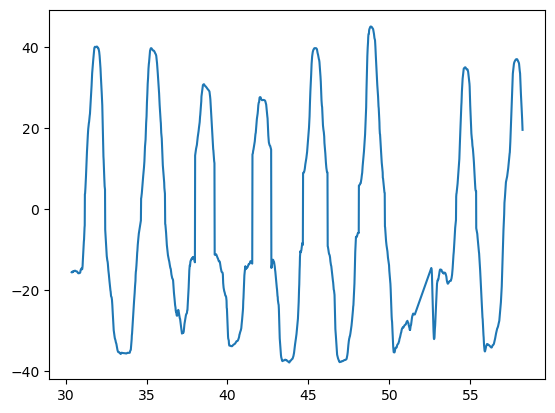

In [114]:
plt.plot(test1TimeStamps[2000:2000+2204], test1Angles[2000:2000+2204])

In [141]:
math.floor(60/(4.5*2))

6

In [142]:
ma_smooth_param = math.floor(60/(4.5*2))
#np.round((1/(test1TimeStamps[-1]/len(test1TimeStamps)))/4.5)

In [144]:
test1SmoothedAngles = moving_average_angles(test1Angles[2000:2000+2204], ma_smooth_param)
test1AngularVelocities = calculate_angular_velocities(test1SmoothedAngles, test1TimeStamps[2000:2000+2204][0:-5])
#test1AngularVelocities = calculate_angular_velocities(test1Angles, test1TimeStamps)

In [147]:
test1AngularVelocitiesPadded = np.pad(test1AngularVelocities, (0, int(2**(np.ceil(math.log(np.shape(test1AngularVelocities)[0],2))+4)-np.shape(test1AngularVelocities)[0])))

# Evaluate Fourier Magnitudes
fourier_coeffs = np.fft.fft(test1AngularVelocitiesPadded)
fourier_mag = np.abs(fourier_coeffs)
N = len(fourier_mag)

fourier_mag_adj = fourier_mag / fourier_mag[N//2]

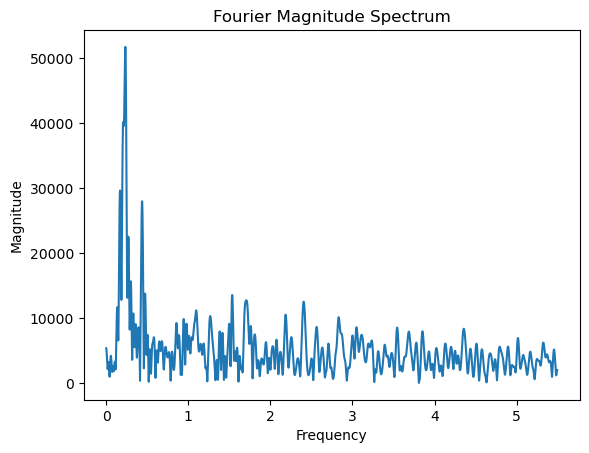

In [150]:
sampling_rate = 1/60
freqs = np.fft.fftfreq(N, sampling_rate)

plt.plot(freqs[:N//2][0:6000], fourier_mag[:N//2][0:6000])  # Plotting only the positive frequencies
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Magnitude Spectrum")
plt.show()

In [93]:
fourier_mag[N//2]

1038.8152070491662